## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ALL_STEM_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,ALL_STEM_t_ha
0,18.9
1,113.1
2,87.8
3,106.5
4,67.0


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9450020066426411, 0.9200361842020749, 0.9236031118940906]
    Mean: 0.930
    Std: 0.011

 --------------------
Root-mean-square error (RMSE): 

    Scores: [19.92179148 16.00070803 16.32278854]
    Mean: 17.415
    Std: 1.777

 --------------------
Mean absolute error (MAE): 

    Scores: [10.747746062864337, 10.750940710034286, 11.377861775180751]
    Mean: 10.959
    Std: 0.296

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.7658578011184654                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.19219571931631796                # gamma
print('Gamma: ' + str(p2))

p3 = 0.28748915735552544                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 199         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9585132255045361                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7658578011184654
Gamma: 0.19219571931631796
Learning_rate: 0.28748915735552544
Max_depth: 2
N_estimators: 199
Subsample: 0.9585132255045361


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:93.67242	validation_1-rmse:81.72470
[1]	validation_0-rmse:71.19244	validation_1-rmse:62.95175
[2]	validation_0-rmse:55.47037	validation_1-rmse:49.61228
[3]	validation_0-rmse:42.69447	validation_1-rmse:38.51079
[4]	validation_0-rmse:35.55254	validation_1-rmse:33.55595
[5]	validation_0-rmse:29.33682	validation_1-rmse:28.96116
[6]	validation_0-rmse:25.28621	validation_1-rmse:26.17463
[7]	validation_0-rmse:22.80730	validation_1-rmse:24.54279
[8]	validation_0-rmse:21.01448	validation_1-rmse:23.04038


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:19.99824	validation_1-rmse:22.46430
[10]	validation_0-rmse:19.25859	validation_1-rmse:21.83207
[11]	validation_0-rmse:18.57513	validation_1-rmse:21.43450
[12]	validation_0-rmse:18.03247	validation_1-rmse:20.72272
[13]	validation_0-rmse:17.74709	validation_1-rmse:20.63583
[14]	validation_0-rmse:17.54344	validation_1-rmse:20.56948
[15]	validation_0-rmse:17.26912	validation_1-rmse:20.33186
[16]	validation_0-rmse:16.84638	validation_1-rmse:19.70097
[17]	validation_0-rmse:16.63902	validation_1-rmse:19.49283
[18]	validation_0-rmse:16.47505	validation_1-rmse:19.47892
[19]	validation_0-rmse:16.41749	validation_1-rmse:19.54666
[20]	validation_0-rmse:16.28234	validation_1-rmse:19.40892
[21]	validation_0-rmse:16.15307	validation_1-rmse:19.26359
[22]	validation_0-rmse:16.08082	validation_1-rmse:19.20093
[23]	validation_0-rmse:15.80058	validation_1-rmse:18.70362
[24]	validation_0-rmse:15.67027	validation_1-rmse:18.49829
[25]	validation_0-rmse:15.50346	validation_1-rmse:18.3052

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.24655	validation_1-rmse:87.50294
[1]	validation_0-rmse:70.33357	validation_1-rmse:66.21098
[2]	validation_0-rmse:55.26682	validation_1-rmse:52.45646
[3]	validation_0-rmse:42.68862	validation_1-rmse:40.66548
[4]	validation_0-rmse:36.01443	validation_1-rmse:34.63327


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:29.77129	validation_1-rmse:28.53257
[6]	validation_0-rmse:25.64265	validation_1-rmse:25.02333
[7]	validation_0-rmse:23.04348	validation_1-rmse:22.90135
[8]	validation_0-rmse:21.18482	validation_1-rmse:21.22157
[9]	validation_0-rmse:20.07580	validation_1-rmse:20.29534
[10]	validation_0-rmse:19.18206	validation_1-rmse:19.77775
[11]	validation_0-rmse:18.41511	validation_1-rmse:19.20790
[12]	validation_0-rmse:17.77548	validation_1-rmse:18.87825
[13]	validation_0-rmse:17.40989	validation_1-rmse:18.55819
[14]	validation_0-rmse:17.21801	validation_1-rmse:18.59332
[15]	validation_0-rmse:16.88363	validation_1-rmse:18.59363
[16]	validation_0-rmse:16.43482	validation_1-rmse:18.45309
[17]	validation_0-rmse:16.20826	validation_1-rmse:18.34600
[18]	validation_0-rmse:16.01579	validation_1-rmse:18.39424
[19]	validation_0-rmse:15.90422	validation_1-rmse:18.37571
[20]	validation_0-rmse:15.77461	validation_1-rmse:18.27675
[21]	validation_0-rmse:15.67413	validation_1-rmse:18.20008
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.93351	validation_1-rmse:89.06488
[1]	validation_0-rmse:69.21763	validation_1-rmse:67.50624
[2]	validation_0-rmse:53.80247	validation_1-rmse:52.47169
[3]	validation_0-rmse:41.72534	validation_1-rmse:41.51710
[4]	validation_0-rmse:34.58646	validation_1-rmse:35.02991
[5]	validation_0-rmse:28.52515	validation_1-rmse:29.87413
[6]	validation_0-rmse:24.54829	validation_1-rmse:26.43657
[7]	validation_0-rmse:21.92454	validation_1-rmse:24.07148
[8]	validation_0-rmse:20.25171	validation_1-rmse:22.54060
[9]	validation_0-rmse:19.21152	validation_1-rmse:21.66203
[10]	validation_0-rmse:18.38327	validation_1-rmse:21.11756
[11]	validation_0-rmse:17.54804	validation_1-rmse:20.67169
[12]	validation_0-rmse:17.11595	validation_1-rmse:20.36655
[13]	validation_0-rmse:16.72159	validation_1-rmse:19.94549
[14]	validation_0-rmse:16.52689	validation_1-rmse:19.95586
[15]	validation_0-rmse:16.37565	validation_1-rmse:19.98118
[16]	validation_0-rmse:15.98805	validation_1-rmse:19.88198
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:93.33820	validation_1-rmse:82.70546
[1]	validation_0-rmse:71.06760	validation_1-rmse:63.11848
[2]	validation_0-rmse:55.75065	validation_1-rmse:49.77513
[3]	validation_0-rmse:43.15050	validation_1-rmse:38.97593
[4]	validation_0-rmse:36.00664	validation_1-rmse:32.96468
[5]	validation_0-rmse:29.79391	validation_1-rmse:27.24100
[6]	validation_0-rmse:25.56826	validation_1-rmse:23.74984
[7]	validation_0-rmse:22.98036	validation_1-rmse:21.39506
[8]	validation_0-rmse:21.32878	validation_1-rmse:20.40114


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:20.00458	validation_1-rmse:19.43905
[10]	validation_0-rmse:19.32273	validation_1-rmse:19.10359
[11]	validation_0-rmse:18.62059	validation_1-rmse:18.67564
[12]	validation_0-rmse:18.26006	validation_1-rmse:18.51690
[13]	validation_0-rmse:17.98899	validation_1-rmse:18.52583
[14]	validation_0-rmse:17.78657	validation_1-rmse:18.47111
[15]	validation_0-rmse:17.62772	validation_1-rmse:18.60807
[16]	validation_0-rmse:17.25961	validation_1-rmse:18.22849
[17]	validation_0-rmse:17.06967	validation_1-rmse:18.21774
[18]	validation_0-rmse:16.90265	validation_1-rmse:18.04253
[19]	validation_0-rmse:16.82207	validation_1-rmse:18.14046
[20]	validation_0-rmse:16.69724	validation_1-rmse:17.95219
[21]	validation_0-rmse:16.62367	validation_1-rmse:17.96608
[22]	validation_0-rmse:16.53172	validation_1-rmse:17.91414
[23]	validation_0-rmse:16.37287	validation_1-rmse:18.04519
[24]	validation_0-rmse:16.21142	validation_1-rmse:17.88055
[25]	validation_0-rmse:16.00721	validation_1-rmse:17.8249

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:54.46771	validation_1-rmse:50.58267
[3]	validation_0-rmse:42.10349	validation_1-rmse:39.28556
[4]	validation_0-rmse:35.18146	validation_1-rmse:33.65258
[5]	validation_0-rmse:29.05858	validation_1-rmse:28.54066
[6]	validation_0-rmse:24.98267	validation_1-rmse:24.73587
[7]	validation_0-rmse:22.15463	validation_1-rmse:22.63731
[8]	validation_0-rmse:20.46473	validation_1-rmse:20.96824
[9]	validation_0-rmse:19.45675	validation_1-rmse:20.08823
[10]	validation_0-rmse:18.61310	validation_1-rmse:19.35075
[11]	validation_0-rmse:18.00882	validation_1-rmse:18.73276
[12]	validation_0-rmse:17.63884	validation_1-rmse:18.42386
[13]	validation_0-rmse:17.28916	validation_1-rmse:18.16070
[14]	validation_0-rmse:17.02093	validation_1-rmse:17.95104
[15]	validation_0-rmse:16.62352	validation_1-rmse:17.56107
[16]	validation_0-rmse:16.23519	validation_1-rmse:17.30812
[17]	validation_0-rmse:16.00757	validation_1-rmse:17.18387
[18]	validation_0-rmse:15.76512	validation_1-rmse:17.17325
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:56.11028	validation_1-rmse:42.63716
[3]	validation_0-rmse:43.91907	validation_1-rmse:33.01472
[4]	validation_0-rmse:36.66661	validation_1-rmse:26.80836
[5]	validation_0-rmse:30.18624	validation_1-rmse:22.44956
[6]	validation_0-rmse:26.02322	validation_1-rmse:19.81173
[7]	validation_0-rmse:23.36327	validation_1-rmse:18.12026
[8]	validation_0-rmse:21.73952	validation_1-rmse:17.42588
[9]	validation_0-rmse:20.59027	validation_1-rmse:17.01025
[10]	validation_0-rmse:19.66227	validation_1-rmse:16.20907
[11]	validation_0-rmse:18.87829	validation_1-rmse:15.88696
[12]	validation_0-rmse:18.47101	validation_1-rmse:15.77407
[13]	validation_0-rmse:18.08324	validation_1-rmse:15.48514
[14]	validation_0-rmse:17.87461	validation_1-rmse:15.43012
[15]	validation_0-rmse:17.74862	validation_1-rmse:15.46143
[16]	validation_0-rmse:17.29005	validation_1-rmse:15.18232
[17]	validation_0-rmse:17.07541	validation_1-rmse:14.95082
[18]	validation_0-rmse:16.87896	validation_1-rmse:14.95026
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.67060	validation_1-rmse:90.59065
[1]	validation_0-rmse:70.10321	validation_1-rmse:69.11834
[2]	validation_0-rmse:55.19709	validation_1-rmse:55.69287
[3]	validation_0-rmse:42.61547	validation_1-rmse:44.68796
[4]	validation_0-rmse:35.79937	validation_1-rmse:37.87397
[5]	validation_0-rmse:29.53875	validation_1-rmse:32.36662
[6]	validation_0-rmse:25.32563	validation_1-rmse:28.96167


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:22.59272	validation_1-rmse:26.16833
[8]	validation_0-rmse:20.94594	validation_1-rmse:24.74185
[9]	validation_0-rmse:19.93484	validation_1-rmse:23.72906
[10]	validation_0-rmse:19.10791	validation_1-rmse:22.83002
[11]	validation_0-rmse:18.19543	validation_1-rmse:21.67887
[12]	validation_0-rmse:17.79927	validation_1-rmse:21.26601
[13]	validation_0-rmse:17.47611	validation_1-rmse:20.85665
[14]	validation_0-rmse:17.26499	validation_1-rmse:20.72599
[15]	validation_0-rmse:16.93752	validation_1-rmse:20.68899
[16]	validation_0-rmse:16.54381	validation_1-rmse:20.18386
[17]	validation_0-rmse:16.31164	validation_1-rmse:19.99536
[18]	validation_0-rmse:16.15597	validation_1-rmse:19.96225
[19]	validation_0-rmse:16.05880	validation_1-rmse:19.93630
[20]	validation_0-rmse:15.91798	validation_1-rmse:19.74551
[21]	validation_0-rmse:15.70264	validation_1-rmse:19.49961
[22]	validation_0-rmse:15.61158	validation_1-rmse:19.42913
[23]	validation_0-rmse:15.32148	validation_1-rmse:19.19163


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.57057	validation_1-rmse:90.80610
[1]	validation_0-rmse:69.32373	validation_1-rmse:69.08344
[2]	validation_0-rmse:54.24911	validation_1-rmse:53.92271
[3]	validation_0-rmse:42.29692	validation_1-rmse:42.09983
[4]	validation_0-rmse:35.29803	validation_1-rmse:35.19410
[5]	validation_0-rmse:29.04684	validation_1-rmse:29.02149
[6]	validation_0-rmse:25.22751	validation_1-rmse:24.91719
[7]	validation_0-rmse:22.63668	validation_1-rmse:23.20357
[8]	validation_0-rmse:20.99880	validation_1-rmse:21.56002
[9]	validation_0-rmse:19.99310	validation_1-rmse:20.90749
[10]	validation_0-rmse:19.07851	validation_1-rmse:19.52902
[11]	validation_0-rmse:18.12832	validation_1-rmse:19.01155
[12]	validation_0-rmse:17.71012	validation_1-rmse:18.43535
[13]	validation_0-rmse:17.29615	validation_1-rmse:18.28285
[14]	validation_0-rmse:17.11964	validation_1-rmse:18.02807
[15]	validation_0-rmse:16.80909	validation_1-rmse:18.04978
[16]	validation_0-rmse:16.43803	validation_1-rmse:17.96452
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.34767	validation_1-rmse:92.65814
[1]	validation_0-rmse:68.93151	validation_1-rmse:70.84895


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.46349	validation_1-rmse:55.32390
[3]	validation_0-rmse:41.45899	validation_1-rmse:43.46050
[4]	validation_0-rmse:34.41424	validation_1-rmse:36.65521
[5]	validation_0-rmse:28.30057	validation_1-rmse:30.49476
[6]	validation_0-rmse:24.60139	validation_1-rmse:27.05017
[7]	validation_0-rmse:22.05093	validation_1-rmse:24.22548
[8]	validation_0-rmse:20.51693	validation_1-rmse:22.26290
[9]	validation_0-rmse:19.51053	validation_1-rmse:20.97991
[10]	validation_0-rmse:18.62638	validation_1-rmse:20.14580
[11]	validation_0-rmse:17.84711	validation_1-rmse:19.35631
[12]	validation_0-rmse:17.54863	validation_1-rmse:19.09886
[13]	validation_0-rmse:17.14085	validation_1-rmse:18.75495
[14]	validation_0-rmse:16.98962	validation_1-rmse:18.74610
[15]	validation_0-rmse:16.77984	validation_1-rmse:18.55081
[16]	validation_0-rmse:16.27089	validation_1-rmse:18.11753
[17]	validation_0-rmse:16.03822	validation_1-rmse:17.89774
[18]	validation_0-rmse:15.79626	validation_1-rmse:17.83257
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.06343	validation_1-rmse:88.17585


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.70834	validation_1-rmse:66.92557
[2]	validation_0-rmse:54.07821	validation_1-rmse:51.73099
[3]	validation_0-rmse:41.89583	validation_1-rmse:40.45982
[4]	validation_0-rmse:34.77512	validation_1-rmse:34.13596
[5]	validation_0-rmse:28.59016	validation_1-rmse:28.45181
[6]	validation_0-rmse:24.72898	validation_1-rmse:25.14523
[7]	validation_0-rmse:22.12586	validation_1-rmse:23.20103
[8]	validation_0-rmse:20.59601	validation_1-rmse:22.28436
[9]	validation_0-rmse:19.59751	validation_1-rmse:21.53127
[10]	validation_0-rmse:18.88706	validation_1-rmse:20.90746
[11]	validation_0-rmse:18.16106	validation_1-rmse:20.12176
[12]	validation_0-rmse:17.75714	validation_1-rmse:19.75062
[13]	validation_0-rmse:17.32623	validation_1-rmse:19.63147
[14]	validation_0-rmse:17.16561	validation_1-rmse:19.67673
[15]	validation_0-rmse:16.82373	validation_1-rmse:19.59139
[16]	validation_0-rmse:16.51147	validation_1-rmse:19.41460
[17]	validation_0-rmse:16.35813	validation_1-rmse:19.31577
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.99764	validation_1-rmse:86.46502
[1]	validation_0-rmse:70.68958	validation_1-rmse:64.48835
[2]	validation_0-rmse:56.02571	validation_1-rmse:50.42979
[3]	validation_0-rmse:43.49217	validation_1-rmse:38.73917
[4]	validation_0-rmse:36.66764	validation_1-rmse:32.56968
[5]	validation_0-rmse:30.42150	validation_1-rmse:27.17207
[6]	validation_0-rmse:26.41218	validation_1-rmse:24.17002
[7]	validation_0-rmse:23.52624	validation_1-rmse:22.03115
[8]	validation_0-rmse:21.58231	validation_1-rmse:20.77029
[9]	validation_0-rmse:20.42360	validation_1-rmse:20.07792
[10]	validation_0-rmse:19.49652	validation_1-rmse:19.60211
[11]	validation_0-rmse:18.51648	validation_1-rmse:18.91066
[12]	validation_0-rmse:18.13746	validation_1-rmse:18.59245
[13]	validation_0-rmse:17.75828	validation_1-rmse:18.41448
[14]	validation_0-rmse:17.47183	validation_1-rmse:18.45136
[15]	validation_0-rmse:17.25499	validation_1-rmse:18.53944
[16]	validation_0-rmse:16.81189	validation_1-rmse:18.11486
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.64133	validation_1-rmse:91.87833


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.50253	validation_1-rmse:67.62536
[2]	validation_0-rmse:53.98204	validation_1-rmse:52.70932
[3]	validation_0-rmse:41.85532	validation_1-rmse:42.18823
[4]	validation_0-rmse:34.88994	validation_1-rmse:34.99992
[5]	validation_0-rmse:28.78295	validation_1-rmse:29.16853
[6]	validation_0-rmse:24.72444	validation_1-rmse:26.07574
[7]	validation_0-rmse:21.91343	validation_1-rmse:24.00426
[8]	validation_0-rmse:20.15993	validation_1-rmse:22.84380
[9]	validation_0-rmse:19.13929	validation_1-rmse:21.91759
[10]	validation_0-rmse:18.19731	validation_1-rmse:21.36688
[11]	validation_0-rmse:17.42020	validation_1-rmse:20.95639
[12]	validation_0-rmse:16.93928	validation_1-rmse:20.52596
[13]	validation_0-rmse:16.52026	validation_1-rmse:20.09613
[14]	validation_0-rmse:16.26579	validation_1-rmse:20.06499
[15]	validation_0-rmse:15.98725	validation_1-rmse:19.78713
[16]	validation_0-rmse:15.56990	validation_1-rmse:19.68931
[17]	validation_0-rmse:15.38975	validation_1-rmse:19.61415
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:92.03731	validation_1-rmse:89.55499


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.26920	validation_1-rmse:67.88805
[2]	validation_0-rmse:55.39549	validation_1-rmse:53.38495
[3]	validation_0-rmse:42.63617	validation_1-rmse:42.42787
[4]	validation_0-rmse:35.93495	validation_1-rmse:36.04244
[5]	validation_0-rmse:29.61087	validation_1-rmse:30.98166
[6]	validation_0-rmse:25.55112	validation_1-rmse:27.80536
[7]	validation_0-rmse:22.84539	validation_1-rmse:25.13782
[8]	validation_0-rmse:21.18286	validation_1-rmse:23.81004
[9]	validation_0-rmse:20.12063	validation_1-rmse:23.21814
[10]	validation_0-rmse:19.41528	validation_1-rmse:22.76195
[11]	validation_0-rmse:18.59379	validation_1-rmse:22.18788
[12]	validation_0-rmse:18.14396	validation_1-rmse:21.77701
[13]	validation_0-rmse:17.54675	validation_1-rmse:21.38406
[14]	validation_0-rmse:17.33405	validation_1-rmse:21.22897
[15]	validation_0-rmse:17.19571	validation_1-rmse:21.04451
[16]	validation_0-rmse:16.76117	validation_1-rmse:20.97320
[17]	validation_0-rmse:16.56223	validation_1-rmse:20.94920
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.64861	validation_1-rmse:95.75252
[1]	validation_0-rmse:68.54041	validation_1-rmse:74.34070
[2]	validation_0-rmse:52.77168	validation_1-rmse:58.62367
[3]	validation_0-rmse:40.87814	validation_1-rmse:47.03924
[4]	validation_0-rmse:34.10550	validation_1-rmse:40.39893
[5]	validation_0-rmse:28.09890	validation_1-rmse:33.87764
[6]	validation_0-rmse:24.35026	validation_1-rmse:29.74760
[7]	validation_0-rmse:21.84700	validation_1-rmse:26.55808
[8]	validation_0-rmse:20.33389	validation_1-rmse:24.64363
[9]	validation_0-rmse:19.41474	validation_1-rmse:23.24559
[10]	validation_0-rmse:18.48421	validation_1-rmse:21.92011
[11]	validation_0-rmse:17.63744	validation_1-rmse:20.59693
[12]	validation_0-rmse:17.17413	validation_1-rmse:20.27383
[13]	validation_0-rmse:16.69281	validation_1-rmse:20.12575
[14]	validation_0-rmse:16.50544	validation_1-rmse:20.06162
[15]	validation_0-rmse:16.30990	validation_1-rmse:19.97654
[16]	validation_0-rmse:15.93728	validation_1-rmse:19.64083
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.19737	validation_1-rmse:92.87198
[1]	validation_0-rmse:68.26853	validation_1-rmse:70.58702
[2]	validation_0-rmse:52.65385	validation_1-rmse:55.84722
[3]	validation_0-rmse:40.99518	validation_1-rmse:44.76743
[4]	validation_0-rmse:33.67489	validation_1-rmse:38.53598
[5]	validation_0-rmse:28.23866	validation_1-rmse:33.30218
[6]	validation_0-rmse:24.68604	validation_1-rmse:30.00105
[7]	validation_0-rmse:21.94605	validation_1-rmse:27.31444
[8]	validation_0-rmse:20.41328	validation_1-rmse:25.44946
[9]	validation_0-rmse:19.32183	validation_1-rmse:24.05455
[10]	validation_0-rmse:18.38575	validation_1-rmse:23.14537
[11]	validation_0-rmse:17.66290	validation_1-rmse:22.40481
[12]	validation_0-rmse:17.30808	validation_1-rmse:22.04047
[13]	validation_0-rmse:16.91133	validation_1-rmse:21.81610
[14]	validation_0-rmse:16.72651	validation_1-rmse:21.57991
[15]	validation_0-rmse:16.37191	validation_1-rmse:21.36239
[16]	validation_0-rmse:15.92166	validation_1-rmse:20.70891
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.83018	validation_1-rmse:89.89078
[1]	validation_0-rmse:69.89985	validation_1-rmse:69.08345
[2]	validation_0-rmse:55.15631	validation_1-rmse:55.72737
[3]	validation_0-rmse:42.62350	validation_1-rmse:44.21561
[4]	validation_0-rmse:36.07031	validation_1-rmse:38.77331
[5]	validation_0-rmse:29.93040	validation_1-rmse:32.95218
[6]	validation_0-rmse:25.97253	validation_1-rmse:28.97480
[7]	validation_0-rmse:23.29386	validation_1-rmse:26.63460
[8]	validation_0-rmse:21.52181	validation_1-rmse:24.51370
[9]	validation_0-rmse:20.44152	validation_1-rmse:23.69249
[10]	validation_0-rmse:19.61831	validation_1-rmse:23.01957
[11]	validation_0-rmse:18.98969	validation_1-rmse:22.00126
[12]	validation_0-rmse:18.27532	validation_1-rmse:21.20503
[13]	validation_0-rmse:17.97768	validation_1-rmse:21.00804
[14]	validation_0-rmse:17.71337	validation_1-rmse:20.51473
[15]	validation_0-rmse:17.57737	validation_1-rmse:20.62660
[16]	validation_0-rmse:17.10155	validation_1-rmse:20.08765
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:92.80013	validation_1-rmse:88.18890
[1]	validation_0-rmse:71.01101	validation_1-rmse:67.09853
[2]	validation_0-rmse:56.24221	validation_1-rmse:53.47665
[3]	validation_0-rmse:43.57885	validation_1-rmse:40.89317


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:36.56017	validation_1-rmse:34.19223
[5]	validation_0-rmse:30.12437	validation_1-rmse:28.17772
[6]	validation_0-rmse:25.98354	validation_1-rmse:24.16534
[7]	validation_0-rmse:23.31154	validation_1-rmse:21.76961
[8]	validation_0-rmse:21.52045	validation_1-rmse:20.77970
[9]	validation_0-rmse:20.33917	validation_1-rmse:20.06106
[10]	validation_0-rmse:19.45848	validation_1-rmse:19.64377
[11]	validation_0-rmse:18.79978	validation_1-rmse:19.18132
[12]	validation_0-rmse:18.25659	validation_1-rmse:18.78049
[13]	validation_0-rmse:17.98953	validation_1-rmse:18.67832
[14]	validation_0-rmse:17.71487	validation_1-rmse:18.51096
[15]	validation_0-rmse:17.22123	validation_1-rmse:18.26656
[16]	validation_0-rmse:16.65831	validation_1-rmse:18.14098
[17]	validation_0-rmse:16.40904	validation_1-rmse:18.11386
[18]	validation_0-rmse:16.27164	validation_1-rmse:18.11605
[19]	validation_0-rmse:16.17384	validation_1-rmse:17.88459
[20]	validation_0-rmse:16.04947	validation_1-rmse:17.95276
[21

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.39686	validation_1-rmse:81.99674
[1]	validation_0-rmse:70.44509	validation_1-rmse:60.24302
[2]	validation_0-rmse:54.56812	validation_1-rmse:46.54967
[3]	validation_0-rmse:42.18065	validation_1-rmse:35.39688
[4]	validation_0-rmse:34.51146	validation_1-rmse:29.63795
[5]	validation_0-rmse:28.59183	validation_1-rmse:24.76033
[6]	validation_0-rmse:24.66406	validation_1-rmse:22.11419
[7]	validation_0-rmse:22.05267	validation_1-rmse:20.79022
[8]	validation_0-rmse:20.52294	validation_1-rmse:20.38409
[9]	validation_0-rmse:19.49308	validation_1-rmse:20.06847
[10]	validation_0-rmse:18.74236	validation_1-rmse:19.78619
[11]	validation_0-rmse:17.96895	validation_1-rmse:19.17432
[12]	validation_0-rmse:17.57843	validation_1-rmse:19.15822
[13]	validation_0-rmse:17.15743	validation_1-rmse:19.26573
[14]	validation_0-rmse:16.89206	validation_1-rmse:19.14928
[15]	validation_0-rmse:16.61767	validation_1-rmse:19.03261
[16]	validation_0-rmse:16.31155	validation_1-rmse:18.65184
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.04329	validation_1-rmse:89.37542
[1]	validation_0-rmse:69.97165	validation_1-rmse:68.39780
[2]	validation_0-rmse:55.21190	validation_1-rmse:54.56277
[3]	validation_0-rmse:42.54232	validation_1-rmse:43.30034
[4]	validation_0-rmse:35.48433	validation_1-rmse:36.91408
[5]	validation_0-rmse:29.31704	validation_1-rmse:31.41034
[6]	validation_0-rmse:25.16463	validation_1-rmse:27.51005
[7]	validation_0-rmse:22.61280	validation_1-rmse:25.32885
[8]	validation_0-rmse:20.86252	validation_1-rmse:23.77251
[9]	validation_0-rmse:19.76090	validation_1-rmse:22.63871
[10]	validation_0-rmse:18.96000	validation_1-rmse:22.01613
[11]	validation_0-rmse:18.27803	validation_1-rmse:21.37868
[12]	validation_0-rmse:17.95486	validation_1-rmse:21.09008
[13]	validation_0-rmse:17.38861	validation_1-rmse:20.23907
[14]	validation_0-rmse:17.21359	validation_1-rmse:20.29835
[15]	validation_0-rmse:17.02946	validation_1-rmse:20.28908
[16]	validation_0-rmse:16.58908	validation_1-rmse:19.81849
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.96293	validation_1-rmse:88.58434
[1]	validation_0-rmse:69.19473	validation_1-rmse:65.83445
[2]	validation_0-rmse:53.53644	validation_1-rmse:50.29123
[3]	validation_0-rmse:41.44417	validation_1-rmse:39.41906


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:33.96006	validation_1-rmse:32.42511
[5]	validation_0-rmse:28.39240	validation_1-rmse:27.67693
[6]	validation_0-rmse:24.61895	validation_1-rmse:24.72931
[7]	validation_0-rmse:21.99817	validation_1-rmse:22.85672
[8]	validation_0-rmse:20.43959	validation_1-rmse:21.55197
[9]	validation_0-rmse:19.47269	validation_1-rmse:20.90549
[10]	validation_0-rmse:18.59990	validation_1-rmse:20.41686
[11]	validation_0-rmse:17.95120	validation_1-rmse:20.26025
[12]	validation_0-rmse:17.56411	validation_1-rmse:20.10082
[13]	validation_0-rmse:17.19082	validation_1-rmse:19.84553
[14]	validation_0-rmse:17.02682	validation_1-rmse:19.71143
[15]	validation_0-rmse:16.67870	validation_1-rmse:19.32130
[16]	validation_0-rmse:16.27101	validation_1-rmse:18.98795
[17]	validation_0-rmse:16.04715	validation_1-rmse:18.83856
[18]	validation_0-rmse:15.94036	validation_1-rmse:18.73142
[19]	validation_0-rmse:15.79363	validation_1-rmse:18.61844
[20]	validation_0-rmse:15.63610	validation_1-rmse:18.47585
[21

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.55438	validation_1-rmse:90.81404
[1]	validation_0-rmse:69.25995	validation_1-rmse:68.54634
[2]	validation_0-rmse:53.58137	validation_1-rmse:52.70334
[3]	validation_0-rmse:41.51030	validation_1-rmse:40.65368
[4]	validation_0-rmse:34.50406	validation_1-rmse:33.65399
[5]	validation_0-rmse:28.42223	validation_1-rmse:27.84993
[6]	validation_0-rmse:24.50061	validation_1-rmse:24.21323
[7]	validation_0-rmse:21.93842	validation_1-rmse:21.79541
[8]	validation_0-rmse:20.40357	validation_1-rmse:20.33982
[9]	validation_0-rmse:19.33359	validation_1-rmse:19.52411
[10]	validation_0-rmse:18.45562	validation_1-rmse:18.95298
[11]	validation_0-rmse:17.81936	validation_1-rmse:18.22276
[12]	validation_0-rmse:17.42280	validation_1-rmse:17.86332
[13]	validation_0-rmse:16.99556	validation_1-rmse:17.52807
[14]	validation_0-rmse:16.74744	validation_1-rmse:17.45460
[15]	validation_0-rmse:16.49756	validation_1-rmse:17.12638
[16]	validation_0-rmse:16.16732	validation_1-rmse:16.88445
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.41549	validation_1-rmse:91.82505
[1]	validation_0-rmse:69.89572	validation_1-rmse:70.95348


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:55.03383	validation_1-rmse:57.65165
[3]	validation_0-rmse:42.40363	validation_1-rmse:45.56740
[4]	validation_0-rmse:35.86603	validation_1-rmse:39.34852
[5]	validation_0-rmse:29.72342	validation_1-rmse:32.97948
[6]	validation_0-rmse:25.50463	validation_1-rmse:29.21140
[7]	validation_0-rmse:22.55070	validation_1-rmse:26.59838
[8]	validation_0-rmse:20.59781	validation_1-rmse:24.60041
[9]	validation_0-rmse:19.39669	validation_1-rmse:23.47268
[10]	validation_0-rmse:18.52009	validation_1-rmse:22.85116
[11]	validation_0-rmse:17.52703	validation_1-rmse:22.16200
[12]	validation_0-rmse:17.00309	validation_1-rmse:21.37468
[13]	validation_0-rmse:16.61702	validation_1-rmse:20.99665
[14]	validation_0-rmse:16.35955	validation_1-rmse:20.87278
[15]	validation_0-rmse:15.91811	validation_1-rmse:20.66873
[16]	validation_0-rmse:15.51234	validation_1-rmse:20.48892
[17]	validation_0-rmse:15.27514	validation_1-rmse:20.39444
[18]	validation_0-rmse:15.03391	validation_1-rmse:20.27413
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.03230	validation_1-rmse:88.67863
[1]	validation_0-rmse:70.26575	validation_1-rmse:67.12817
[2]	validation_0-rmse:55.37278	validation_1-rmse:53.09985
[3]	validation_0-rmse:42.65660	validation_1-rmse:41.61123
[4]	validation_0-rmse:35.85066	validation_1-rmse:35.73197
[5]	validation_0-rmse:29.62042	validation_1-rmse:30.27192
[6]	validation_0-rmse:25.49697	validation_1-rmse:26.99330
[7]	validation_0-rmse:22.67862	validation_1-rmse:24.95771
[8]	validation_0-rmse:20.96550	validation_1-rmse:23.55759
[9]	validation_0-rmse:19.92260	validation_1-rmse:22.86045
[10]	validation_0-rmse:19.17036	validation_1-rmse:22.41888
[11]	validation_0-rmse:18.35256	validation_1-rmse:21.83974
[12]	validation_0-rmse:17.81218	validation_1-rmse:21.58069
[13]	validation_0-rmse:17.45249	validation_1-rmse:21.30098
[14]	validation_0-rmse:17.26723	validation_1-rmse:21.42697
[15]	validation_0-rmse:16.80529	validation_1-rmse:21.52164
[16]	validation_0-rmse:16.36622	validation_1-rmse:21.30266
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.53656	validation_1-rmse:87.64076
[1]	validation_0-rmse:69.69774	validation_1-rmse:65.83853
[2]	validation_0-rmse:54.13903	validation_1-rmse:50.53060
[3]	validation_0-rmse:42.06621	validation_1-rmse:37.93125
[4]	validation_0-rmse:34.90639	validation_1-rmse:31.20928
[5]	validation_0-rmse:28.77660	validation_1-rmse:26.26149
[6]	validation_0-rmse:24.99531	validation_1-rmse:22.38535
[7]	validation_0-rmse:22.44559	validation_1-rmse:20.46354
[8]	validation_0-rmse:20.74890	validation_1-rmse:19.57738
[9]	validation_0-rmse:19.64110	validation_1-rmse:18.65432
[10]	validation_0-rmse:18.81932	validation_1-rmse:18.46469
[11]	validation_0-rmse:18.17740	validation_1-rmse:18.26229
[12]	validation_0-rmse:17.63228	validation_1-rmse:18.15538
[13]	validation_0-rmse:17.35754	validation_1-rmse:18.21148
[14]	validation_0-rmse:17.07916	validation_1-rmse:18.49688
[15]	validation_0-rmse:16.93140	validation_1-rmse:18.73624
[16]	validation_0-rmse:16.54564	validation_1-rmse:18.61766
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.94604	validation_1-rmse:89.20394
[1]	validation_0-rmse:70.31475	validation_1-rmse:68.93539
[2]	validation_0-rmse:55.23697	validation_1-rmse:55.00112
[3]	validation_0-rmse:42.54197	validation_1-rmse:43.56565
[4]	validation_0-rmse:35.84497	validation_1-rmse:37.13815
[5]	validation_0-rmse:29.49337	validation_1-rmse:31.05244
[6]	validation_0-rmse:25.40068	validation_1-rmse:27.07370
[7]	validation_0-rmse:22.85664	validation_1-rmse:24.41637
[8]	validation_0-rmse:21.29107	validation_1-rmse:22.65733
[9]	validation_0-rmse:20.07463	validation_1-rmse:21.65607
[10]	validation_0-rmse:19.31720	validation_1-rmse:20.91910
[11]	validation_0-rmse:18.62659	validation_1-rmse:20.06451
[12]	validation_0-rmse:18.15293	validation_1-rmse:19.59660
[13]	validation_0-rmse:17.93971	validation_1-rmse:19.18445
[14]	validation_0-rmse:17.56740	validation_1-rmse:18.79532
[15]	validation_0-rmse:17.41902	validation_1-rmse:18.66651
[16]	validation_0-rmse:16.98211	validation_1-rmse:18.20259
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.16607	validation_1-rmse:88.51833
[1]	validation_0-rmse:69.44182	validation_1-rmse:67.74375
[2]	validation_0-rmse:53.95034	validation_1-rmse:53.23629
[3]	validation_0-rmse:41.86620	validation_1-rmse:41.63540
[4]	validation_0-rmse:34.66047	validation_1-rmse:34.87031
[5]	validation_0-rmse:28.68729	validation_1-rmse:29.62715
[6]	validation_0-rmse:24.90829	validation_1-rmse:25.85200
[7]	validation_0-rmse:22.34698	validation_1-rmse:23.70875
[8]	validation_0-rmse:20.63694	validation_1-rmse:21.92350
[9]	validation_0-rmse:19.65447	validation_1-rmse:21.09312
[10]	validation_0-rmse:18.91822	validation_1-rmse:20.18556
[11]	validation_0-rmse:18.03065	validation_1-rmse:19.47939
[12]	validation_0-rmse:17.59717	validation_1-rmse:19.09871
[13]	validation_0-rmse:17.36261	validation_1-rmse:19.01801
[14]	validation_0-rmse:17.16260	validation_1-rmse:18.95310
[15]	validation_0-rmse:17.03939	validation_1-rmse:19.28198
[16]	validation_0-rmse:16.65362	validation_1-rmse:18.87324
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.83481	validation_1-rmse:89.59230
[1]	validation_0-rmse:69.15890	validation_1-rmse:67.54162
[2]	validation_0-rmse:53.56997	validation_1-rmse:53.25326
[3]	validation_0-rmse:41.62251	validation_1-rmse:42.35785
[4]	validation_0-rmse:34.63551	validation_1-rmse:36.25512
[5]	validation_0-rmse:28.67489	validation_1-rmse:29.98116
[6]	validation_0-rmse:24.90598	validation_1-rmse:26.29106
[7]	validation_0-rmse:22.33506	validation_1-rmse:23.89322
[8]	validation_0-rmse:20.80055	validation_1-rmse:22.39672
[9]	validation_0-rmse:19.86781	validation_1-rmse:21.33171
[10]	validation_0-rmse:18.95143	validation_1-rmse:20.34790
[11]	validation_0-rmse:18.27514	validation_1-rmse:19.52228
[12]	validation_0-rmse:17.85598	validation_1-rmse:19.11544
[13]	validation_0-rmse:17.59746	validation_1-rmse:19.08934
[14]	validation_0-rmse:17.35375	validation_1-rmse:18.72941
[15]	validation_0-rmse:17.05167	validation_1-rmse:18.45562
[16]	validation_0-rmse:16.61009	validation_1-rmse:17.94611
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.69354	validation_1-rmse:86.20680


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.99594	validation_1-rmse:64.89377
[2]	validation_0-rmse:54.38419	validation_1-rmse:49.16661
[3]	validation_0-rmse:42.12737	validation_1-rmse:37.20451
[4]	validation_0-rmse:35.03769	validation_1-rmse:30.95847
[5]	validation_0-rmse:28.95437	validation_1-rmse:24.83905
[6]	validation_0-rmse:24.85593	validation_1-rmse:22.56648
[7]	validation_0-rmse:22.23235	validation_1-rmse:20.39390
[8]	validation_0-rmse:20.52330	validation_1-rmse:19.48679
[9]	validation_0-rmse:19.51954	validation_1-rmse:19.04429
[10]	validation_0-rmse:18.73157	validation_1-rmse:18.12536
[11]	validation_0-rmse:17.89825	validation_1-rmse:17.35548
[12]	validation_0-rmse:17.51242	validation_1-rmse:17.24094
[13]	validation_0-rmse:17.10501	validation_1-rmse:17.08620
[14]	validation_0-rmse:16.89177	validation_1-rmse:16.99459
[15]	validation_0-rmse:16.65256	validation_1-rmse:16.95358
[16]	validation_0-rmse:16.27682	validation_1-rmse:16.54757
[17]	validation_0-rmse:16.10657	validation_1-rmse:16.30256
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.26344	validation_1-rmse:87.93252
[1]	validation_0-rmse:69.42003	validation_1-rmse:66.43827


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.84339	validation_1-rmse:51.61582
[3]	validation_0-rmse:41.61516	validation_1-rmse:40.72591
[4]	validation_0-rmse:34.52283	validation_1-rmse:34.02627
[5]	validation_0-rmse:28.29942	validation_1-rmse:28.59155
[6]	validation_0-rmse:24.39981	validation_1-rmse:25.38081
[7]	validation_0-rmse:21.84772	validation_1-rmse:23.41511
[8]	validation_0-rmse:20.23735	validation_1-rmse:22.22973
[9]	validation_0-rmse:19.25679	validation_1-rmse:21.93979
[10]	validation_0-rmse:18.33534	validation_1-rmse:21.44170
[11]	validation_0-rmse:17.65816	validation_1-rmse:20.85333
[12]	validation_0-rmse:17.24741	validation_1-rmse:20.48552
[13]	validation_0-rmse:16.78855	validation_1-rmse:20.05270
[14]	validation_0-rmse:16.60410	validation_1-rmse:20.03994
[15]	validation_0-rmse:16.33103	validation_1-rmse:19.86706
[16]	validation_0-rmse:15.94002	validation_1-rmse:19.62086
[17]	validation_0-rmse:15.68366	validation_1-rmse:19.49751
[18]	validation_0-rmse:15.56026	validation_1-rmse:19.58815
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.73970	validation_1-rmse:94.88156
[1]	validation_0-rmse:69.20621	validation_1-rmse:73.02955
[2]	validation_0-rmse:54.44552	validation_1-rmse:58.15289
[3]	validation_0-rmse:42.06185	validation_1-rmse:44.70798
[4]	validation_0-rmse:34.99302	validation_1-rmse:38.24519
[5]	validation_0-rmse:29.05448	validation_1-rmse:32.38013
[6]	validation_0-rmse:25.09558	validation_1-rmse:28.17685
[7]	validation_0-rmse:22.32950	validation_1-rmse:24.63421
[8]	validation_0-rmse:20.73711	validation_1-rmse:22.92972
[9]	validation_0-rmse:19.72637	validation_1-rmse:22.03123
[10]	validation_0-rmse:18.90805	validation_1-rmse:21.64346
[11]	validation_0-rmse:18.05963	validation_1-rmse:20.63389
[12]	validation_0-rmse:17.59714	validation_1-rmse:20.50129
[13]	validation_0-rmse:17.23994	validation_1-rmse:20.25542
[14]	validation_0-rmse:17.03462	validation_1-rmse:19.97927
[15]	validation_0-rmse:16.81684	validation_1-rmse:20.06691
[16]	validation_0-rmse:16.49059	validation_1-rmse:19.70603
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.06203	validation_1-rmse:83.37705
[1]	validation_0-rmse:70.49408	validation_1-rmse:62.95126
[2]	validation_0-rmse:54.52212	validation_1-rmse:49.58410
[3]	validation_0-rmse:42.27415	validation_1-rmse:39.65984
[4]	validation_0-rmse:34.69113	validation_1-rmse:33.03841
[5]	validation_0-rmse:28.66732	validation_1-rmse:28.05321
[6]	validation_0-rmse:24.72480	validation_1-rmse:25.18838
[7]	validation_0-rmse:22.17481	validation_1-rmse:22.83950
[8]	validation_0-rmse:20.49673	validation_1-rmse:21.87431
[9]	validation_0-rmse:19.43533	validation_1-rmse:21.22652
[10]	validation_0-rmse:18.63734	validation_1-rmse:20.37031
[11]	validation_0-rmse:17.94230	validation_1-rmse:19.70698
[12]	validation_0-rmse:17.57775	validation_1-rmse:19.48944
[13]	validation_0-rmse:17.05412	validation_1-rmse:19.27385
[14]	validation_0-rmse:16.84956	validation_1-rmse:19.04185
[15]	validation_0-rmse:16.53679	validation_1-rmse:18.95801
[16]	validation_0-rmse:16.23734	validation_1-rmse:18.72818
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:89.87555	validation_1-rmse:98.87709


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:67.78544	validation_1-rmse:77.17195
[2]	validation_0-rmse:52.68575	validation_1-rmse:61.76312
[3]	validation_0-rmse:40.69630	validation_1-rmse:49.71944
[4]	validation_0-rmse:33.71320	validation_1-rmse:42.58345
[5]	validation_0-rmse:27.67490	validation_1-rmse:36.66724
[6]	validation_0-rmse:23.59635	validation_1-rmse:32.01623
[7]	validation_0-rmse:21.07073	validation_1-rmse:28.75836
[8]	validation_0-rmse:19.48547	validation_1-rmse:27.13043
[9]	validation_0-rmse:18.52410	validation_1-rmse:26.04144
[10]	validation_0-rmse:17.55788	validation_1-rmse:25.18220
[11]	validation_0-rmse:16.68884	validation_1-rmse:24.18768
[12]	validation_0-rmse:16.27288	validation_1-rmse:23.64571
[13]	validation_0-rmse:15.84781	validation_1-rmse:23.68219
[14]	validation_0-rmse:15.61678	validation_1-rmse:23.36763
[15]	validation_0-rmse:15.44472	validation_1-rmse:23.29428
[16]	validation_0-rmse:15.11429	validation_1-rmse:23.04990
[17]	validation_0-rmse:14.88654	validation_1-rmse:22.96656
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.40073	validation_1-rmse:93.17457


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.01818	validation_1-rmse:72.11630
[2]	validation_0-rmse:53.65125	validation_1-rmse:57.76556
[3]	validation_0-rmse:41.55023	validation_1-rmse:45.85898
[4]	validation_0-rmse:34.34204	validation_1-rmse:39.28055
[5]	validation_0-rmse:28.35520	validation_1-rmse:33.12216
[6]	validation_0-rmse:24.61398	validation_1-rmse:29.00040
[7]	validation_0-rmse:22.12124	validation_1-rmse:25.75941
[8]	validation_0-rmse:20.72671	validation_1-rmse:23.79746
[9]	validation_0-rmse:19.70901	validation_1-rmse:22.88045
[10]	validation_0-rmse:18.93764	validation_1-rmse:21.76336
[11]	validation_0-rmse:18.19917	validation_1-rmse:20.68801
[12]	validation_0-rmse:17.90734	validation_1-rmse:20.38266
[13]	validation_0-rmse:17.50236	validation_1-rmse:19.93745
[14]	validation_0-rmse:17.35377	validation_1-rmse:19.86543
[15]	validation_0-rmse:16.98492	validation_1-rmse:19.55693
[16]	validation_0-rmse:16.57148	validation_1-rmse:18.99693
[17]	validation_0-rmse:16.37235	validation_1-rmse:18.58808
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.79850	validation_1-rmse:89.95906
[1]	validation_0-rmse:69.71973	validation_1-rmse:69.08691
[2]	validation_0-rmse:54.73857	validation_1-rmse:54.02989
[3]	validation_0-rmse:42.46747	validation_1-rmse:41.60571
[4]	validation_0-rmse:35.70004	validation_1-rmse:35.20843
[5]	validation_0-rmse:29.56998	validation_1-rmse:28.92411
[6]	validation_0-rmse:25.64195	validation_1-rmse:25.30759
[7]	validation_0-rmse:23.00530	validation_1-rmse:22.36682
[8]	validation_0-rmse:21.33742	validation_1-rmse:20.61339
[9]	validation_0-rmse:20.30911	validation_1-rmse:19.58433
[10]	validation_0-rmse:19.51925	validation_1-rmse:18.89469
[11]	validation_0-rmse:18.60168	validation_1-rmse:18.15605
[12]	validation_0-rmse:18.18124	validation_1-rmse:17.60827
[13]	validation_0-rmse:17.82758	validation_1-rmse:17.40806
[14]	validation_0-rmse:17.61906	validation_1-rmse:17.30109
[15]	validation_0-rmse:17.46655	validation_1-rmse:17.29369
[16]	validation_0-rmse:17.08428	validation_1-rmse:16.99440
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.39114	validation_1-rmse:92.07278
[1]	validation_0-rmse:69.07892	validation_1-rmse:70.12417
[2]	validation_0-rmse:53.54536	validation_1-rmse:55.13195
[3]	validation_0-rmse:41.47511	validation_1-rmse:42.52407
[4]	validation_0-rmse:34.20473	validation_1-rmse:35.62103
[5]	validation_0-rmse:28.45970	validation_1-rmse:30.39471
[6]	validation_0-rmse:24.63280	validation_1-rmse:26.85690
[7]	validation_0-rmse:22.13371	validation_1-rmse:24.16482
[8]	validation_0-rmse:20.54862	validation_1-rmse:22.96170
[9]	validation_0-rmse:19.64858	validation_1-rmse:22.12560
[10]	validation_0-rmse:18.78212	validation_1-rmse:20.94536
[11]	validation_0-rmse:17.90378	validation_1-rmse:20.01499
[12]	validation_0-rmse:17.50771	validation_1-rmse:19.93052
[13]	validation_0-rmse:17.08786	validation_1-rmse:19.70328
[14]	validation_0-rmse:16.81695	validation_1-rmse:19.46635
[15]	validation_0-rmse:16.49575	validation_1-rmse:19.29298
[16]	validation_0-rmse:16.08144	validation_1-rmse:18.78044
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.01256	validation_1-rmse:88.22765
[1]	validation_0-rmse:69.32920	validation_1-rmse:67.33861
[2]	validation_0-rmse:53.64407	validation_1-rmse:53.30363
[3]	validation_0-rmse:41.75354	validation_1-rmse:42.42083
[4]	validation_0-rmse:34.52105	validation_1-rmse:36.19036
[5]	validation_0-rmse:28.52095	validation_1-rmse:30.68590
[6]	validation_0-rmse:24.49790	validation_1-rmse:27.17347
[7]	validation_0-rmse:21.94894	validation_1-rmse:24.69091
[8]	validation_0-rmse:20.20781	validation_1-rmse:23.18890
[9]	validation_0-rmse:19.09452	validation_1-rmse:22.27135
[10]	validation_0-rmse:18.34044	validation_1-rmse:21.99985
[11]	validation_0-rmse:17.57644	validation_1-rmse:21.18463
[12]	validation_0-rmse:17.17185	validation_1-rmse:20.68058
[13]	validation_0-rmse:16.87166	validation_1-rmse:20.24429
[14]	validation_0-rmse:16.71673	validation_1-rmse:20.19433
[15]	validation_0-rmse:16.39058	validation_1-rmse:19.99442
[16]	validation_0-rmse:15.97819	validation_1-rmse:19.62287
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.97536	validation_1-rmse:95.42602
[1]	validation_0-rmse:69.02253	validation_1-rmse:73.99713
[2]	validation_0-rmse:54.12951	validation_1-rmse:59.36108
[3]	validation_0-rmse:42.20425	validation_1-rmse:48.19434
[4]	validation_0-rmse:35.64399	validation_1-rmse:41.22181
[5]	validation_0-rmse:29.13939	validation_1-rmse:33.80482
[6]	validation_0-rmse:25.21365	validation_1-rmse:29.49572
[7]	validation_0-rmse:22.29599	validation_1-rmse:25.89612
[8]	validation_0-rmse:20.60798	validation_1-rmse:24.59854
[9]	validation_0-rmse:19.40027	validation_1-rmse:23.55236
[10]	validation_0-rmse:18.49653	validation_1-rmse:22.12685
[11]	validation_0-rmse:17.83882	validation_1-rmse:21.21093
[12]	validation_0-rmse:17.46293	validation_1-rmse:20.75881
[13]	validation_0-rmse:17.22761	validation_1-rmse:20.46633
[14]	validation_0-rmse:16.87762	validation_1-rmse:20.35716
[15]	validation_0-rmse:16.46970	validation_1-rmse:19.80170
[16]	validation_0-rmse:15.97774	validation_1-rmse:19.14741
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.73600	validation_1-rmse:87.42853
[1]	validation_0-rmse:69.78756	validation_1-rmse:65.72068
[2]	validation_0-rmse:54.62435	validation_1-rmse:52.26768
[3]	validation_0-rmse:42.06103	validation_1-rmse:41.04489
[4]	validation_0-rmse:35.01877	validation_1-rmse:36.45727
[5]	validation_0-rmse:29.04332	validation_1-rmse:31.51843
[6]	validation_0-rmse:24.96574	validation_1-rmse:28.62312
[7]	validation_0-rmse:22.41171	validation_1-rmse:26.74802
[8]	validation_0-rmse:20.84927	validation_1-rmse:25.96254
[9]	validation_0-rmse:19.85837	validation_1-rmse:24.49421
[10]	validation_0-rmse:19.09549	validation_1-rmse:24.48710
[11]	validation_0-rmse:18.11753	validation_1-rmse:23.91894
[12]	validation_0-rmse:17.62460	validation_1-rmse:23.73671
[13]	validation_0-rmse:17.31361	validation_1-rmse:23.55166
[14]	validation_0-rmse:17.03526	validation_1-rmse:22.65415
[15]	validation_0-rmse:16.84386	validation_1-rmse:22.81970
[16]	validation_0-rmse:16.47295	validation_1-rmse:21.98722
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.47149	validation_1-rmse:90.21699
[1]	validation_0-rmse:69.31805	validation_1-rmse:69.52011
[2]	validation_0-rmse:53.60943	validation_1-rmse:53.75558
[3]	validation_0-rmse:41.73296	validation_1-rmse:42.23532
[4]	validation_0-rmse:34.79057	validation_1-rmse:36.21275
[5]	validation_0-rmse:28.39043	validation_1-rmse:29.97763
[6]	validation_0-rmse:24.62639	validation_1-rmse:26.54933
[7]	validation_0-rmse:21.89226	validation_1-rmse:24.57345
[8]	validation_0-rmse:20.42080	validation_1-rmse:23.17529
[9]	validation_0-rmse:19.51848	validation_1-rmse:22.27267
[10]	validation_0-rmse:18.67221	validation_1-rmse:21.27923
[11]	validation_0-rmse:17.76592	validation_1-rmse:20.47816
[12]	validation_0-rmse:17.42328	validation_1-rmse:20.16369
[13]	validation_0-rmse:17.01756	validation_1-rmse:19.82475
[14]	validation_0-rmse:16.75162	validation_1-rmse:19.54912
[15]	validation_0-rmse:16.53884	validation_1-rmse:19.45585
[16]	validation_0-rmse:16.17399	validation_1-rmse:19.12906
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:92.46759	validation_1-rmse:86.67066


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.79578	validation_1-rmse:63.33307
[2]	validation_0-rmse:54.02329	validation_1-rmse:48.52601
[3]	validation_0-rmse:41.76337	validation_1-rmse:36.91524
[4]	validation_0-rmse:34.57754	validation_1-rmse:31.12089
[5]	validation_0-rmse:28.48143	validation_1-rmse:26.13226
[6]	validation_0-rmse:24.41225	validation_1-rmse:22.92025
[7]	validation_0-rmse:21.77947	validation_1-rmse:21.82469
[8]	validation_0-rmse:20.18683	validation_1-rmse:20.95187
[9]	validation_0-rmse:19.23129	validation_1-rmse:20.45902
[10]	validation_0-rmse:18.29258	validation_1-rmse:20.13363
[11]	validation_0-rmse:17.60452	validation_1-rmse:19.91035
[12]	validation_0-rmse:17.26970	validation_1-rmse:19.83107
[13]	validation_0-rmse:16.91906	validation_1-rmse:19.66111
[14]	validation_0-rmse:16.71547	validation_1-rmse:19.37887
[15]	validation_0-rmse:16.52650	validation_1-rmse:19.36260
[16]	validation_0-rmse:16.03944	validation_1-rmse:19.14371
[17]	validation_0-rmse:15.82365	validation_1-rmse:18.94346
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.83216	validation_1-rmse:87.98233
[1]	validation_0-rmse:69.51605	validation_1-rmse:66.14824
[2]	validation_0-rmse:53.89871	validation_1-rmse:51.46484
[3]	validation_0-rmse:41.79467	validation_1-rmse:39.63080
[4]	validation_0-rmse:34.59753	validation_1-rmse:33.09606
[5]	validation_0-rmse:28.54956	validation_1-rmse:27.64053
[6]	validation_0-rmse:24.83326	validation_1-rmse:23.88206
[7]	validation_0-rmse:22.23162	validation_1-rmse:21.57255
[8]	validation_0-rmse:20.71669	validation_1-rmse:20.01160
[9]	validation_0-rmse:19.61031	validation_1-rmse:18.97829
[10]	validation_0-rmse:18.83598	validation_1-rmse:18.46682
[11]	validation_0-rmse:18.11647	validation_1-rmse:17.69132
[12]	validation_0-rmse:17.65557	validation_1-rmse:17.54259
[13]	validation_0-rmse:17.23016	validation_1-rmse:17.41470
[14]	validation_0-rmse:17.02665	validation_1-rmse:17.31227
[15]	validation_0-rmse:16.78327	validation_1-rmse:17.24355
[16]	validation_0-rmse:16.47019	validation_1-rmse:16.87411
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.62901	validation_1-rmse:95.51516
[1]	validation_0-rmse:68.50688	validation_1-rmse:74.15229
[2]	validation_0-rmse:52.95916	validation_1-rmse:59.03630
[3]	validation_0-rmse:41.05311	validation_1-rmse:47.64194
[4]	validation_0-rmse:34.12153	validation_1-rmse:40.50081
[5]	validation_0-rmse:28.35793	validation_1-rmse:33.87973
[6]	validation_0-rmse:24.55189	validation_1-rmse:29.20580
[7]	validation_0-rmse:21.92652	validation_1-rmse:26.79485
[8]	validation_0-rmse:20.32366	validation_1-rmse:24.99921
[9]	validation_0-rmse:19.18204	validation_1-rmse:23.81501
[10]	validation_0-rmse:18.43739	validation_1-rmse:22.65713
[11]	validation_0-rmse:17.71184	validation_1-rmse:22.16571
[12]	validation_0-rmse:17.29246	validation_1-rmse:21.84650
[13]	validation_0-rmse:16.91480	validation_1-rmse:20.96862
[14]	validation_0-rmse:16.74146	validation_1-rmse:20.88340
[15]	validation_0-rmse:16.49154	validation_1-rmse:20.58600
[16]	validation_0-rmse:16.03242	validation_1-rmse:20.49877
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.21635	validation_1-rmse:95.31506
[1]	validation_0-rmse:68.35188	validation_1-rmse:72.99075
[2]	validation_0-rmse:53.24136	validation_1-rmse:57.24557
[3]	validation_0-rmse:41.53080	validation_1-rmse:44.92845
[4]	validation_0-rmse:34.37240	validation_1-rmse:36.91996
[5]	validation_0-rmse:28.38396	validation_1-rmse:30.56046
[6]	validation_0-rmse:24.64493	validation_1-rmse:26.29855
[7]	validation_0-rmse:22.15058	validation_1-rmse:23.16483
[8]	validation_0-rmse:20.74944	validation_1-rmse:21.45898
[9]	validation_0-rmse:19.88977	validation_1-rmse:20.37111
[10]	validation_0-rmse:19.10597	validation_1-rmse:19.65454
[11]	validation_0-rmse:18.47254	validation_1-rmse:18.93852
[12]	validation_0-rmse:18.02827	validation_1-rmse:18.59587
[13]	validation_0-rmse:17.59194	validation_1-rmse:18.11470
[14]	validation_0-rmse:17.40899	validation_1-rmse:17.91594
[15]	validation_0-rmse:17.18404	validation_1-rmse:17.75142
[16]	validation_0-rmse:16.85252	validation_1-rmse:17.48442
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:92.82029	validation_1-rmse:85.22193
[1]	validation_0-rmse:70.51815	validation_1-rmse:63.94494


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:55.33655	validation_1-rmse:51.83936
[3]	validation_0-rmse:42.94310	validation_1-rmse:41.18897
[4]	validation_0-rmse:35.99077	validation_1-rmse:35.62159
[5]	validation_0-rmse:29.70869	validation_1-rmse:30.32421
[6]	validation_0-rmse:25.66170	validation_1-rmse:27.13779
[7]	validation_0-rmse:23.09281	validation_1-rmse:24.47244
[8]	validation_0-rmse:21.40943	validation_1-rmse:23.02342
[9]	validation_0-rmse:20.37730	validation_1-rmse:22.15114
[10]	validation_0-rmse:19.59025	validation_1-rmse:21.94983
[11]	validation_0-rmse:18.77517	validation_1-rmse:21.24290
[12]	validation_0-rmse:18.29975	validation_1-rmse:20.60867
[13]	validation_0-rmse:17.85956	validation_1-rmse:20.21606
[14]	validation_0-rmse:17.63721	validation_1-rmse:20.18104
[15]	validation_0-rmse:17.37895	validation_1-rmse:20.05502
[16]	validation_0-rmse:17.00686	validation_1-rmse:19.85285
[17]	validation_0-rmse:16.83565	validation_1-rmse:19.84953
[18]	validation_0-rmse:16.66199	validation_1-rmse:19.63493
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:92.51961	validation_1-rmse:84.79891
[1]	validation_0-rmse:70.26240	validation_1-rmse:64.47481


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:55.42052	validation_1-rmse:50.80463
[3]	validation_0-rmse:42.71955	validation_1-rmse:39.47394
[4]	validation_0-rmse:35.60679	validation_1-rmse:33.68126
[5]	validation_0-rmse:29.13975	validation_1-rmse:29.25249
[6]	validation_0-rmse:25.09467	validation_1-rmse:26.56660
[7]	validation_0-rmse:22.39995	validation_1-rmse:25.16438
[8]	validation_0-rmse:20.78118	validation_1-rmse:24.49223
[9]	validation_0-rmse:19.74912	validation_1-rmse:23.92938
[10]	validation_0-rmse:18.96052	validation_1-rmse:23.57069
[11]	validation_0-rmse:18.08028	validation_1-rmse:22.70653
[12]	validation_0-rmse:17.63200	validation_1-rmse:22.31673
[13]	validation_0-rmse:17.02422	validation_1-rmse:21.97432
[14]	validation_0-rmse:16.84249	validation_1-rmse:22.05859
[15]	validation_0-rmse:16.37605	validation_1-rmse:21.63183
[16]	validation_0-rmse:16.04240	validation_1-rmse:21.71026
[17]	validation_0-rmse:15.85083	validation_1-rmse:21.44637
[18]	validation_0-rmse:15.68859	validation_1-rmse:21.45785
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.81616	validation_1-rmse:85.36704
[1]	validation_0-rmse:69.89741	validation_1-rmse:63.74730
[2]	validation_0-rmse:54.03352	validation_1-rmse:49.70912
[3]	validation_0-rmse:41.91035	validation_1-rmse:38.56042
[4]	validation_0-rmse:34.58030	validation_1-rmse:32.22936
[5]	validation_0-rmse:28.41975	validation_1-rmse:27.45282
[6]	validation_0-rmse:24.74872	validation_1-rmse:24.46337
[7]	validation_0-rmse:22.14169	validation_1-rmse:22.60125
[8]	validation_0-rmse:20.49521	validation_1-rmse:21.86000
[9]	validation_0-rmse:19.49371	validation_1-rmse:21.54811
[10]	validation_0-rmse:18.60406	validation_1-rmse:20.86771
[11]	validation_0-rmse:17.76229	validation_1-rmse:20.26001
[12]	validation_0-rmse:17.37122	validation_1-rmse:20.37523
[13]	validation_0-rmse:16.98111	validation_1-rmse:20.39999
[14]	validation_0-rmse:16.85108	validation_1-rmse:20.31633
[15]	validation_0-rmse:16.56076	validation_1-rmse:20.11775
[16]	validation_0-rmse:16.21013	validation_1-rmse:19.74015
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.36830	validation_1-rmse:96.30143
[1]	validation_0-rmse:68.29287	validation_1-rmse:74.64767
[2]	validation_0-rmse:52.79516	validation_1-rmse:58.13572
[3]	validation_0-rmse:40.84507	validation_1-rmse:46.17621
[4]	validation_0-rmse:33.83240	validation_1-rmse:39.39668
[5]	validation_0-rmse:27.89014	validation_1-rmse:33.27706
[6]	validation_0-rmse:23.92532	validation_1-rmse:29.38499
[7]	validation_0-rmse:21.38939	validation_1-rmse:26.54398
[8]	validation_0-rmse:19.77924	validation_1-rmse:25.24383
[9]	validation_0-rmse:18.87291	validation_1-rmse:24.41167
[10]	validation_0-rmse:18.08421	validation_1-rmse:23.44421
[11]	validation_0-rmse:17.25417	validation_1-rmse:22.50734
[12]	validation_0-rmse:16.87824	validation_1-rmse:22.02113
[13]	validation_0-rmse:16.49984	validation_1-rmse:21.66231
[14]	validation_0-rmse:16.27475	validation_1-rmse:21.63772
[15]	validation_0-rmse:16.12471	validation_1-rmse:21.55060
[16]	validation_0-rmse:15.79602	validation_1-rmse:21.15126
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:90.08824	validation_1-rmse:97.38061
[1]	validation_0-rmse:68.23234	validation_1-rmse:74.52286


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.09884	validation_1-rmse:59.58389
[3]	validation_0-rmse:41.08201	validation_1-rmse:47.52403
[4]	validation_0-rmse:34.23446	validation_1-rmse:40.29691
[5]	validation_0-rmse:28.23203	validation_1-rmse:34.44078
[6]	validation_0-rmse:24.38727	validation_1-rmse:29.92622
[7]	validation_0-rmse:21.81044	validation_1-rmse:27.08608
[8]	validation_0-rmse:20.15483	validation_1-rmse:25.19870
[9]	validation_0-rmse:19.13021	validation_1-rmse:23.90006
[10]	validation_0-rmse:18.24296	validation_1-rmse:23.25254
[11]	validation_0-rmse:17.56271	validation_1-rmse:22.38225
[12]	validation_0-rmse:17.19825	validation_1-rmse:22.34710
[13]	validation_0-rmse:16.68041	validation_1-rmse:22.14555
[14]	validation_0-rmse:16.53098	validation_1-rmse:21.97552
[15]	validation_0-rmse:16.24257	validation_1-rmse:22.29927
[16]	validation_0-rmse:15.87819	validation_1-rmse:21.95465
[17]	validation_0-rmse:15.70678	validation_1-rmse:21.75207
[18]	validation_0-rmse:15.63252	validation_1-rmse:21.76414
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.35964	validation_1-rmse:96.28848
[1]	validation_0-rmse:68.79890	validation_1-rmse:73.81297
[2]	validation_0-rmse:54.39060	validation_1-rmse:59.02303
[3]	validation_0-rmse:41.96019	validation_1-rmse:45.23321
[4]	validation_0-rmse:35.62768	validation_1-rmse:38.76071
[5]	validation_0-rmse:29.51842	validation_1-rmse:31.91045
[6]	validation_0-rmse:25.41937	validation_1-rmse:27.71663
[7]	validation_0-rmse:22.77622	validation_1-rmse:25.39940
[8]	validation_0-rmse:20.87755	validation_1-rmse:23.29716
[9]	validation_0-rmse:19.73310	validation_1-rmse:22.30200
[10]	validation_0-rmse:19.05049	validation_1-rmse:21.33241
[11]	validation_0-rmse:18.21357	validation_1-rmse:20.57132
[12]	validation_0-rmse:17.75824	validation_1-rmse:20.19727
[13]	validation_0-rmse:17.30406	validation_1-rmse:19.53220
[14]	validation_0-rmse:17.01353	validation_1-rmse:19.44102
[15]	validation_0-rmse:16.83929	validation_1-rmse:19.40823
[16]	validation_0-rmse:16.46577	validation_1-rmse:19.03867
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.37100	validation_1-rmse:98.61568
[1]	validation_0-rmse:68.67260	validation_1-rmse:76.09605
[2]	validation_0-rmse:53.91766	validation_1-rmse:61.39774
[3]	validation_0-rmse:41.76443	validation_1-rmse:48.82973
[4]	validation_0-rmse:35.06087	validation_1-rmse:41.75085
[5]	validation_0-rmse:28.87589	validation_1-rmse:34.90562
[6]	validation_0-rmse:24.99249	validation_1-rmse:30.23522
[7]	validation_0-rmse:22.45768	validation_1-rmse:27.52385
[8]	validation_0-rmse:20.80505	validation_1-rmse:25.28956
[9]	validation_0-rmse:19.50683	validation_1-rmse:23.64639
[10]	validation_0-rmse:18.80288	validation_1-rmse:22.93207
[11]	validation_0-rmse:18.09380	validation_1-rmse:21.81527
[12]	validation_0-rmse:17.68861	validation_1-rmse:21.09229
[13]	validation_0-rmse:17.24371	validation_1-rmse:20.90268
[14]	validation_0-rmse:16.92073	validation_1-rmse:20.49167
[15]	validation_0-rmse:16.64600	validation_1-rmse:20.41707
[16]	validation_0-rmse:16.27734	validation_1-rmse:20.07281
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:89.38090	validation_1-rmse:101.38879


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:67.36243	validation_1-rmse:78.80548
[2]	validation_0-rmse:52.06765	validation_1-rmse:62.80706
[3]	validation_0-rmse:40.35459	validation_1-rmse:50.48942
[4]	validation_0-rmse:33.51118	validation_1-rmse:43.31548
[5]	validation_0-rmse:27.82345	validation_1-rmse:36.27925
[6]	validation_0-rmse:23.91076	validation_1-rmse:31.45889
[7]	validation_0-rmse:21.36253	validation_1-rmse:28.52022
[8]	validation_0-rmse:19.83413	validation_1-rmse:26.21015
[9]	validation_0-rmse:18.88428	validation_1-rmse:24.85593
[10]	validation_0-rmse:18.09451	validation_1-rmse:23.82932
[11]	validation_0-rmse:17.41171	validation_1-rmse:23.61863
[12]	validation_0-rmse:16.98664	validation_1-rmse:23.07022
[13]	validation_0-rmse:16.51307	validation_1-rmse:22.49024
[14]	validation_0-rmse:16.36162	validation_1-rmse:22.55335
[15]	validation_0-rmse:16.02972	validation_1-rmse:22.16426
[16]	validation_0-rmse:15.76525	validation_1-rmse:21.64084
[17]	validation_0-rmse:15.54684	validation_1-rmse:21.62493
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.55699	validation_1-rmse:84.35543
[1]	validation_0-rmse:70.06620	validation_1-rmse:62.47651
[2]	validation_0-rmse:54.21852	validation_1-rmse:48.32730
[3]	validation_0-rmse:41.84877	validation_1-rmse:38.33872
[4]	validation_0-rmse:34.98445	validation_1-rmse:33.24312
[5]	validation_0-rmse:29.10024	validation_1-rmse:28.64586
[6]	validation_0-rmse:25.04893	validation_1-rmse:25.45419
[7]	validation_0-rmse:22.47437	validation_1-rmse:23.42338
[8]	validation_0-rmse:20.60460	validation_1-rmse:21.88901
[9]	validation_0-rmse:19.42178	validation_1-rmse:20.97291
[10]	validation_0-rmse:18.79056	validation_1-rmse:20.70082
[11]	validation_0-rmse:18.10138	validation_1-rmse:20.05994
[12]	validation_0-rmse:17.65177	validation_1-rmse:19.49514
[13]	validation_0-rmse:17.16457	validation_1-rmse:19.37909
[14]	validation_0-rmse:16.96579	validation_1-rmse:19.26908
[15]	validation_0-rmse:16.78539	validation_1-rmse:19.25165
[16]	validation_0-rmse:16.43057	validation_1-rmse:18.84004
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.44863	validation_1-rmse:86.39155
[1]	validation_0-rmse:70.28387	validation_1-rmse:65.41208
[2]	validation_0-rmse:55.28053	validation_1-rmse:52.32040
[3]	validation_0-rmse:42.35195	validation_1-rmse:41.68974


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:35.36630	validation_1-rmse:36.36670
[5]	validation_0-rmse:28.92320	validation_1-rmse:31.97277
[6]	validation_0-rmse:24.78326	validation_1-rmse:29.12195
[7]	validation_0-rmse:21.86186	validation_1-rmse:26.90530
[8]	validation_0-rmse:19.94013	validation_1-rmse:25.63977
[9]	validation_0-rmse:18.86546	validation_1-rmse:25.03605
[10]	validation_0-rmse:18.05347	validation_1-rmse:24.63638
[11]	validation_0-rmse:17.19595	validation_1-rmse:23.65195
[12]	validation_0-rmse:16.76949	validation_1-rmse:23.09181
[13]	validation_0-rmse:16.32379	validation_1-rmse:22.66626
[14]	validation_0-rmse:16.05969	validation_1-rmse:22.45010
[15]	validation_0-rmse:15.74800	validation_1-rmse:21.95671
[16]	validation_0-rmse:15.41264	validation_1-rmse:21.83782
[17]	validation_0-rmse:15.22367	validation_1-rmse:21.76902
[18]	validation_0-rmse:15.07899	validation_1-rmse:21.63450
[19]	validation_0-rmse:14.85089	validation_1-rmse:21.64169
[20]	validation_0-rmse:14.75390	validation_1-rmse:21.56632
[21

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:89.66822	validation_1-rmse:100.13352
[1]	validation_0-rmse:68.33951	validation_1-rmse:78.04809
[2]	validation_0-rmse:53.91041	validation_1-rmse:63.17225


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:41.45112	validation_1-rmse:49.31692
[4]	validation_0-rmse:34.95933	validation_1-rmse:42.88731
[5]	validation_0-rmse:28.83432	validation_1-rmse:36.14073
[6]	validation_0-rmse:24.80166	validation_1-rmse:31.37458
[7]	validation_0-rmse:22.26259	validation_1-rmse:28.74980
[8]	validation_0-rmse:20.69127	validation_1-rmse:26.65715
[9]	validation_0-rmse:19.64737	validation_1-rmse:25.18350
[10]	validation_0-rmse:18.88269	validation_1-rmse:24.10473
[11]	validation_0-rmse:18.25061	validation_1-rmse:23.25496
[12]	validation_0-rmse:17.82296	validation_1-rmse:22.63099
[13]	validation_0-rmse:17.58886	validation_1-rmse:22.56069
[14]	validation_0-rmse:17.23226	validation_1-rmse:22.19168
[15]	validation_0-rmse:17.06465	validation_1-rmse:22.00469
[16]	validation_0-rmse:16.70282	validation_1-rmse:21.33479
[17]	validation_0-rmse:16.41481	validation_1-rmse:21.03095
[18]	validation_0-rmse:16.20319	validation_1-rmse:20.65351
[19]	validation_0-rmse:16.07018	validation_1-rmse:20.49414
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.15126	validation_1-rmse:91.23391


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:68.94384	validation_1-rmse:68.69352
[2]	validation_0-rmse:53.52455	validation_1-rmse:53.35301
[3]	validation_0-rmse:41.74426	validation_1-rmse:41.73027
[4]	validation_0-rmse:34.54742	validation_1-rmse:34.55676
[5]	validation_0-rmse:28.40465	validation_1-rmse:28.66622
[6]	validation_0-rmse:24.77029	validation_1-rmse:25.05377
[7]	validation_0-rmse:22.32823	validation_1-rmse:22.67808
[8]	validation_0-rmse:20.69797	validation_1-rmse:21.42781
[9]	validation_0-rmse:19.52408	validation_1-rmse:20.68883
[10]	validation_0-rmse:18.70221	validation_1-rmse:20.04161
[11]	validation_0-rmse:17.94276	validation_1-rmse:19.53394
[12]	validation_0-rmse:17.53012	validation_1-rmse:19.18592
[13]	validation_0-rmse:17.04673	validation_1-rmse:18.85587
[14]	validation_0-rmse:16.77259	validation_1-rmse:18.89838
[15]	validation_0-rmse:16.43146	validation_1-rmse:18.83166
[16]	validation_0-rmse:16.04578	validation_1-rmse:18.51593
[17]	validation_0-rmse:15.83715	validation_1-rmse:18.42179
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:90.22991	validation_1-rmse:96.62322
[1]	validation_0-rmse:68.28047	validation_1-rmse:75.44608


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:52.86274	validation_1-rmse:58.17520
[3]	validation_0-rmse:41.20712	validation_1-rmse:46.17308
[4]	validation_0-rmse:34.24037	validation_1-rmse:39.43909
[5]	validation_0-rmse:28.53766	validation_1-rmse:33.35214
[6]	validation_0-rmse:24.64382	validation_1-rmse:29.19115
[7]	validation_0-rmse:21.82777	validation_1-rmse:25.37242
[8]	validation_0-rmse:20.19671	validation_1-rmse:23.14081
[9]	validation_0-rmse:19.06692	validation_1-rmse:22.16106
[10]	validation_0-rmse:18.32082	validation_1-rmse:21.28200
[11]	validation_0-rmse:17.62123	validation_1-rmse:20.12448
[12]	validation_0-rmse:17.15915	validation_1-rmse:19.38560
[13]	validation_0-rmse:16.75184	validation_1-rmse:18.89710
[14]	validation_0-rmse:16.53029	validation_1-rmse:18.73853
[15]	validation_0-rmse:16.29065	validation_1-rmse:18.43092
[16]	validation_0-rmse:15.91856	validation_1-rmse:18.20582
[17]	validation_0-rmse:15.72396	validation_1-rmse:17.93196
[18]	validation_0-rmse:15.54782	validation_1-rmse:17.76378
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:92.39601	validation_1-rmse:88.57812


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.72643	validation_1-rmse:67.44372
[2]	validation_0-rmse:53.62773	validation_1-rmse:52.65400
[3]	validation_0-rmse:41.64328	validation_1-rmse:41.30264
[4]	validation_0-rmse:34.46225	validation_1-rmse:34.72205
[5]	validation_0-rmse:28.71592	validation_1-rmse:29.13444
[6]	validation_0-rmse:24.84013	validation_1-rmse:25.10313
[7]	validation_0-rmse:22.29720	validation_1-rmse:22.47699
[8]	validation_0-rmse:20.69101	validation_1-rmse:20.97455
[9]	validation_0-rmse:19.73874	validation_1-rmse:19.68735
[10]	validation_0-rmse:18.84738	validation_1-rmse:18.89811
[11]	validation_0-rmse:18.18548	validation_1-rmse:18.27764
[12]	validation_0-rmse:17.82169	validation_1-rmse:17.79430
[13]	validation_0-rmse:17.42858	validation_1-rmse:17.53019
[14]	validation_0-rmse:17.20333	validation_1-rmse:17.44815
[15]	validation_0-rmse:16.98932	validation_1-rmse:17.23090
[16]	validation_0-rmse:16.41730	validation_1-rmse:16.89142
[17]	validation_0-rmse:16.16594	validation_1-rmse:16.81324
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:89.60487	validation_1-rmse:100.07021


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:68.38961	validation_1-rmse:77.75435
[2]	validation_0-rmse:53.58466	validation_1-rmse:61.43341
[3]	validation_0-rmse:41.32922	validation_1-rmse:47.65352
[4]	validation_0-rmse:34.57825	validation_1-rmse:40.85951
[5]	validation_0-rmse:28.35838	validation_1-rmse:34.40921
[6]	validation_0-rmse:24.33328	validation_1-rmse:30.26632
[7]	validation_0-rmse:21.68546	validation_1-rmse:27.71282
[8]	validation_0-rmse:20.16682	validation_1-rmse:25.77416
[9]	validation_0-rmse:18.90605	validation_1-rmse:24.04217
[10]	validation_0-rmse:18.14596	validation_1-rmse:23.18585
[11]	validation_0-rmse:17.32261	validation_1-rmse:22.39615
[12]	validation_0-rmse:16.87400	validation_1-rmse:21.94826
[13]	validation_0-rmse:16.46863	validation_1-rmse:21.66659
[14]	validation_0-rmse:15.99570	validation_1-rmse:21.06681
[15]	validation_0-rmse:15.85053	validation_1-rmse:21.08364
[16]	validation_0-rmse:15.49000	validation_1-rmse:20.64974
[17]	validation_0-rmse:15.32629	validation_1-rmse:20.51813
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.17258	validation_1-rmse:96.83710
[1]	validation_0-rmse:68.69340	validation_1-rmse:74.68348
[2]	validation_0-rmse:54.09920	validation_1-rmse:59.94796
[3]	validation_0-rmse:41.80665	validation_1-rmse:48.02345
[4]	validation_0-rmse:35.15546	validation_1-rmse:41.43977
[5]	validation_0-rmse:28.85771	validation_1-rmse:35.49708
[6]	validation_0-rmse:24.86986	validation_1-rmse:31.33438
[7]	validation_0-rmse:22.13496	validation_1-rmse:28.52310
[8]	validation_0-rmse:20.29664	validation_1-rmse:26.66187
[9]	validation_0-rmse:19.20227	validation_1-rmse:25.40654
[10]	validation_0-rmse:18.47822	validation_1-rmse:24.56266
[11]	validation_0-rmse:17.57100	validation_1-rmse:23.78470
[12]	validation_0-rmse:17.07235	validation_1-rmse:23.36839
[13]	validation_0-rmse:16.75753	validation_1-rmse:23.24053
[14]	validation_0-rmse:16.50394	validation_1-rmse:23.01703
[15]	validation_0-rmse:16.08223	validation_1-rmse:22.75977
[16]	validation_0-rmse:15.75655	validation_1-rmse:22.44395
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.32503	validation_1-rmse:92.54699
[1]	validation_0-rmse:69.14706	validation_1-rmse:69.38062
[2]	validation_0-rmse:53.83787	validation_1-rmse:54.70505
[3]	validation_0-rmse:41.80651	validation_1-rmse:43.22874
[4]	validation_0-rmse:34.81388	validation_1-rmse:35.86355
[5]	validation_0-rmse:28.72976	validation_1-rmse:28.86069
[6]	validation_0-rmse:24.95531	validation_1-rmse:25.25845
[7]	validation_0-rmse:22.35086	validation_1-rmse:22.29014
[8]	validation_0-rmse:20.70393	validation_1-rmse:20.83922
[9]	validation_0-rmse:19.69474	validation_1-rmse:20.03808
[10]	validation_0-rmse:18.80597	validation_1-rmse:19.04738
[11]	validation_0-rmse:17.91637	validation_1-rmse:18.30604
[12]	validation_0-rmse:17.51583	validation_1-rmse:18.11155
[13]	validation_0-rmse:17.06055	validation_1-rmse:17.74872
[14]	validation_0-rmse:16.86735	validation_1-rmse:17.74087
[15]	validation_0-rmse:16.57615	validation_1-rmse:17.65844
[16]	validation_0-rmse:16.18135	validation_1-rmse:17.40291
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.03001	validation_1-rmse:93.22312
[1]	validation_0-rmse:69.22118	validation_1-rmse:71.38935
[2]	validation_0-rmse:54.45326	validation_1-rmse:56.36900
[3]	validation_0-rmse:42.02916	validation_1-rmse:43.70569
[4]	validation_0-rmse:35.27843	validation_1-rmse:37.58386
[5]	validation_0-rmse:29.27705	validation_1-rmse:31.16186
[6]	validation_0-rmse:25.12865	validation_1-rmse:27.18397
[7]	validation_0-rmse:22.58299	validation_1-rmse:24.55723
[8]	validation_0-rmse:20.74427	validation_1-rmse:22.58420
[9]	validation_0-rmse:19.65603	validation_1-rmse:21.60376
[10]	validation_0-rmse:18.87835	validation_1-rmse:20.75611
[11]	validation_0-rmse:18.26867	validation_1-rmse:20.23638
[12]	validation_0-rmse:17.77801	validation_1-rmse:19.50008
[13]	validation_0-rmse:17.44091	validation_1-rmse:19.20237
[14]	validation_0-rmse:17.21341	validation_1-rmse:19.10338
[15]	validation_0-rmse:17.08948	validation_1-rmse:19.04200
[16]	validation_0-rmse:16.61105	validation_1-rmse:18.58670
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.33815	validation_1-rmse:94.00165
[1]	validation_0-rmse:69.01586	validation_1-rmse:72.44125
[2]	validation_0-rmse:53.32463	validation_1-rmse:56.71367
[3]	validation_0-rmse:41.48267	validation_1-rmse:44.26729
[4]	validation_0-rmse:34.49007	validation_1-rmse:37.59189
[5]	validation_0-rmse:28.37931	validation_1-rmse:31.65769
[6]	validation_0-rmse:24.67200	validation_1-rmse:27.45523


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:22.11405	validation_1-rmse:24.87038
[8]	validation_0-rmse:20.65013	validation_1-rmse:22.89018
[9]	validation_0-rmse:19.72500	validation_1-rmse:21.52701
[10]	validation_0-rmse:18.87046	validation_1-rmse:20.60770
[11]	validation_0-rmse:18.07295	validation_1-rmse:19.88788
[12]	validation_0-rmse:17.71545	validation_1-rmse:19.21900
[13]	validation_0-rmse:17.21558	validation_1-rmse:18.61780
[14]	validation_0-rmse:17.03853	validation_1-rmse:18.35397
[15]	validation_0-rmse:16.68172	validation_1-rmse:17.97308
[16]	validation_0-rmse:16.29884	validation_1-rmse:17.64731
[17]	validation_0-rmse:16.04507	validation_1-rmse:17.34979
[18]	validation_0-rmse:15.98308	validation_1-rmse:17.30165
[19]	validation_0-rmse:15.80811	validation_1-rmse:17.02571
[20]	validation_0-rmse:15.68991	validation_1-rmse:16.85023
[21]	validation_0-rmse:15.48652	validation_1-rmse:16.76373
[22]	validation_0-rmse:15.39157	validation_1-rmse:16.63407
[23]	validation_0-rmse:15.23216	validation_1-rmse:16.53591


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.61090	validation_1-rmse:92.66638
[1]	validation_0-rmse:69.21567	validation_1-rmse:71.75040
[2]	validation_0-rmse:53.95462	validation_1-rmse:56.51188
[3]	validation_0-rmse:41.93629	validation_1-rmse:43.67546
[4]	validation_0-rmse:35.04522	validation_1-rmse:36.58404
[5]	validation_0-rmse:28.94656	validation_1-rmse:30.36607


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:25.12018	validation_1-rmse:26.02237
[7]	validation_0-rmse:22.74546	validation_1-rmse:23.32461
[8]	validation_0-rmse:21.05125	validation_1-rmse:21.07549
[9]	validation_0-rmse:20.03379	validation_1-rmse:19.96019
[10]	validation_0-rmse:19.18021	validation_1-rmse:19.07356
[11]	validation_0-rmse:18.26785	validation_1-rmse:17.90099
[12]	validation_0-rmse:17.88848	validation_1-rmse:17.42572
[13]	validation_0-rmse:17.52910	validation_1-rmse:17.00552
[14]	validation_0-rmse:17.25196	validation_1-rmse:16.74922
[15]	validation_0-rmse:17.05765	validation_1-rmse:16.68527
[16]	validation_0-rmse:16.69760	validation_1-rmse:16.23190
[17]	validation_0-rmse:16.54168	validation_1-rmse:15.93812
[18]	validation_0-rmse:16.39954	validation_1-rmse:15.90809
[19]	validation_0-rmse:16.19291	validation_1-rmse:15.90515
[20]	validation_0-rmse:16.06107	validation_1-rmse:15.77430
[21]	validation_0-rmse:15.90667	validation_1-rmse:15.63588
[22]	validation_0-rmse:15.83125	validation_1-rmse:15.58068
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.01023	validation_1-rmse:88.22176
[1]	validation_0-rmse:70.17235	validation_1-rmse:66.68630
[2]	validation_0-rmse:55.33365	validation_1-rmse:52.82590
[3]	validation_0-rmse:42.87196	validation_1-rmse:41.53752
[4]	validation_0-rmse:35.75405	validation_1-rmse:34.82961
[5]	validation_0-rmse:29.53724	validation_1-rmse:29.09764


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:25.45572	validation_1-rmse:25.30916
[7]	validation_0-rmse:22.71782	validation_1-rmse:23.32176
[8]	validation_0-rmse:20.88683	validation_1-rmse:21.30983
[9]	validation_0-rmse:19.73887	validation_1-rmse:20.26029
[10]	validation_0-rmse:19.08878	validation_1-rmse:19.80633
[11]	validation_0-rmse:18.46423	validation_1-rmse:19.31222
[12]	validation_0-rmse:18.14829	validation_1-rmse:19.11240
[13]	validation_0-rmse:17.73867	validation_1-rmse:18.45414
[14]	validation_0-rmse:17.52143	validation_1-rmse:18.36248
[15]	validation_0-rmse:17.04409	validation_1-rmse:17.87275
[16]	validation_0-rmse:16.64480	validation_1-rmse:17.54835
[17]	validation_0-rmse:16.38763	validation_1-rmse:17.51352
[18]	validation_0-rmse:16.24319	validation_1-rmse:17.49798
[19]	validation_0-rmse:16.14875	validation_1-rmse:17.20411
[20]	validation_0-rmse:16.02446	validation_1-rmse:17.16393
[21]	validation_0-rmse:15.93807	validation_1-rmse:16.88430
[22]	validation_0-rmse:15.87156	validation_1-rmse:16.66013
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.96944	validation_1-rmse:90.76147
[1]	validation_0-rmse:69.50243	validation_1-rmse:69.23124
[2]	validation_0-rmse:53.72141	validation_1-rmse:53.70113
[3]	validation_0-rmse:41.35044	validation_1-rmse:42.58125


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:34.48732	validation_1-rmse:36.08954
[5]	validation_0-rmse:28.32162	validation_1-rmse:30.45668
[6]	validation_0-rmse:24.56948	validation_1-rmse:27.08541
[7]	validation_0-rmse:21.98864	validation_1-rmse:25.15105
[8]	validation_0-rmse:20.34904	validation_1-rmse:23.66214
[9]	validation_0-rmse:19.41255	validation_1-rmse:22.78714
[10]	validation_0-rmse:18.58478	validation_1-rmse:21.70969
[11]	validation_0-rmse:17.79868	validation_1-rmse:21.05564
[12]	validation_0-rmse:17.42623	validation_1-rmse:20.76174
[13]	validation_0-rmse:16.95288	validation_1-rmse:20.62428
[14]	validation_0-rmse:16.81464	validation_1-rmse:20.57848
[15]	validation_0-rmse:16.60644	validation_1-rmse:20.32118
[16]	validation_0-rmse:16.32370	validation_1-rmse:20.08310
[17]	validation_0-rmse:16.11812	validation_1-rmse:19.83636
[18]	validation_0-rmse:15.96874	validation_1-rmse:19.69480
[19]	validation_0-rmse:15.81406	validation_1-rmse:19.65543
[20]	validation_0-rmse:15.67124	validation_1-rmse:19.44068
[21

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.71445	validation_1-rmse:95.43792
[1]	validation_0-rmse:69.07533	validation_1-rmse:73.72954
[2]	validation_0-rmse:54.06338	validation_1-rmse:59.50391
[3]	validation_0-rmse:41.90642	validation_1-rmse:46.74490
[4]	validation_0-rmse:35.09740	validation_1-rmse:40.28469
[5]	validation_0-rmse:28.98545	validation_1-rmse:33.80434


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:25.02380	validation_1-rmse:29.31563
[7]	validation_0-rmse:22.53735	validation_1-rmse:26.45237
[8]	validation_0-rmse:20.99833	validation_1-rmse:24.88102
[9]	validation_0-rmse:19.74460	validation_1-rmse:23.13393
[10]	validation_0-rmse:18.95240	validation_1-rmse:22.81251
[11]	validation_0-rmse:18.27664	validation_1-rmse:22.13780
[12]	validation_0-rmse:17.94834	validation_1-rmse:21.74802
[13]	validation_0-rmse:17.59267	validation_1-rmse:21.45371
[14]	validation_0-rmse:17.32210	validation_1-rmse:21.21477
[15]	validation_0-rmse:17.16393	validation_1-rmse:21.19887
[16]	validation_0-rmse:16.76141	validation_1-rmse:20.93742
[17]	validation_0-rmse:16.49665	validation_1-rmse:20.87726
[18]	validation_0-rmse:16.31486	validation_1-rmse:20.82691
[19]	validation_0-rmse:16.08136	validation_1-rmse:20.96244
[20]	validation_0-rmse:15.91615	validation_1-rmse:20.89596
[21]	validation_0-rmse:15.78731	validation_1-rmse:20.61502
[22]	validation_0-rmse:15.69793	validation_1-rmse:20.62873
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.27270	validation_1-rmse:85.53535
[1]	validation_0-rmse:69.69560	validation_1-rmse:64.77247
[2]	validation_0-rmse:54.23603	validation_1-rmse:50.61484
[3]	validation_0-rmse:42.21043	validation_1-rmse:39.27677
[4]	validation_0-rmse:35.42792	validation_1-rmse:32.90080


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:29.17662	validation_1-rmse:26.79707
[6]	validation_0-rmse:25.17772	validation_1-rmse:23.35014
[7]	validation_0-rmse:22.55080	validation_1-rmse:20.99671
[8]	validation_0-rmse:20.82555	validation_1-rmse:19.92527
[9]	validation_0-rmse:19.66622	validation_1-rmse:19.28653
[10]	validation_0-rmse:18.97817	validation_1-rmse:18.62956
[11]	validation_0-rmse:18.30793	validation_1-rmse:18.33541
[12]	validation_0-rmse:17.87236	validation_1-rmse:18.09610
[13]	validation_0-rmse:17.55830	validation_1-rmse:18.01460
[14]	validation_0-rmse:17.39941	validation_1-rmse:17.96220
[15]	validation_0-rmse:17.12020	validation_1-rmse:18.02344
[16]	validation_0-rmse:16.69635	validation_1-rmse:17.40566
[17]	validation_0-rmse:16.49960	validation_1-rmse:17.18390
[18]	validation_0-rmse:16.33587	validation_1-rmse:17.09865
[19]	validation_0-rmse:16.17581	validation_1-rmse:16.87819
[20]	validation_0-rmse:16.05076	validation_1-rmse:16.73588
[21]	validation_0-rmse:15.94406	validation_1-rmse:16.63215
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.72777	validation_1-rmse:94.11737
[1]	validation_0-rmse:68.94318	validation_1-rmse:71.71482
[2]	validation_0-rmse:54.02383	validation_1-rmse:55.08050
[3]	validation_0-rmse:41.91807	validation_1-rmse:42.43162
[4]	validation_0-rmse:34.93648	validation_1-rmse:34.91592
[5]	validation_0-rmse:28.97211	validation_1-rmse:28.49752
[6]	validation_0-rmse:24.98469	validation_1-rmse:24.86097
[7]	validation_0-rmse:22.41832	validation_1-rmse:22.20448


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:20.85145	validation_1-rmse:20.75457
[9]	validation_0-rmse:19.80571	validation_1-rmse:20.16242
[10]	validation_0-rmse:19.04971	validation_1-rmse:18.80838
[11]	validation_0-rmse:18.17085	validation_1-rmse:17.92017
[12]	validation_0-rmse:17.81709	validation_1-rmse:17.88690
[13]	validation_0-rmse:17.33798	validation_1-rmse:17.80325
[14]	validation_0-rmse:17.09203	validation_1-rmse:17.58662
[15]	validation_0-rmse:16.83653	validation_1-rmse:17.43465
[16]	validation_0-rmse:16.48905	validation_1-rmse:16.96493
[17]	validation_0-rmse:16.30866	validation_1-rmse:16.63325
[18]	validation_0-rmse:16.16985	validation_1-rmse:16.64425
[19]	validation_0-rmse:16.08348	validation_1-rmse:16.69324
[20]	validation_0-rmse:15.96709	validation_1-rmse:16.49871
[21]	validation_0-rmse:15.88326	validation_1-rmse:16.44477
[22]	validation_0-rmse:15.78121	validation_1-rmse:16.33417
[23]	validation_0-rmse:15.58539	validation_1-rmse:16.35655
[24]	validation_0-rmse:15.47124	validation_1-rmse:16.24315

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.83438	validation_1-rmse:84.15542


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.87277	validation_1-rmse:62.20852
[2]	validation_0-rmse:55.65556	validation_1-rmse:47.52826
[3]	validation_0-rmse:42.99311	validation_1-rmse:36.53439
[4]	validation_0-rmse:36.32431	validation_1-rmse:31.25570
[5]	validation_0-rmse:29.98864	validation_1-rmse:26.81712
[6]	validation_0-rmse:25.84258	validation_1-rmse:24.62497
[7]	validation_0-rmse:23.03742	validation_1-rmse:23.17696
[8]	validation_0-rmse:21.46936	validation_1-rmse:22.28954
[9]	validation_0-rmse:20.26559	validation_1-rmse:21.94565
[10]	validation_0-rmse:19.43068	validation_1-rmse:21.40833
[11]	validation_0-rmse:18.68654	validation_1-rmse:20.97818
[12]	validation_0-rmse:18.25362	validation_1-rmse:20.97145
[13]	validation_0-rmse:18.00580	validation_1-rmse:21.01871
[14]	validation_0-rmse:17.84026	validation_1-rmse:21.09183
[15]	validation_0-rmse:17.71168	validation_1-rmse:21.27802
[16]	validation_0-rmse:17.19192	validation_1-rmse:20.47615
[17]	validation_0-rmse:16.96890	validation_1-rmse:20.10722
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.84425	validation_1-rmse:90.63285
[1]	validation_0-rmse:70.01713	validation_1-rmse:69.54697
[2]	validation_0-rmse:54.44714	validation_1-rmse:54.83482
[3]	validation_0-rmse:42.28277	validation_1-rmse:42.70570
[4]	validation_0-rmse:35.53464	validation_1-rmse:36.65701


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:29.32958	validation_1-rmse:31.27175
[6]	validation_0-rmse:25.29926	validation_1-rmse:27.44436
[7]	validation_0-rmse:22.55199	validation_1-rmse:25.00279
[8]	validation_0-rmse:20.80853	validation_1-rmse:23.18895
[9]	validation_0-rmse:19.60353	validation_1-rmse:22.08486
[10]	validation_0-rmse:18.88958	validation_1-rmse:21.34465
[11]	validation_0-rmse:18.19719	validation_1-rmse:20.65211
[12]	validation_0-rmse:17.66539	validation_1-rmse:19.96511
[13]	validation_0-rmse:17.18129	validation_1-rmse:19.52288
[14]	validation_0-rmse:16.88413	validation_1-rmse:19.30819
[15]	validation_0-rmse:16.71439	validation_1-rmse:19.09475
[16]	validation_0-rmse:16.28409	validation_1-rmse:18.50288
[17]	validation_0-rmse:16.08132	validation_1-rmse:18.41055
[18]	validation_0-rmse:15.90535	validation_1-rmse:18.31387
[19]	validation_0-rmse:15.82164	validation_1-rmse:18.25861
[20]	validation_0-rmse:15.69571	validation_1-rmse:18.14187
[21]	validation_0-rmse:15.56754	validation_1-rmse:18.03012
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.81205	validation_1-rmse:80.37678
[1]	validation_0-rmse:70.87971	validation_1-rmse:60.48704
[2]	validation_0-rmse:54.77677	validation_1-rmse:47.24082
[3]	validation_0-rmse:42.46590	validation_1-rmse:37.11228
[4]	validation_0-rmse:35.23660	validation_1-rmse:31.37893
[5]	validation_0-rmse:28.99320	validation_1-rmse:26.79504
[6]	validation_0-rmse:24.97924	validation_1-rmse:23.50217
[7]	validation_0-rmse:22.37563	validation_1-rmse:21.90133
[8]	validation_0-rmse:20.68464	validation_1-rmse:20.69843
[9]	validation_0-rmse:19.66474	validation_1-rmse:19.93686
[10]	validation_0-rmse:18.90018	validation_1-rmse:19.56483
[11]	validation_0-rmse:18.15198	validation_1-rmse:18.76380
[12]	validation_0-rmse:17.79534	validation_1-rmse:18.60955
[13]	validation_0-rmse:17.30747	validation_1-rmse:18.23013
[14]	validation_0-rmse:17.10818	validation_1-rmse:18.23047
[15]	validation_0-rmse:16.83873	validation_1-rmse:18.04776
[16]	validation_0-rmse:16.50201	validation_1-rmse:17.65982
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:93.00302	validation_1-rmse:82.33804
[1]	validation_0-rmse:70.33637	validation_1-rmse:61.78179
[2]	validation_0-rmse:54.71788	validation_1-rmse:47.47523


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:42.28887	validation_1-rmse:35.78546
[4]	validation_0-rmse:35.14109	validation_1-rmse:29.42825
[5]	validation_0-rmse:28.85630	validation_1-rmse:24.53939
[6]	validation_0-rmse:24.83446	validation_1-rmse:21.98635
[7]	validation_0-rmse:22.03696	validation_1-rmse:20.36199
[8]	validation_0-rmse:20.31437	validation_1-rmse:19.48054
[9]	validation_0-rmse:19.17369	validation_1-rmse:19.28095
[10]	validation_0-rmse:18.33138	validation_1-rmse:18.68204
[11]	validation_0-rmse:17.51372	validation_1-rmse:18.01271
[12]	validation_0-rmse:17.04356	validation_1-rmse:18.05539
[13]	validation_0-rmse:16.61432	validation_1-rmse:18.10880
[14]	validation_0-rmse:16.35067	validation_1-rmse:18.24152
[15]	validation_0-rmse:16.11916	validation_1-rmse:18.31251
[16]	validation_0-rmse:15.78694	validation_1-rmse:18.07562
[17]	validation_0-rmse:15.63394	validation_1-rmse:18.05301
[18]	validation_0-rmse:15.50611	validation_1-rmse:18.03956
[19]	validation_0-rmse:15.39647	validation_1-rmse:18.11248
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.89960	validation_1-rmse:98.87373
[1]	validation_0-rmse:68.61229	validation_1-rmse:77.21559
[2]	validation_0-rmse:53.80290	validation_1-rmse:62.51293
[3]	validation_0-rmse:41.44402	validation_1-rmse:49.82142
[4]	validation_0-rmse:34.68493	validation_1-rmse:42.92054
[5]	validation_0-rmse:28.34973	validation_1-rmse:36.49507
[6]	validation_0-rmse:24.27071	validation_1-rmse:33.18006
[7]	validation_0-rmse:21.49036	validation_1-rmse:30.13948
[8]	validation_0-rmse:19.77843	validation_1-rmse:28.18951
[9]	validation_0-rmse:18.66967	validation_1-rmse:26.83353
[10]	validation_0-rmse:17.95286	validation_1-rmse:25.97989
[11]	validation_0-rmse:17.03624	validation_1-rmse:25.38030
[12]	validation_0-rmse:16.68669	validation_1-rmse:24.91302
[13]	validation_0-rmse:16.23176	validation_1-rmse:24.39159
[14]	validation_0-rmse:16.11470	validation_1-rmse:24.19884
[15]	validation_0-rmse:15.89877	validation_1-rmse:24.08922
[16]	validation_0-rmse:15.56620	validation_1-rmse:23.83322
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.88688	validation_1-rmse:93.30286
[1]	validation_0-rmse:69.32137	validation_1-rmse:70.41236
[2]	validation_0-rmse:54.95362	validation_1-rmse:56.49881
[3]	validation_0-rmse:42.55895	validation_1-rmse:44.20228
[4]	validation_0-rmse:35.88525	validation_1-rmse:37.70159
[5]	validation_0-rmse:29.53412	validation_1-rmse:31.85030
[6]	validation_0-rmse:25.20014	validation_1-rmse:27.14083
[7]	validation_0-rmse:22.43724	validation_1-rmse:24.94674
[8]	validation_0-rmse:20.73424	validation_1-rmse:23.71330
[9]	validation_0-rmse:19.64248	validation_1-rmse:22.90966
[10]	validation_0-rmse:18.88074	validation_1-rmse:22.51056
[11]	validation_0-rmse:18.14032	validation_1-rmse:22.02262
[12]	validation_0-rmse:17.44506	validation_1-rmse:21.59662
[13]	validation_0-rmse:17.00984	validation_1-rmse:21.45019
[14]	validation_0-rmse:16.78687	validation_1-rmse:21.32502
[15]	validation_0-rmse:16.44157	validation_1-rmse:21.15510
[16]	validation_0-rmse:16.04757	validation_1-rmse:20.78028
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:88.57519	validation_1-rmse:104.65401
[1]	validation_0-rmse:67.79551	validation_1-rmse:81.74203
[2]	validation_0-rmse:53.06879	validation_1-rmse:65.67361
[3]	validation_0-rmse:41.13716	validation_1-rmse:52.50251
[4]	validation_0-rmse:34.48351	validation_1-rmse:44.18441
[5]	validation_0-rmse:28.51466	validation_1-rmse:37.16931
[6]	validation_0-rmse:24.57724	validation_1-rmse:32.04913
[7]	validation_0-rmse:21.76146	validation_1-rmse:28.42833
[8]	validation_0-rmse:20.04737	validation_1-rmse:26.17199
[9]	validation_0-rmse:18.98644	validation_1-rmse:24.59818
[10]	validation_0-rmse:18.35051	validation_1-rmse:23.78847
[11]	validation_0-rmse:17.75358	validation_1-rmse:23.02930
[12]	validation_0-rmse:17.35828	validation_1-rmse:22.58412
[13]	validation_0-rmse:16.79210	validation_1-rmse:21.78720
[14]	validation_0-rmse:16.50251	validation_1-rmse:21.48660
[15]	validation_0-rmse:16.35568	validation_1-rmse:21.34228
[16]	validation_0-rmse:16.04721	validation_1-rmse:20.96705
[17]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.31637	validation_1-rmse:87.98158


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.44980	validation_1-rmse:67.21782
[2]	validation_0-rmse:55.43587	validation_1-rmse:53.04465
[3]	validation_0-rmse:42.84194	validation_1-rmse:41.46277
[4]	validation_0-rmse:36.02694	validation_1-rmse:35.40387
[5]	validation_0-rmse:29.61476	validation_1-rmse:30.01082
[6]	validation_0-rmse:25.45021	validation_1-rmse:26.22490
[7]	validation_0-rmse:22.75939	validation_1-rmse:23.91877
[8]	validation_0-rmse:21.00609	validation_1-rmse:22.56057
[9]	validation_0-rmse:19.90965	validation_1-rmse:21.62354
[10]	validation_0-rmse:19.16216	validation_1-rmse:20.99382
[11]	validation_0-rmse:18.54061	validation_1-rmse:20.62313
[12]	validation_0-rmse:18.04544	validation_1-rmse:20.45253
[13]	validation_0-rmse:17.49459	validation_1-rmse:20.09174
[14]	validation_0-rmse:17.23502	validation_1-rmse:19.97501
[15]	validation_0-rmse:17.06953	validation_1-rmse:19.83899
[16]	validation_0-rmse:16.63546	validation_1-rmse:19.58211
[17]	validation_0-rmse:16.41178	validation_1-rmse:19.37246
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.66255	validation_1-rmse:90.55110
[1]	validation_0-rmse:68.95942	validation_1-rmse:69.32644
[2]	validation_0-rmse:53.56527	validation_1-rmse:54.51245
[3]	validation_0-rmse:41.64106	validation_1-rmse:43.64134
[4]	validation_0-rmse:34.42650	validation_1-rmse:36.68640
[5]	validation_0-rmse:28.24367	validation_1-rmse:31.39540
[6]	validation_0-rmse:24.58593	validation_1-rmse:27.96290
[7]	validation_0-rmse:21.79298	validation_1-rmse:26.03300
[8]	validation_0-rmse:20.04434	validation_1-rmse:24.20833
[9]	validation_0-rmse:18.96224	validation_1-rmse:23.28305
[10]	validation_0-rmse:18.09573	validation_1-rmse:23.06037
[11]	validation_0-rmse:17.22027	validation_1-rmse:21.94283
[12]	validation_0-rmse:16.78832	validation_1-rmse:21.40368
[13]	validation_0-rmse:16.39989	validation_1-rmse:20.92672
[14]	validation_0-rmse:16.13894	validation_1-rmse:20.63323
[15]	validation_0-rmse:15.71344	validation_1-rmse:20.21192
[16]	validation_0-rmse:15.33565	validation_1-rmse:19.91883
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.34161	validation_1-rmse:88.91517
[1]	validation_0-rmse:69.61597	validation_1-rmse:66.74049


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.89636	validation_1-rmse:50.27591
[3]	validation_0-rmse:41.55374	validation_1-rmse:37.16368
[4]	validation_0-rmse:34.53791	validation_1-rmse:30.31685
[5]	validation_0-rmse:28.33068	validation_1-rmse:25.24794
[6]	validation_0-rmse:24.44294	validation_1-rmse:22.60203
[7]	validation_0-rmse:21.92221	validation_1-rmse:21.28086
[8]	validation_0-rmse:20.28848	validation_1-rmse:20.89725
[9]	validation_0-rmse:19.16038	validation_1-rmse:20.79290
[10]	validation_0-rmse:18.16874	validation_1-rmse:20.55515
[11]	validation_0-rmse:17.55750	validation_1-rmse:19.98911
[12]	validation_0-rmse:17.08094	validation_1-rmse:19.90143
[13]	validation_0-rmse:16.65932	validation_1-rmse:19.97629
[14]	validation_0-rmse:16.44513	validation_1-rmse:19.98262
[15]	validation_0-rmse:16.09164	validation_1-rmse:20.05488
[16]	validation_0-rmse:15.61617	validation_1-rmse:19.64606
[17]	validation_0-rmse:15.34925	validation_1-rmse:19.49390
[18]	validation_0-rmse:15.25362	validation_1-rmse:19.46600
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.15940	validation_1-rmse:96.76013
[1]	validation_0-rmse:68.44247	validation_1-rmse:74.58425
[2]	validation_0-rmse:53.07578	validation_1-rmse:58.43796
[3]	validation_0-rmse:41.13385	validation_1-rmse:45.65415
[4]	validation_0-rmse:34.39467	validation_1-rmse:38.25554
[5]	validation_0-rmse:28.38371	validation_1-rmse:32.17702
[6]	validation_0-rmse:24.57077	validation_1-rmse:27.78077
[7]	validation_0-rmse:22.10847	validation_1-rmse:25.17166
[8]	validation_0-rmse:20.52064	validation_1-rmse:23.39416
[9]	validation_0-rmse:19.46551	validation_1-rmse:21.94635
[10]	validation_0-rmse:18.58667	validation_1-rmse:21.28796
[11]	validation_0-rmse:17.95352	validation_1-rmse:20.44764
[12]	validation_0-rmse:17.60605	validation_1-rmse:20.21926
[13]	validation_0-rmse:17.03243	validation_1-rmse:19.92043
[14]	validation_0-rmse:16.85117	validation_1-rmse:19.91461
[15]	validation_0-rmse:16.58414	validation_1-rmse:19.75366
[16]	validation_0-rmse:16.08877	validation_1-rmse:19.56114
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.49012	validation_1-rmse:90.92844
[1]	validation_0-rmse:69.27236	validation_1-rmse:70.10497
[2]	validation_0-rmse:53.72296	validation_1-rmse:54.91332


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:41.78541	validation_1-rmse:42.85609
[4]	validation_0-rmse:34.83624	validation_1-rmse:35.88714
[5]	validation_0-rmse:28.66961	validation_1-rmse:29.85713
[6]	validation_0-rmse:24.68377	validation_1-rmse:25.54796
[7]	validation_0-rmse:21.99036	validation_1-rmse:23.09524
[8]	validation_0-rmse:20.37916	validation_1-rmse:21.41688
[9]	validation_0-rmse:19.43233	validation_1-rmse:20.47967
[10]	validation_0-rmse:18.52833	validation_1-rmse:19.54496
[11]	validation_0-rmse:17.78270	validation_1-rmse:18.95689
[12]	validation_0-rmse:17.46439	validation_1-rmse:18.80345
[13]	validation_0-rmse:17.07194	validation_1-rmse:18.73000
[14]	validation_0-rmse:16.94092	validation_1-rmse:18.71556
[15]	validation_0-rmse:16.59694	validation_1-rmse:18.54206
[16]	validation_0-rmse:16.18865	validation_1-rmse:18.04815
[17]	validation_0-rmse:16.00398	validation_1-rmse:17.86406
[18]	validation_0-rmse:15.92723	validation_1-rmse:17.84722
[19]	validation_0-rmse:15.81803	validation_1-rmse:17.76845
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.37880	validation_1-rmse:86.72896
[1]	validation_0-rmse:69.84163	validation_1-rmse:65.91357
[2]	validation_0-rmse:53.87256	validation_1-rmse:50.79545
[3]	validation_0-rmse:41.50166	validation_1-rmse:39.76497
[4]	validation_0-rmse:34.13078	validation_1-rmse:33.53991
[5]	validation_0-rmse:28.17608	validation_1-rmse:28.43854
[6]	validation_0-rmse:24.04999	validation_1-rmse:25.71294
[7]	validation_0-rmse:21.37990	validation_1-rmse:23.76701
[8]	validation_0-rmse:19.64957	validation_1-rmse:22.64774
[9]	validation_0-rmse:18.61410	validation_1-rmse:22.04620
[10]	validation_0-rmse:17.80040	validation_1-rmse:21.27764
[11]	validation_0-rmse:17.19710	validation_1-rmse:20.91760
[12]	validation_0-rmse:16.76635	validation_1-rmse:21.00556
[13]	validation_0-rmse:16.16681	validation_1-rmse:20.86161
[14]	validation_0-rmse:16.00451	validation_1-rmse:21.03048
[15]	validation_0-rmse:15.85341	validation_1-rmse:21.01544
[16]	validation_0-rmse:15.53912	validation_1-rmse:20.71448
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.20478	validation_1-rmse:95.90460
[1]	validation_0-rmse:68.83462	validation_1-rmse:73.96376
[2]	validation_0-rmse:54.49220	validation_1-rmse:59.14262
[3]	validation_0-rmse:42.26077	validation_1-rmse:45.59966
[4]	validation_0-rmse:35.43201	validation_1-rmse:38.40192
[5]	validation_0-rmse:29.19602	validation_1-rmse:31.51593
[6]	validation_0-rmse:25.24013	validation_1-rmse:27.33563
[7]	validation_0-rmse:22.44108	validation_1-rmse:24.53015
[8]	validation_0-rmse:20.67841	validation_1-rmse:22.47864
[9]	validation_0-rmse:19.65257	validation_1-rmse:21.49004
[10]	validation_0-rmse:18.83697	validation_1-rmse:20.39907
[11]	validation_0-rmse:18.23224	validation_1-rmse:19.71575
[12]	validation_0-rmse:17.62557	validation_1-rmse:19.16625
[13]	validation_0-rmse:17.25023	validation_1-rmse:18.68066
[14]	validation_0-rmse:17.02665	validation_1-rmse:18.41358
[15]	validation_0-rmse:16.83524	validation_1-rmse:18.47941
[16]	validation_0-rmse:16.44407	validation_1-rmse:18.06610
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.04758	validation_1-rmse:92.48030
[1]	validation_0-rmse:69.34438	validation_1-rmse:70.77829
[2]	validation_0-rmse:54.74110	validation_1-rmse:57.27648
[3]	validation_0-rmse:42.35811	validation_1-rmse:45.64140
[4]	validation_0-rmse:35.78369	validation_1-rmse:39.48449


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:29.53735	validation_1-rmse:33.69729
[6]	validation_0-rmse:25.42782	validation_1-rmse:30.08192
[7]	validation_0-rmse:22.84297	validation_1-rmse:28.05067
[8]	validation_0-rmse:21.01344	validation_1-rmse:26.48135
[9]	validation_0-rmse:19.64927	validation_1-rmse:25.23145
[10]	validation_0-rmse:18.86637	validation_1-rmse:24.42949
[11]	validation_0-rmse:18.09329	validation_1-rmse:23.78998
[12]	validation_0-rmse:17.52711	validation_1-rmse:23.32045
[13]	validation_0-rmse:17.23950	validation_1-rmse:23.12281
[14]	validation_0-rmse:16.98094	validation_1-rmse:22.95076
[15]	validation_0-rmse:16.84035	validation_1-rmse:22.89261
[16]	validation_0-rmse:16.41193	validation_1-rmse:22.45289
[17]	validation_0-rmse:16.11475	validation_1-rmse:22.21198
[18]	validation_0-rmse:15.89676	validation_1-rmse:22.15769
[19]	validation_0-rmse:15.80936	validation_1-rmse:22.13479
[20]	validation_0-rmse:15.68384	validation_1-rmse:22.03083
[21]	validation_0-rmse:15.54913	validation_1-rmse:21.92859
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.30291	validation_1-rmse:87.44759
[1]	validation_0-rmse:69.85101	validation_1-rmse:64.74868
[2]	validation_0-rmse:54.21207	validation_1-rmse:49.64514
[3]	validation_0-rmse:41.92773	validation_1-rmse:37.76288
[4]	validation_0-rmse:34.82127	validation_1-rmse:31.10751
[5]	validation_0-rmse:28.84076	validation_1-rmse:26.15940
[6]	validation_0-rmse:25.04932	validation_1-rmse:23.02703
[7]	validation_0-rmse:22.32090	validation_1-rmse:21.23627
[8]	validation_0-rmse:20.75716	validation_1-rmse:20.06575
[9]	validation_0-rmse:19.68386	validation_1-rmse:19.18043
[10]	validation_0-rmse:18.83387	validation_1-rmse:18.70085
[11]	validation_0-rmse:17.94797	validation_1-rmse:18.34645
[12]	validation_0-rmse:17.44948	validation_1-rmse:17.99072
[13]	validation_0-rmse:17.10204	validation_1-rmse:17.81101
[14]	validation_0-rmse:16.73944	validation_1-rmse:17.66189
[15]	validation_0-rmse:16.56727	validation_1-rmse:17.56248
[16]	validation_0-rmse:16.14846	validation_1-rmse:17.57859
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.87511	validation_1-rmse:88.74568
[1]	validation_0-rmse:69.90994	validation_1-rmse:68.10342
[2]	validation_0-rmse:54.70742	validation_1-rmse:53.61991
[3]	validation_0-rmse:42.30190	validation_1-rmse:41.57035
[4]	validation_0-rmse:35.53731	validation_1-rmse:36.42817
[5]	validation_0-rmse:29.23628	validation_1-rmse:30.91659
[6]	validation_0-rmse:25.19930	validation_1-rmse:27.26202
[7]	validation_0-rmse:22.49741	validation_1-rmse:25.38147
[8]	validation_0-rmse:20.74258	validation_1-rmse:23.71468
[9]	validation_0-rmse:19.71564	validation_1-rmse:22.74121
[10]	validation_0-rmse:18.97222	validation_1-rmse:22.10014
[11]	validation_0-rmse:18.31207	validation_1-rmse:21.42248
[12]	validation_0-rmse:18.00831	validation_1-rmse:21.22896
[13]	validation_0-rmse:17.49242	validation_1-rmse:21.06389
[14]	validation_0-rmse:17.16874	validation_1-rmse:20.73412
[15]	validation_0-rmse:17.02803	validation_1-rmse:20.63634
[16]	validation_0-rmse:16.63791	validation_1-rmse:20.27863
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.59343	validation_1-rmse:94.78948
[1]	validation_0-rmse:68.61494	validation_1-rmse:71.01702
[2]	validation_0-rmse:53.25507	validation_1-rmse:54.32289
[3]	validation_0-rmse:41.27271	validation_1-rmse:41.98413
[4]	validation_0-rmse:34.14615	validation_1-rmse:34.65520
[5]	validation_0-rmse:28.07551	validation_1-rmse:28.72339
[6]	validation_0-rmse:24.10310	validation_1-rmse:25.84822
[7]	validation_0-rmse:21.56338	validation_1-rmse:23.94460
[8]	validation_0-rmse:20.03433	validation_1-rmse:22.77887
[9]	validation_0-rmse:19.09809	validation_1-rmse:22.08733
[10]	validation_0-rmse:18.19991	validation_1-rmse:21.22965
[11]	validation_0-rmse:17.32949	validation_1-rmse:20.20915
[12]	validation_0-rmse:16.97101	validation_1-rmse:19.94906
[13]	validation_0-rmse:16.63441	validation_1-rmse:19.58914
[14]	validation_0-rmse:16.43251	validation_1-rmse:19.59158
[15]	validation_0-rmse:16.17966	validation_1-rmse:19.33248
[16]	validation_0-rmse:15.88194	validation_1-rmse:18.96992
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.49559	validation_1-rmse:92.11546
[1]	validation_0-rmse:69.12271	validation_1-rmse:69.84344
[2]	validation_0-rmse:53.65297	validation_1-rmse:54.22667


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:41.61728	validation_1-rmse:42.26231
[4]	validation_0-rmse:34.41771	validation_1-rmse:35.70321
[5]	validation_0-rmse:28.27446	validation_1-rmse:29.70158
[6]	validation_0-rmse:24.41969	validation_1-rmse:26.29994
[7]	validation_0-rmse:21.77649	validation_1-rmse:23.69566
[8]	validation_0-rmse:19.99651	validation_1-rmse:22.48005
[9]	validation_0-rmse:18.93936	validation_1-rmse:21.39667
[10]	validation_0-rmse:18.23684	validation_1-rmse:20.72904
[11]	validation_0-rmse:17.50570	validation_1-rmse:20.05832
[12]	validation_0-rmse:17.09416	validation_1-rmse:19.90602
[13]	validation_0-rmse:16.71776	validation_1-rmse:19.84090
[14]	validation_0-rmse:16.51984	validation_1-rmse:19.62530
[15]	validation_0-rmse:16.38650	validation_1-rmse:19.50628
[16]	validation_0-rmse:15.97214	validation_1-rmse:18.99836
[17]	validation_0-rmse:15.80001	validation_1-rmse:18.81860
[18]	validation_0-rmse:15.66664	validation_1-rmse:18.85779
[19]	validation_0-rmse:15.46612	validation_1-rmse:18.90539
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.43846	validation_1-rmse:100.74060
[1]	validation_0-rmse:67.84526	validation_1-rmse:77.14984
[2]	validation_0-rmse:53.15998	validation_1-rmse:60.50799
[3]	validation_0-rmse:41.23482	validation_1-rmse:47.07207
[4]	validation_0-rmse:34.49790	validation_1-rmse:38.86222
[5]	validation_0-rmse:28.49273	validation_1-rmse:31.18097
[6]	validation_0-rmse:24.71171	validation_1-rmse:26.98044
[7]	validation_0-rmse:22.18624	validation_1-rmse:24.82479
[8]	validation_0-rmse:20.57532	validation_1-rmse:23.31811
[9]	validation_0-rmse:19.52747	validation_1-rmse:22.10752
[10]	validation_0-rmse:18.76367	validation_1-rmse:20.60354
[11]	validation_0-rmse:17.95116	validation_1-rmse:19.88232
[12]	validation_0-rmse:17.55856	validation_1-rmse:19.73168
[13]	validation_0-rmse:17.08200	validation_1-rmse:19.89392
[14]	validation_0-rmse:16.86652	validation_1-rmse:19.81365
[15]	validation_0-rmse:16.51266	validation_1-rmse:19.84200
[16]	validation_0-rmse:16.11949	validation_1-rmse:19.71456
[17]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.65420	validation_1-rmse:88.11523


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.60936	validation_1-rmse:68.41946
[2]	validation_0-rmse:55.63544	validation_1-rmse:55.41443
[3]	validation_0-rmse:42.80231	validation_1-rmse:44.52873
[4]	validation_0-rmse:36.06801	validation_1-rmse:38.78450
[5]	validation_0-rmse:29.63967	validation_1-rmse:33.43721
[6]	validation_0-rmse:25.40836	validation_1-rmse:29.45756
[7]	validation_0-rmse:22.69684	validation_1-rmse:26.98719
[8]	validation_0-rmse:20.62604	validation_1-rmse:25.37592
[9]	validation_0-rmse:19.50575	validation_1-rmse:24.34618
[10]	validation_0-rmse:18.63490	validation_1-rmse:23.89644
[11]	validation_0-rmse:17.86393	validation_1-rmse:23.34355
[12]	validation_0-rmse:17.43998	validation_1-rmse:22.92901
[13]	validation_0-rmse:16.83528	validation_1-rmse:22.49719
[14]	validation_0-rmse:16.53655	validation_1-rmse:22.16598
[15]	validation_0-rmse:16.26905	validation_1-rmse:22.07180
[16]	validation_0-rmse:15.69339	validation_1-rmse:21.64574
[17]	validation_0-rmse:15.47671	validation_1-rmse:21.43788
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.01941	validation_1-rmse:85.69342
[1]	validation_0-rmse:70.91266	validation_1-rmse:65.53869
[2]	validation_0-rmse:55.70430	validation_1-rmse:52.97804
[3]	validation_0-rmse:42.95527	validation_1-rmse:41.23279
[4]	validation_0-rmse:36.17243	validation_1-rmse:36.16598
[5]	validation_0-rmse:29.78583	validation_1-rmse:30.84926
[6]	validation_0-rmse:25.56433	validation_1-rmse:28.02422
[7]	validation_0-rmse:22.90391	validation_1-rmse:25.82819
[8]	validation_0-rmse:21.17182	validation_1-rmse:24.79418
[9]	validation_0-rmse:19.70549	validation_1-rmse:23.96168
[10]	validation_0-rmse:18.83604	validation_1-rmse:23.43898
[11]	validation_0-rmse:18.07975	validation_1-rmse:23.03354
[12]	validation_0-rmse:17.52056	validation_1-rmse:22.62332
[13]	validation_0-rmse:16.92887	validation_1-rmse:22.52952
[14]	validation_0-rmse:16.74090	validation_1-rmse:22.35135
[15]	validation_0-rmse:16.43303	validation_1-rmse:22.34093
[16]	validation_0-rmse:16.10246	validation_1-rmse:21.90470
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.24077	validation_1-rmse:83.08761
[1]	validation_0-rmse:70.89663	validation_1-rmse:62.83965
[2]	validation_0-rmse:55.76932	validation_1-rmse:50.54106
[3]	validation_0-rmse:43.08952	validation_1-rmse:39.53381
[4]	validation_0-rmse:36.07848	validation_1-rmse:34.65116
[5]	validation_0-rmse:29.53151	validation_1-rmse:29.77926
[6]	validation_0-rmse:25.45050	validation_1-rmse:26.51578
[7]	validation_0-rmse:22.89032	validation_1-rmse:24.40108
[8]	validation_0-rmse:21.22657	validation_1-rmse:23.28778
[9]	validation_0-rmse:20.14631	validation_1-rmse:22.17455
[10]	validation_0-rmse:19.30064	validation_1-rmse:22.02589
[11]	validation_0-rmse:18.40944	validation_1-rmse:21.42057
[12]	validation_0-rmse:17.93064	validation_1-rmse:21.02855
[13]	validation_0-rmse:17.34526	validation_1-rmse:20.67095
[14]	validation_0-rmse:17.17553	validation_1-rmse:20.47881
[15]	validation_0-rmse:16.96331	validation_1-rmse:20.26362
[16]	validation_0-rmse:16.62262	validation_1-rmse:19.93662
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.96156	validation_1-rmse:84.87290
[1]	validation_0-rmse:69.86337	validation_1-rmse:64.20929
[2]	validation_0-rmse:53.81905	validation_1-rmse:49.79695
[3]	validation_0-rmse:41.80434	validation_1-rmse:39.22339
[4]	validation_0-rmse:34.48581	validation_1-rmse:33.27280
[5]	validation_0-rmse:28.62977	validation_1-rmse:28.24172
[6]	validation_0-rmse:24.68942	validation_1-rmse:25.02367
[7]	validation_0-rmse:22.06603	validation_1-rmse:22.51264
[8]	validation_0-rmse:20.42477	validation_1-rmse:21.10313
[9]	validation_0-rmse:19.37439	validation_1-rmse:20.74964
[10]	validation_0-rmse:18.47538	validation_1-rmse:20.14117
[11]	validation_0-rmse:17.83996	validation_1-rmse:19.58624
[12]	validation_0-rmse:17.60054	validation_1-rmse:19.41307
[13]	validation_0-rmse:17.19273	validation_1-rmse:19.26550
[14]	validation_0-rmse:16.93984	validation_1-rmse:19.13487
[15]	validation_0-rmse:16.65721	validation_1-rmse:19.01567
[16]	validation_0-rmse:16.29779	validation_1-rmse:18.64075
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.01745	validation_1-rmse:82.77424
[1]	validation_0-rmse:70.94112	validation_1-rmse:61.02080
[2]	validation_0-rmse:55.58163	validation_1-rmse:46.82729
[3]	validation_0-rmse:43.11531	validation_1-rmse:35.80234
[4]	validation_0-rmse:36.19906	validation_1-rmse:30.00108
[5]	validation_0-rmse:29.99020	validation_1-rmse:25.14933
[6]	validation_0-rmse:26.06986	validation_1-rmse:21.87403
[7]	validation_0-rmse:23.29978	validation_1-rmse:19.73043
[8]	validation_0-rmse:21.67822	validation_1-rmse:18.65446
[9]	validation_0-rmse:20.64865	validation_1-rmse:17.70213
[10]	validation_0-rmse:19.78494	validation_1-rmse:17.81331
[11]	validation_0-rmse:19.02586	validation_1-rmse:17.49271
[12]	validation_0-rmse:18.46500	validation_1-rmse:17.00565
[13]	validation_0-rmse:18.14738	validation_1-rmse:16.98321
[14]	validation_0-rmse:17.93388	validation_1-rmse:16.90158
[15]	validation_0-rmse:17.68881	validation_1-rmse:16.55975
[16]	validation_0-rmse:17.13079	validation_1-rmse:16.28949
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.15493	validation_1-rmse:82.33440
[1]	validation_0-rmse:71.01110	validation_1-rmse:61.65537
[2]	validation_0-rmse:55.79650	validation_1-rmse:48.32792
[3]	validation_0-rmse:42.94850	validation_1-rmse:37.32984
[4]	validation_0-rmse:36.14616	validation_1-rmse:32.22095
[5]	validation_0-rmse:29.73060	validation_1-rmse:27.55732
[6]	validation_0-rmse:25.48696	validation_1-rmse:24.57251
[7]	validation_0-rmse:22.67360	validation_1-rmse:22.36248
[8]	validation_0-rmse:20.90808	validation_1-rmse:21.43542
[9]	validation_0-rmse:19.79246	validation_1-rmse:20.85857
[10]	validation_0-rmse:19.06811	validation_1-rmse:20.70735
[11]	validation_0-rmse:18.47294	validation_1-rmse:20.50027
[12]	validation_0-rmse:17.99659	validation_1-rmse:20.28046
[13]	validation_0-rmse:17.40183	validation_1-rmse:19.98141
[14]	validation_0-rmse:17.15395	validation_1-rmse:19.80857
[15]	validation_0-rmse:16.90276	validation_1-rmse:19.81078
[16]	validation_0-rmse:16.51737	validation_1-rmse:19.60135
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.46685	validation_1-rmse:88.67132
[1]	validation_0-rmse:70.45620	validation_1-rmse:67.65436
[2]	validation_0-rmse:55.81033	validation_1-rmse:53.28992
[3]	validation_0-rmse:43.24614	validation_1-rmse:41.54736
[4]	validation_0-rmse:36.37878	validation_1-rmse:35.38932
[5]	validation_0-rmse:30.09404	validation_1-rmse:28.84959
[6]	validation_0-rmse:26.08876	validation_1-rmse:24.69648
[7]	validation_0-rmse:23.44318	validation_1-rmse:21.73611
[8]	validation_0-rmse:21.68916	validation_1-rmse:20.18326
[9]	validation_0-rmse:20.59123	validation_1-rmse:19.02341
[10]	validation_0-rmse:19.75797	validation_1-rmse:18.40630
[11]	validation_0-rmse:18.86736	validation_1-rmse:17.62054
[12]	validation_0-rmse:18.49808	validation_1-rmse:17.28411
[13]	validation_0-rmse:18.13225	validation_1-rmse:16.92024
[14]	validation_0-rmse:17.94639	validation_1-rmse:16.87249
[15]	validation_0-rmse:17.39340	validation_1-rmse:16.57131
[16]	validation_0-rmse:16.98059	validation_1-rmse:16.05126
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.55108	validation_1-rmse:90.17079
[1]	validation_0-rmse:68.92814	validation_1-rmse:68.24120
[2]	validation_0-rmse:53.52809	validation_1-rmse:53.94937
[3]	validation_0-rmse:41.64451	validation_1-rmse:42.35373


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:34.22618	validation_1-rmse:35.20851
[5]	validation_0-rmse:28.30653	validation_1-rmse:29.82953
[6]	validation_0-rmse:24.71945	validation_1-rmse:26.70097
[7]	validation_0-rmse:22.13593	validation_1-rmse:24.83470
[8]	validation_0-rmse:20.57939	validation_1-rmse:23.77373
[9]	validation_0-rmse:19.47357	validation_1-rmse:23.28834
[10]	validation_0-rmse:18.69156	validation_1-rmse:23.12426
[11]	validation_0-rmse:17.83065	validation_1-rmse:22.74159
[12]	validation_0-rmse:17.44015	validation_1-rmse:22.55808
[13]	validation_0-rmse:17.13139	validation_1-rmse:22.31466
[14]	validation_0-rmse:16.89322	validation_1-rmse:22.36368
[15]	validation_0-rmse:16.60956	validation_1-rmse:22.24857
[16]	validation_0-rmse:16.25252	validation_1-rmse:22.00329
[17]	validation_0-rmse:16.09838	validation_1-rmse:21.93973
[18]	validation_0-rmse:15.97317	validation_1-rmse:21.76608
[19]	validation_0-rmse:15.91086	validation_1-rmse:21.68756
[20]	validation_0-rmse:15.81833	validation_1-rmse:21.70407
[21

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.83581	validation_1-rmse:90.30124
[1]	validation_0-rmse:69.44994	validation_1-rmse:67.78669


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.83084	validation_1-rmse:52.10959
[3]	validation_0-rmse:41.93108	validation_1-rmse:41.14687
[4]	validation_0-rmse:34.62726	validation_1-rmse:33.39813
[5]	validation_0-rmse:28.85070	validation_1-rmse:27.97457
[6]	validation_0-rmse:24.65391	validation_1-rmse:24.55092
[7]	validation_0-rmse:22.02897	validation_1-rmse:22.64739
[8]	validation_0-rmse:20.42248	validation_1-rmse:21.58415
[9]	validation_0-rmse:19.43315	validation_1-rmse:20.89032
[10]	validation_0-rmse:18.65596	validation_1-rmse:20.19880
[11]	validation_0-rmse:17.79452	validation_1-rmse:19.66187
[12]	validation_0-rmse:17.44137	validation_1-rmse:19.65851
[13]	validation_0-rmse:17.05976	validation_1-rmse:18.95594
[14]	validation_0-rmse:16.79151	validation_1-rmse:18.72851
[15]	validation_0-rmse:16.61699	validation_1-rmse:18.59946
[16]	validation_0-rmse:16.32450	validation_1-rmse:18.43885
[17]	validation_0-rmse:16.16132	validation_1-rmse:18.27233
[18]	validation_0-rmse:15.99040	validation_1-rmse:18.26479
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.72065	validation_1-rmse:95.21881


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:68.48945	validation_1-rmse:73.25009
[2]	validation_0-rmse:53.29332	validation_1-rmse:58.90708
[3]	validation_0-rmse:41.23609	validation_1-rmse:47.35594
[4]	validation_0-rmse:34.32797	validation_1-rmse:40.40781
[5]	validation_0-rmse:28.39014	validation_1-rmse:34.03951
[6]	validation_0-rmse:24.37643	validation_1-rmse:29.45046
[7]	validation_0-rmse:21.76954	validation_1-rmse:26.68974
[8]	validation_0-rmse:20.16329	validation_1-rmse:24.55846
[9]	validation_0-rmse:19.09864	validation_1-rmse:23.11846
[10]	validation_0-rmse:18.14592	validation_1-rmse:22.03054
[11]	validation_0-rmse:17.33515	validation_1-rmse:21.43336
[12]	validation_0-rmse:16.92323	validation_1-rmse:20.68935
[13]	validation_0-rmse:16.56656	validation_1-rmse:20.19676
[14]	validation_0-rmse:16.34962	validation_1-rmse:19.88847
[15]	validation_0-rmse:16.18199	validation_1-rmse:19.78759
[16]	validation_0-rmse:15.80954	validation_1-rmse:19.54410
[17]	validation_0-rmse:15.60042	validation_1-rmse:19.33561
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.83529	validation_1-rmse:93.85637


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:68.91082	validation_1-rmse:71.34330
[2]	validation_0-rmse:53.95701	validation_1-rmse:56.52646
[3]	validation_0-rmse:41.92026	validation_1-rmse:44.32575
[4]	validation_0-rmse:34.78961	validation_1-rmse:37.34677
[5]	validation_0-rmse:28.87416	validation_1-rmse:31.10181
[6]	validation_0-rmse:24.92858	validation_1-rmse:27.46049
[7]	validation_0-rmse:22.49629	validation_1-rmse:25.00573
[8]	validation_0-rmse:20.94926	validation_1-rmse:23.43397
[9]	validation_0-rmse:19.84528	validation_1-rmse:22.48778
[10]	validation_0-rmse:18.94714	validation_1-rmse:21.52239
[11]	validation_0-rmse:18.13717	validation_1-rmse:20.94144
[12]	validation_0-rmse:17.77990	validation_1-rmse:20.80773
[13]	validation_0-rmse:17.39336	validation_1-rmse:20.37005
[14]	validation_0-rmse:17.27601	validation_1-rmse:20.38713
[15]	validation_0-rmse:17.03993	validation_1-rmse:19.92305
[16]	validation_0-rmse:16.70670	validation_1-rmse:19.70933
[17]	validation_0-rmse:16.54920	validation_1-rmse:19.64201
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.55425	validation_1-rmse:88.50933
[1]	validation_0-rmse:70.87624	validation_1-rmse:69.21995
[2]	validation_0-rmse:55.58119	validation_1-rmse:55.22761
[3]	validation_0-rmse:43.03131	validation_1-rmse:43.65690
[4]	validation_0-rmse:36.09189	validation_1-rmse:37.81955
[5]	validation_0-rmse:29.75852	validation_1-rmse:32.06590
[6]	validation_0-rmse:25.67365	validation_1-rmse:28.17207
[7]	validation_0-rmse:22.98410	validation_1-rmse:25.68668
[8]	validation_0-rmse:21.30815	validation_1-rmse:23.68381
[9]	validation_0-rmse:20.17046	validation_1-rmse:22.98362
[10]	validation_0-rmse:19.34422	validation_1-rmse:22.24792
[11]	validation_0-rmse:18.63112	validation_1-rmse:21.36498
[12]	validation_0-rmse:18.10285	validation_1-rmse:20.75916
[13]	validation_0-rmse:17.85499	validation_1-rmse:20.64214
[14]	validation_0-rmse:17.57376	validation_1-rmse:20.10364
[15]	validation_0-rmse:17.29750	validation_1-rmse:19.77642
[16]	validation_0-rmse:16.87247	validation_1-rmse:19.40307
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:89.59447	validation_1-rmse:97.44590
[1]	validation_0-rmse:67.58372	validation_1-rmse:74.37351


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:52.44128	validation_1-rmse:57.80278
[3]	validation_0-rmse:40.82688	validation_1-rmse:45.37416
[4]	validation_0-rmse:33.91225	validation_1-rmse:38.38962
[5]	validation_0-rmse:28.01058	validation_1-rmse:32.25602
[6]	validation_0-rmse:24.24680	validation_1-rmse:27.53295
[7]	validation_0-rmse:21.87253	validation_1-rmse:24.55070
[8]	validation_0-rmse:20.29324	validation_1-rmse:22.31385
[9]	validation_0-rmse:19.34120	validation_1-rmse:21.54959
[10]	validation_0-rmse:18.43504	validation_1-rmse:20.68292
[11]	validation_0-rmse:17.73704	validation_1-rmse:19.92492
[12]	validation_0-rmse:17.27708	validation_1-rmse:19.48912
[13]	validation_0-rmse:16.85232	validation_1-rmse:19.27288
[14]	validation_0-rmse:16.67310	validation_1-rmse:19.10463
[15]	validation_0-rmse:16.51138	validation_1-rmse:19.12534
[16]	validation_0-rmse:16.06168	validation_1-rmse:18.67295
[17]	validation_0-rmse:15.78635	validation_1-rmse:18.50969
[18]	validation_0-rmse:15.64615	validation_1-rmse:18.55238
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.49574	validation_1-rmse:95.49133
[1]	validation_0-rmse:68.43505	validation_1-rmse:73.57223
[2]	validation_0-rmse:52.90825	validation_1-rmse:58.10860
[3]	validation_0-rmse:41.15378	validation_1-rmse:45.28019
[4]	validation_0-rmse:34.16090	validation_1-rmse:38.22849
[5]	validation_0-rmse:28.11554	validation_1-rmse:32.47982
[6]	validation_0-rmse:24.24709	validation_1-rmse:28.15642
[7]	validation_0-rmse:21.58224	validation_1-rmse:25.75976
[8]	validation_0-rmse:20.07011	validation_1-rmse:23.80732
[9]	validation_0-rmse:19.24411	validation_1-rmse:23.28924
[10]	validation_0-rmse:18.29131	validation_1-rmse:22.21386
[11]	validation_0-rmse:17.50612	validation_1-rmse:21.49950
[12]	validation_0-rmse:17.15307	validation_1-rmse:21.21730
[13]	validation_0-rmse:16.72915	validation_1-rmse:20.93548
[14]	validation_0-rmse:16.61758	validation_1-rmse:20.82359
[15]	validation_0-rmse:16.30250	validation_1-rmse:20.52052
[16]	validation_0-rmse:15.86896	validation_1-rmse:20.01752
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:92.20510	validation_1-rmse:87.40117
[1]	validation_0-rmse:70.48071	validation_1-rmse:67.58211
[2]	validation_0-rmse:55.06608	validation_1-rmse:54.53626


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:42.43696	validation_1-rmse:43.63035
[4]	validation_0-rmse:35.45254	validation_1-rmse:36.78175
[5]	validation_0-rmse:29.11672	validation_1-rmse:31.32423
[6]	validation_0-rmse:25.18384	validation_1-rmse:28.13430
[7]	validation_0-rmse:22.49237	validation_1-rmse:25.66568
[8]	validation_0-rmse:20.77253	validation_1-rmse:23.96449
[9]	validation_0-rmse:19.65073	validation_1-rmse:22.88796
[10]	validation_0-rmse:18.88004	validation_1-rmse:22.27612
[11]	validation_0-rmse:18.09508	validation_1-rmse:21.50524
[12]	validation_0-rmse:17.63135	validation_1-rmse:20.93922
[13]	validation_0-rmse:17.40020	validation_1-rmse:20.85484
[14]	validation_0-rmse:17.12780	validation_1-rmse:20.67049
[15]	validation_0-rmse:16.80023	validation_1-rmse:20.37189
[16]	validation_0-rmse:16.48012	validation_1-rmse:20.14286
[17]	validation_0-rmse:16.33931	validation_1-rmse:20.00919
[18]	validation_0-rmse:16.18781	validation_1-rmse:19.93480
[19]	validation_0-rmse:16.03721	validation_1-rmse:19.68523
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.10694	validation_1-rmse:92.98220
[1]	validation_0-rmse:68.81105	validation_1-rmse:70.96106
[2]	validation_0-rmse:53.29982	validation_1-rmse:55.44551
[3]	validation_0-rmse:41.45018	validation_1-rmse:42.69905
[4]	validation_0-rmse:34.31835	validation_1-rmse:36.04850
[5]	validation_0-rmse:28.21100	validation_1-rmse:30.32106
[6]	validation_0-rmse:24.28294	validation_1-rmse:26.61583
[7]	validation_0-rmse:21.77761	validation_1-rmse:23.93598
[8]	validation_0-rmse:20.12892	validation_1-rmse:22.45788
[9]	validation_0-rmse:19.13370	validation_1-rmse:21.74901
[10]	validation_0-rmse:18.28490	validation_1-rmse:20.77345
[11]	validation_0-rmse:17.69202	validation_1-rmse:20.14114
[12]	validation_0-rmse:17.26977	validation_1-rmse:20.03639
[13]	validation_0-rmse:16.82725	validation_1-rmse:19.59619
[14]	validation_0-rmse:16.66333	validation_1-rmse:19.53846
[15]	validation_0-rmse:16.41191	validation_1-rmse:19.09480
[16]	validation_0-rmse:16.00493	validation_1-rmse:18.70258
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.92172	validation_1-rmse:89.24859


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.61865	validation_1-rmse:67.41313
[2]	validation_0-rmse:53.65971	validation_1-rmse:52.26376
[3]	validation_0-rmse:41.80759	validation_1-rmse:41.40513
[4]	validation_0-rmse:34.52626	validation_1-rmse:34.78028
[5]	validation_0-rmse:28.62014	validation_1-rmse:29.40836
[6]	validation_0-rmse:24.78911	validation_1-rmse:26.07684
[7]	validation_0-rmse:22.23097	validation_1-rmse:23.74895
[8]	validation_0-rmse:20.53625	validation_1-rmse:22.32484
[9]	validation_0-rmse:19.49209	validation_1-rmse:21.21578
[10]	validation_0-rmse:18.57671	validation_1-rmse:20.37913
[11]	validation_0-rmse:17.91363	validation_1-rmse:19.83637
[12]	validation_0-rmse:17.53823	validation_1-rmse:19.65470
[13]	validation_0-rmse:17.25966	validation_1-rmse:19.25032
[14]	validation_0-rmse:17.08331	validation_1-rmse:19.13442
[15]	validation_0-rmse:16.96280	validation_1-rmse:18.88095
[16]	validation_0-rmse:16.51275	validation_1-rmse:18.82899
[17]	validation_0-rmse:16.35109	validation_1-rmse:18.59689
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.71957	validation_1-rmse:95.05929


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.41364	validation_1-rmse:73.05488
[2]	validation_0-rmse:54.92034	validation_1-rmse:58.08103
[3]	validation_0-rmse:42.50694	validation_1-rmse:45.12181
[4]	validation_0-rmse:36.25109	validation_1-rmse:38.46407
[5]	validation_0-rmse:30.06926	validation_1-rmse:31.47110
[6]	validation_0-rmse:26.00301	validation_1-rmse:26.67390
[7]	validation_0-rmse:23.39508	validation_1-rmse:23.45023
[8]	validation_0-rmse:21.73229	validation_1-rmse:21.59778
[9]	validation_0-rmse:20.39727	validation_1-rmse:19.87061
[10]	validation_0-rmse:19.48282	validation_1-rmse:18.94617
[11]	validation_0-rmse:18.79431	validation_1-rmse:18.31401
[12]	validation_0-rmse:18.17941	validation_1-rmse:17.61451
[13]	validation_0-rmse:17.82550	validation_1-rmse:17.33467
[14]	validation_0-rmse:17.50156	validation_1-rmse:17.11601
[15]	validation_0-rmse:17.19648	validation_1-rmse:17.06705
[16]	validation_0-rmse:16.73072	validation_1-rmse:16.63317
[17]	validation_0-rmse:16.47970	validation_1-rmse:16.40456
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:88.44140	validation_1-rmse:106.77112
[1]	validation_0-rmse:66.82972	validation_1-rmse:82.62783
[2]	validation_0-rmse:52.39052	validation_1-rmse:66.48236
[3]	validation_0-rmse:40.91712	validation_1-rmse:52.92861
[4]	validation_0-rmse:34.17159	validation_1-rmse:44.57755
[5]	validation_0-rmse:28.59305	validation_1-rmse:37.06772
[6]	validation_0-rmse:24.87102	validation_1-rmse:31.73099
[7]	validation_0-rmse:22.31835	validation_1-rmse:28.60031
[8]	validation_0-rmse:20.75717	validation_1-rmse:26.16834
[9]	validation_0-rmse:19.77455	validation_1-rmse:24.63534
[10]	validation_0-rmse:18.93976	validation_1-rmse:23.19310
[11]	validation_0-rmse:18.18976	validation_1-rmse:21.75232
[12]	validation_0-rmse:17.87618	validation_1-rmse:21.41195
[13]	validation_0-rmse:17.44585	validation_1-rmse:20.90991
[14]	validation_0-rmse:17.24814	validation_1-rmse:21.00997
[15]	validation_0-rmse:17.07081	validation_1-rmse:21.23477
[16]	validation_0-rmse:16.62736	validation_1-rmse:20.67579
[17]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.60620	validation_1-rmse:90.39828
[1]	validation_0-rmse:69.22168	validation_1-rmse:67.45479
[2]	validation_0-rmse:53.80387	validation_1-rmse:52.00160


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:41.67079	validation_1-rmse:41.28747
[4]	validation_0-rmse:34.73988	validation_1-rmse:35.24604
[5]	validation_0-rmse:28.83709	validation_1-rmse:30.04924
[6]	validation_0-rmse:24.63747	validation_1-rmse:26.56251
[7]	validation_0-rmse:22.01128	validation_1-rmse:24.51560
[8]	validation_0-rmse:20.39964	validation_1-rmse:23.33725
[9]	validation_0-rmse:19.31012	validation_1-rmse:22.59933
[10]	validation_0-rmse:18.49505	validation_1-rmse:21.88583
[11]	validation_0-rmse:17.85507	validation_1-rmse:21.41273
[12]	validation_0-rmse:17.45540	validation_1-rmse:21.22654
[13]	validation_0-rmse:17.20313	validation_1-rmse:21.34122
[14]	validation_0-rmse:16.95406	validation_1-rmse:21.25074
[15]	validation_0-rmse:16.61039	validation_1-rmse:21.12005
[16]	validation_0-rmse:16.06504	validation_1-rmse:20.85067
[17]	validation_0-rmse:15.88500	validation_1-rmse:20.75930
[18]	validation_0-rmse:15.78434	validation_1-rmse:20.85020
[19]	validation_0-rmse:15.71950	validation_1-rmse:20.81475
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.25343	validation_1-rmse:97.23167
[1]	validation_0-rmse:68.39413	validation_1-rmse:75.93601
[2]	validation_0-rmse:52.68648	validation_1-rmse:59.67439
[3]	validation_0-rmse:40.94884	validation_1-rmse:47.36459
[4]	validation_0-rmse:34.06723	validation_1-rmse:40.40886
[5]	validation_0-rmse:28.35354	validation_1-rmse:34.35186
[6]	validation_0-rmse:24.39376	validation_1-rmse:29.90877
[7]	validation_0-rmse:21.83698	validation_1-rmse:26.75965
[8]	validation_0-rmse:20.13351	validation_1-rmse:24.76412
[9]	validation_0-rmse:19.11502	validation_1-rmse:23.68760
[10]	validation_0-rmse:18.34692	validation_1-rmse:22.58333
[11]	validation_0-rmse:17.68882	validation_1-rmse:21.75649
[12]	validation_0-rmse:17.27064	validation_1-rmse:21.27072
[13]	validation_0-rmse:16.89571	validation_1-rmse:20.76756
[14]	validation_0-rmse:16.72986	validation_1-rmse:20.63472
[15]	validation_0-rmse:16.38467	validation_1-rmse:20.06557
[16]	validation_0-rmse:16.06186	validation_1-rmse:19.72059
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:89.96984	validation_1-rmse:97.90892


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:67.71554	validation_1-rmse:75.54968
[2]	validation_0-rmse:52.90644	validation_1-rmse:60.42443
[3]	validation_0-rmse:40.76880	validation_1-rmse:49.50263
[4]	validation_0-rmse:33.83542	validation_1-rmse:42.16057
[5]	validation_0-rmse:27.94224	validation_1-rmse:36.56508
[6]	validation_0-rmse:24.03249	validation_1-rmse:33.07558
[7]	validation_0-rmse:21.28181	validation_1-rmse:30.40893
[8]	validation_0-rmse:19.50221	validation_1-rmse:28.31955
[9]	validation_0-rmse:18.44482	validation_1-rmse:27.07463
[10]	validation_0-rmse:17.60934	validation_1-rmse:25.60989
[11]	validation_0-rmse:16.72679	validation_1-rmse:24.60466
[12]	validation_0-rmse:16.39655	validation_1-rmse:24.28111
[13]	validation_0-rmse:15.97818	validation_1-rmse:23.74669
[14]	validation_0-rmse:15.71685	validation_1-rmse:23.45940
[15]	validation_0-rmse:15.47559	validation_1-rmse:23.07462
[16]	validation_0-rmse:15.09242	validation_1-rmse:22.82224
[17]	validation_0-rmse:14.91015	validation_1-rmse:22.55820
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.00510	validation_1-rmse:86.45758
[1]	validation_0-rmse:70.45380	validation_1-rmse:66.27784
[2]	validation_0-rmse:54.36374	validation_1-rmse:50.06931
[3]	validation_0-rmse:42.14950	validation_1-rmse:38.82266
[4]	validation_0-rmse:34.99083	validation_1-rmse:32.76696
[5]	validation_0-rmse:29.05268	validation_1-rmse:28.07610
[6]	validation_0-rmse:25.26897	validation_1-rmse:25.03399
[7]	validation_0-rmse:22.53312	validation_1-rmse:22.49961
[8]	validation_0-rmse:20.95615	validation_1-rmse:21.42562
[9]	validation_0-rmse:20.04861	validation_1-rmse:20.83073
[10]	validation_0-rmse:19.15800	validation_1-rmse:19.74989
[11]	validation_0-rmse:18.50852	validation_1-rmse:18.90240
[12]	validation_0-rmse:18.09080	validation_1-rmse:18.48616
[13]	validation_0-rmse:17.89292	validation_1-rmse:18.40005
[14]	validation_0-rmse:17.74666	validation_1-rmse:18.31658
[15]	validation_0-rmse:17.49572	validation_1-rmse:18.09953
[16]	validation_0-rmse:17.08211	validation_1-rmse:17.58592
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.55935	validation_1-rmse:93.08950
[1]	validation_0-rmse:69.91159	validation_1-rmse:72.71839
[2]	validation_0-rmse:54.65583	validation_1-rmse:58.33045
[3]	validation_0-rmse:42.24571	validation_1-rmse:45.74301
[4]	validation_0-rmse:35.46510	validation_1-rmse:38.95067
[5]	validation_0-rmse:29.37416	validation_1-rmse:33.13385
[6]	validation_0-rmse:25.21829	validation_1-rmse:28.95891
[7]	validation_0-rmse:22.44392	validation_1-rmse:26.33955
[8]	validation_0-rmse:20.70380	validation_1-rmse:24.67420
[9]	validation_0-rmse:19.63457	validation_1-rmse:23.41185
[10]	validation_0-rmse:18.88706	validation_1-rmse:22.51622
[11]	validation_0-rmse:18.04041	validation_1-rmse:21.92341
[12]	validation_0-rmse:17.51202	validation_1-rmse:21.34560
[13]	validation_0-rmse:17.16749	validation_1-rmse:21.29833
[14]	validation_0-rmse:16.84925	validation_1-rmse:20.90438
[15]	validation_0-rmse:16.62953	validation_1-rmse:20.84516
[16]	validation_0-rmse:16.36650	validation_1-rmse:20.69262
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.43347	validation_1-rmse:96.33320
[1]	validation_0-rmse:69.21314	validation_1-rmse:74.84606
[2]	validation_0-rmse:54.30907	validation_1-rmse:58.84117
[3]	validation_0-rmse:42.23724	validation_1-rmse:45.78355
[4]	validation_0-rmse:35.94341	validation_1-rmse:39.17684
[5]	validation_0-rmse:29.60045	validation_1-rmse:32.31987
[6]	validation_0-rmse:25.45925	validation_1-rmse:28.30105
[7]	validation_0-rmse:22.81236	validation_1-rmse:25.40778
[8]	validation_0-rmse:21.04191	validation_1-rmse:24.12702
[9]	validation_0-rmse:19.99198	validation_1-rmse:23.28537
[10]	validation_0-rmse:19.27267	validation_1-rmse:22.30041
[11]	validation_0-rmse:18.58222	validation_1-rmse:21.70144
[12]	validation_0-rmse:18.25153	validation_1-rmse:21.46362
[13]	validation_0-rmse:17.82976	validation_1-rmse:20.97316
[14]	validation_0-rmse:17.61139	validation_1-rmse:20.92370
[15]	validation_0-rmse:17.13224	validation_1-rmse:20.40673
[16]	validation_0-rmse:16.67005	validation_1-rmse:19.85608
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:93.23662	validation_1-rmse:82.56386
[1]	validation_0-rmse:70.39067	validation_1-rmse:62.36896
[2]	validation_0-rmse:54.76460	validation_1-rmse:48.14084
[3]	validation_0-rmse:42.61435	validation_1-rmse:37.53492
[4]	validation_0-rmse:35.50605	validation_1-rmse:31.27848
[5]	validation_0-rmse:29.30174	validation_1-rmse:26.03402
[6]	validation_0-rmse:25.37433	validation_1-rmse:23.04016
[7]	validation_0-rmse:22.65660	validation_1-rmse:20.54007
[8]	validation_0-rmse:20.88972	validation_1-rmse:19.45408
[9]	validation_0-rmse:19.74155	validation_1-rmse:18.56820
[10]	validation_0-rmse:18.92664	validation_1-rmse:17.94303
[11]	validation_0-rmse:18.20386	validation_1-rmse:17.30565
[12]	validation_0-rmse:17.69629	validation_1-rmse:16.96049
[13]	validation_0-rmse:17.33661	validation_1-rmse:16.75372
[14]	validation_0-rmse:17.12654	validation_1-rmse:16.62160
[15]	validation_0-rmse:16.88182	validation_1-rmse:16.43785
[16]	validation_0-rmse:16.49500	validation_1-rmse:16.31160
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.41903	validation_1-rmse:92.02343


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.16263	validation_1-rmse:69.54722
[2]	validation_0-rmse:53.75422	validation_1-rmse:54.01804
[3]	validation_0-rmse:41.61417	validation_1-rmse:41.87444
[4]	validation_0-rmse:34.38556	validation_1-rmse:34.43490
[5]	validation_0-rmse:28.40230	validation_1-rmse:28.73722
[6]	validation_0-rmse:24.50236	validation_1-rmse:25.46652
[7]	validation_0-rmse:21.75085	validation_1-rmse:23.50877
[8]	validation_0-rmse:20.26202	validation_1-rmse:22.17194
[9]	validation_0-rmse:19.29384	validation_1-rmse:21.31662
[10]	validation_0-rmse:18.45674	validation_1-rmse:20.55963
[11]	validation_0-rmse:17.83489	validation_1-rmse:20.04089
[12]	validation_0-rmse:17.44227	validation_1-rmse:19.67934
[13]	validation_0-rmse:16.99015	validation_1-rmse:19.44079
[14]	validation_0-rmse:16.78411	validation_1-rmse:19.34450
[15]	validation_0-rmse:16.68792	validation_1-rmse:19.28116
[16]	validation_0-rmse:16.36231	validation_1-rmse:18.97478
[17]	validation_0-rmse:16.18999	validation_1-rmse:18.65222
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.37443	validation_1-rmse:89.74200
[1]	validation_0-rmse:68.84973	validation_1-rmse:66.99338
[2]	validation_0-rmse:53.47170	validation_1-rmse:51.18693
[3]	validation_0-rmse:41.47794	validation_1-rmse:39.19796
[4]	validation_0-rmse:34.66329	validation_1-rmse:32.75408
[5]	validation_0-rmse:28.52015	validation_1-rmse:27.33792
[6]	validation_0-rmse:24.55593	validation_1-rmse:23.96891
[7]	validation_0-rmse:21.97544	validation_1-rmse:22.11080
[8]	validation_0-rmse:20.26012	validation_1-rmse:20.98356
[9]	validation_0-rmse:19.15769	validation_1-rmse:20.64344
[10]	validation_0-rmse:18.35852	validation_1-rmse:20.51896
[11]	validation_0-rmse:17.65692	validation_1-rmse:20.50269
[12]	validation_0-rmse:17.13174	validation_1-rmse:20.43332
[13]	validation_0-rmse:16.72413	validation_1-rmse:20.25557
[14]	validation_0-rmse:16.49657	validation_1-rmse:20.14894
[15]	validation_0-rmse:16.16724	validation_1-rmse:20.21183
[16]	validation_0-rmse:15.72353	validation_1-rmse:19.81164
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.30614	validation_1-rmse:85.30360
[1]	validation_0-rmse:69.63124	validation_1-rmse:63.20505
[2]	validation_0-rmse:53.84662	validation_1-rmse:47.58278
[3]	validation_0-rmse:41.59866	validation_1-rmse:36.30193
[4]	validation_0-rmse:33.98279	validation_1-rmse:29.67797
[5]	validation_0-rmse:28.02405	validation_1-rmse:25.06707
[6]	validation_0-rmse:24.21193	validation_1-rmse:22.52677
[7]	validation_0-rmse:21.79999	validation_1-rmse:21.02450
[8]	validation_0-rmse:20.23780	validation_1-rmse:20.10874
[9]	validation_0-rmse:19.25523	validation_1-rmse:19.88580
[10]	validation_0-rmse:18.46460	validation_1-rmse:19.66376
[11]	validation_0-rmse:17.75285	validation_1-rmse:19.13706
[12]	validation_0-rmse:17.45597	validation_1-rmse:19.05579
[13]	validation_0-rmse:17.07367	validation_1-rmse:18.85221
[14]	validation_0-rmse:16.79992	validation_1-rmse:18.84024
[15]	validation_0-rmse:16.58201	validation_1-rmse:18.82563
[16]	validation_0-rmse:16.30525	validation_1-rmse:18.51100
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.87805	validation_1-rmse:93.97966
[1]	validation_0-rmse:68.94004	validation_1-rmse:71.75526
[2]	validation_0-rmse:54.03909	validation_1-rmse:57.39642
[3]	validation_0-rmse:41.71239	validation_1-rmse:44.79817
[4]	validation_0-rmse:34.84380	validation_1-rmse:38.80032
[5]	validation_0-rmse:28.95614	validation_1-rmse:33.31713
[6]	validation_0-rmse:25.21340	validation_1-rmse:29.77588
[7]	validation_0-rmse:22.58589	validation_1-rmse:27.66147
[8]	validation_0-rmse:20.81547	validation_1-rmse:26.47898
[9]	validation_0-rmse:19.64061	validation_1-rmse:24.95303
[10]	validation_0-rmse:18.67111	validation_1-rmse:24.51174
[11]	validation_0-rmse:17.77773	validation_1-rmse:24.08031
[12]	validation_0-rmse:17.42712	validation_1-rmse:23.95539
[13]	validation_0-rmse:17.01890	validation_1-rmse:23.64604
[14]	validation_0-rmse:16.62791	validation_1-rmse:23.01797
[15]	validation_0-rmse:16.36667	validation_1-rmse:22.90105
[16]	validation_0-rmse:15.93687	validation_1-rmse:22.62610
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.45839	validation_1-rmse:86.61717
[1]	validation_0-rmse:69.66209	validation_1-rmse:64.35668
[2]	validation_0-rmse:53.95209	validation_1-rmse:50.16665
[3]	validation_0-rmse:41.74133	validation_1-rmse:38.56685
[4]	validation_0-rmse:34.75561	validation_1-rmse:32.67748
[5]	validation_0-rmse:28.40707	validation_1-rmse:27.45673
[6]	validation_0-rmse:24.46541	validation_1-rmse:24.11512
[7]	validation_0-rmse:21.97009	validation_1-rmse:22.18223
[8]	validation_0-rmse:20.33849	validation_1-rmse:20.95661
[9]	validation_0-rmse:19.36152	validation_1-rmse:20.19307
[10]	validation_0-rmse:18.49868	validation_1-rmse:19.53969
[11]	validation_0-rmse:17.86883	validation_1-rmse:19.06170
[12]	validation_0-rmse:17.58031	validation_1-rmse:18.94412
[13]	validation_0-rmse:17.19384	validation_1-rmse:18.45401
[14]	validation_0-rmse:17.02675	validation_1-rmse:18.50122
[15]	validation_0-rmse:16.58744	validation_1-rmse:18.27638
[16]	validation_0-rmse:16.35100	validation_1-rmse:17.91534
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.40243	validation_1-rmse:91.26708
[1]	validation_0-rmse:69.11515	validation_1-rmse:69.49655
[2]	validation_0-rmse:53.95736	validation_1-rmse:54.37650
[3]	validation_0-rmse:42.06126	validation_1-rmse:43.27026
[4]	validation_0-rmse:34.97768	validation_1-rmse:35.94322
[5]	validation_0-rmse:29.18942	validation_1-rmse:29.91522
[6]	validation_0-rmse:25.39306	validation_1-rmse:26.12903
[7]	validation_0-rmse:22.75122	validation_1-rmse:23.16207
[8]	validation_0-rmse:21.27344	validation_1-rmse:21.68647
[9]	validation_0-rmse:20.40737	validation_1-rmse:21.03274
[10]	validation_0-rmse:19.39706	validation_1-rmse:19.60255
[11]	validation_0-rmse:18.62877	validation_1-rmse:18.59438
[12]	validation_0-rmse:18.26552	validation_1-rmse:18.47969
[13]	validation_0-rmse:17.83311	validation_1-rmse:18.13964
[14]	validation_0-rmse:17.58443	validation_1-rmse:17.93426
[15]	validation_0-rmse:17.31707	validation_1-rmse:17.92911
[16]	validation_0-rmse:16.91277	validation_1-rmse:17.57512
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.68346	validation_1-rmse:90.63125
[1]	validation_0-rmse:69.39234	validation_1-rmse:69.40466
[2]	validation_0-rmse:53.63232	validation_1-rmse:53.69136
[3]	validation_0-rmse:41.56392	validation_1-rmse:42.11275
[4]	validation_0-rmse:34.58042	validation_1-rmse:35.45436
[5]	validation_0-rmse:28.33953	validation_1-rmse:29.45128
[6]	validation_0-rmse:24.54550	validation_1-rmse:25.90082
[7]	validation_0-rmse:21.86684	validation_1-rmse:23.62570
[8]	validation_0-rmse:20.22812	validation_1-rmse:21.90804
[9]	validation_0-rmse:19.23888	validation_1-rmse:20.82975
[10]	validation_0-rmse:18.48467	validation_1-rmse:20.02258
[11]	validation_0-rmse:17.79842	validation_1-rmse:19.47184
[12]	validation_0-rmse:17.38695	validation_1-rmse:19.15181
[13]	validation_0-rmse:16.99319	validation_1-rmse:18.78265
[14]	validation_0-rmse:16.78586	validation_1-rmse:18.69436
[15]	validation_0-rmse:16.56298	validation_1-rmse:18.56810
[16]	validation_0-rmse:16.07070	validation_1-rmse:18.10242
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.48426	validation_1-rmse:94.30492
[1]	validation_0-rmse:69.10456	validation_1-rmse:70.90766
[2]	validation_0-rmse:54.29304	validation_1-rmse:54.14278
[3]	validation_0-rmse:42.19045	validation_1-rmse:42.00965
[4]	validation_0-rmse:35.65931	validation_1-rmse:34.99805
[5]	validation_0-rmse:29.43506	validation_1-rmse:28.52814
[6]	validation_0-rmse:25.59987	validation_1-rmse:24.59461
[7]	validation_0-rmse:23.04625	validation_1-rmse:22.24305
[8]	validation_0-rmse:21.45891	validation_1-rmse:20.53017
[9]	validation_0-rmse:20.32385	validation_1-rmse:19.57069
[10]	validation_0-rmse:19.57537	validation_1-rmse:18.67893
[11]	validation_0-rmse:18.87376	validation_1-rmse:18.10350
[12]	validation_0-rmse:18.35516	validation_1-rmse:17.80127
[13]	validation_0-rmse:17.84951	validation_1-rmse:17.55026
[14]	validation_0-rmse:17.63102	validation_1-rmse:17.47231
[15]	validation_0-rmse:17.41586	validation_1-rmse:17.42881
[16]	validation_0-rmse:16.89745	validation_1-rmse:16.94619
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:88.82160	validation_1-rmse:104.00414
[1]	validation_0-rmse:67.30561	validation_1-rmse:81.34677
[2]	validation_0-rmse:52.59360	validation_1-rmse:65.15318


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:40.66253	validation_1-rmse:51.92897
[4]	validation_0-rmse:33.92979	validation_1-rmse:44.13267
[5]	validation_0-rmse:28.13359	validation_1-rmse:36.74952
[6]	validation_0-rmse:24.10157	validation_1-rmse:31.85221
[7]	validation_0-rmse:21.44172	validation_1-rmse:28.64148
[8]	validation_0-rmse:19.72054	validation_1-rmse:27.10443
[9]	validation_0-rmse:18.57531	validation_1-rmse:24.50978
[10]	validation_0-rmse:17.74470	validation_1-rmse:23.29542
[11]	validation_0-rmse:17.09547	validation_1-rmse:22.76703
[12]	validation_0-rmse:16.63641	validation_1-rmse:22.25276
[13]	validation_0-rmse:16.25699	validation_1-rmse:21.54717
[14]	validation_0-rmse:16.10536	validation_1-rmse:21.31983
[15]	validation_0-rmse:15.78205	validation_1-rmse:21.04054
[16]	validation_0-rmse:15.33386	validation_1-rmse:20.72892
[17]	validation_0-rmse:15.09140	validation_1-rmse:20.40179
[18]	validation_0-rmse:15.02360	validation_1-rmse:20.27825
[19]	validation_0-rmse:14.92886	validation_1-rmse:20.19455
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.47117	validation_1-rmse:93.32831
[1]	validation_0-rmse:69.37074	validation_1-rmse:71.08282
[2]	validation_0-rmse:54.20864	validation_1-rmse:55.76945
[3]	validation_0-rmse:41.90797	validation_1-rmse:43.31311


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:34.94927	validation_1-rmse:36.17855
[5]	validation_0-rmse:29.05924	validation_1-rmse:29.39188
[6]	validation_0-rmse:25.22370	validation_1-rmse:25.78422
[7]	validation_0-rmse:22.70797	validation_1-rmse:23.65566
[8]	validation_0-rmse:20.99235	validation_1-rmse:22.23498
[9]	validation_0-rmse:19.97560	validation_1-rmse:21.09195
[10]	validation_0-rmse:18.99949	validation_1-rmse:20.07419
[11]	validation_0-rmse:18.21377	validation_1-rmse:19.73223
[12]	validation_0-rmse:17.72120	validation_1-rmse:19.41274
[13]	validation_0-rmse:17.35911	validation_1-rmse:19.21164
[14]	validation_0-rmse:17.17106	validation_1-rmse:19.17948
[15]	validation_0-rmse:16.85193	validation_1-rmse:18.88470
[16]	validation_0-rmse:16.27217	validation_1-rmse:18.69346
[17]	validation_0-rmse:15.98332	validation_1-rmse:18.49206
[18]	validation_0-rmse:15.83489	validation_1-rmse:18.57040
[19]	validation_0-rmse:15.73262	validation_1-rmse:18.52756
[20]	validation_0-rmse:15.57774	validation_1-rmse:18.27561
[21

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.80057	validation_1-rmse:88.69201
[1]	validation_0-rmse:69.37367	validation_1-rmse:66.88994
[2]	validation_0-rmse:53.98110	validation_1-rmse:51.54107
[3]	validation_0-rmse:41.64766	validation_1-rmse:39.30444
[4]	validation_0-rmse:34.71157	validation_1-rmse:32.95715
[5]	validation_0-rmse:28.48466	validation_1-rmse:27.60263
[6]	validation_0-rmse:24.52581	validation_1-rmse:24.39756
[7]	validation_0-rmse:21.94366	validation_1-rmse:22.83025
[8]	validation_0-rmse:20.42872	validation_1-rmse:22.23606
[9]	validation_0-rmse:19.46485	validation_1-rmse:21.80311
[10]	validation_0-rmse:18.63771	validation_1-rmse:20.86256
[11]	validation_0-rmse:18.04809	validation_1-rmse:20.39422
[12]	validation_0-rmse:17.70888	validation_1-rmse:20.36169
[13]	validation_0-rmse:17.23669	validation_1-rmse:20.30094
[14]	validation_0-rmse:17.05908	validation_1-rmse:20.27522
[15]	validation_0-rmse:16.74112	validation_1-rmse:20.33465
[16]	validation_0-rmse:16.27892	validation_1-rmse:19.94972
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.21426	validation_1-rmse:97.93427


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:68.37301	validation_1-rmse:73.60856
[2]	validation_0-rmse:53.23896	validation_1-rmse:56.47911
[3]	validation_0-rmse:41.44417	validation_1-rmse:44.03061
[4]	validation_0-rmse:34.55719	validation_1-rmse:35.69472
[5]	validation_0-rmse:28.49693	validation_1-rmse:29.07829
[6]	validation_0-rmse:24.76516	validation_1-rmse:25.15047
[7]	validation_0-rmse:22.15354	validation_1-rmse:22.20831
[8]	validation_0-rmse:20.63057	validation_1-rmse:20.88045
[9]	validation_0-rmse:19.72107	validation_1-rmse:20.03215
[10]	validation_0-rmse:18.85824	validation_1-rmse:18.87076
[11]	validation_0-rmse:17.94983	validation_1-rmse:18.09548
[12]	validation_0-rmse:17.67248	validation_1-rmse:17.73415
[13]	validation_0-rmse:17.33524	validation_1-rmse:17.30098
[14]	validation_0-rmse:17.15859	validation_1-rmse:17.19974
[15]	validation_0-rmse:16.95885	validation_1-rmse:16.86106
[16]	validation_0-rmse:16.58331	validation_1-rmse:16.70368
[17]	validation_0-rmse:16.37230	validation_1-rmse:16.65484
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.64797	validation_1-rmse:92.95152
[1]	validation_0-rmse:69.09164	validation_1-rmse:70.31091
[2]	validation_0-rmse:54.46091	validation_1-rmse:56.48949
[3]	validation_0-rmse:42.10738	validation_1-rmse:44.05695
[4]	validation_0-rmse:35.34695	validation_1-rmse:37.63461
[5]	validation_0-rmse:29.29354	validation_1-rmse:32.20492
[6]	validation_0-rmse:25.29513	validation_1-rmse:28.86945
[7]	validation_0-rmse:22.65683	validation_1-rmse:26.84385
[8]	validation_0-rmse:20.67614	validation_1-rmse:24.82131
[9]	validation_0-rmse:19.56917	validation_1-rmse:23.82512
[10]	validation_0-rmse:18.78445	validation_1-rmse:23.23584
[11]	validation_0-rmse:17.88116	validation_1-rmse:22.25432
[12]	validation_0-rmse:17.40875	validation_1-rmse:22.00550
[13]	validation_0-rmse:17.10936	validation_1-rmse:21.79851
[14]	validation_0-rmse:16.91007	validation_1-rmse:21.97508
[15]	validation_0-rmse:16.75452	validation_1-rmse:22.23639
[16]	validation_0-rmse:16.27242	validation_1-rmse:21.73312
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.53539	validation_1-rmse:96.02696
[1]	validation_0-rmse:68.38890	validation_1-rmse:74.77757
[2]	validation_0-rmse:53.29038	validation_1-rmse:60.31985
[3]	validation_0-rmse:41.23631	validation_1-rmse:48.18035
[4]	validation_0-rmse:34.22866	validation_1-rmse:41.20135
[5]	validation_0-rmse:28.10746	validation_1-rmse:34.51157
[6]	validation_0-rmse:24.28484	validation_1-rmse:30.17072
[7]	validation_0-rmse:21.59098	validation_1-rmse:27.58680
[8]	validation_0-rmse:20.08643	validation_1-rmse:26.04389
[9]	validation_0-rmse:19.04432	validation_1-rmse:24.65104
[10]	validation_0-rmse:18.06556	validation_1-rmse:23.48804
[11]	validation_0-rmse:17.40330	validation_1-rmse:22.52983
[12]	validation_0-rmse:17.08131	validation_1-rmse:22.25074
[13]	validation_0-rmse:16.73449	validation_1-rmse:21.87547
[14]	validation_0-rmse:16.45933	validation_1-rmse:21.71169
[15]	validation_0-rmse:16.09252	validation_1-rmse:21.25939
[16]	validation_0-rmse:15.64993	validation_1-rmse:20.80781
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.92736	validation_1-rmse:88.94554
[1]	validation_0-rmse:69.38992	validation_1-rmse:67.44024
[2]	validation_0-rmse:53.72971	validation_1-rmse:51.69201
[3]	validation_0-rmse:41.63220	validation_1-rmse:40.95237
[4]	validation_0-rmse:34.64686	validation_1-rmse:34.55933
[5]	validation_0-rmse:28.54133	validation_1-rmse:28.73184
[6]	validation_0-rmse:24.77856	validation_1-rmse:24.97118
[7]	validation_0-rmse:22.28104	validation_1-rmse:22.58311
[8]	validation_0-rmse:20.74716	validation_1-rmse:21.23082
[9]	validation_0-rmse:19.75707	validation_1-rmse:20.11107
[10]	validation_0-rmse:18.90962	validation_1-rmse:19.24957
[11]	validation_0-rmse:18.21739	validation_1-rmse:18.45861
[12]	validation_0-rmse:17.98707	validation_1-rmse:18.27689
[13]	validation_0-rmse:17.64464	validation_1-rmse:18.06366
[14]	validation_0-rmse:17.53545	validation_1-rmse:18.01043
[15]	validation_0-rmse:17.23448	validation_1-rmse:17.71082
[16]	validation_0-rmse:16.72154	validation_1-rmse:17.08107
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.94962	validation_1-rmse:98.30436
[1]	validation_0-rmse:68.60857	validation_1-rmse:75.27485
[2]	validation_0-rmse:54.39798	validation_1-rmse:60.96034
[3]	validation_0-rmse:42.09853	validation_1-rmse:48.46846
[4]	validation_0-rmse:35.37309	validation_1-rmse:40.78441
[5]	validation_0-rmse:29.16891	validation_1-rmse:34.43389
[6]	validation_0-rmse:25.06658	validation_1-rmse:30.31718
[7]	validation_0-rmse:22.35831	validation_1-rmse:27.37822
[8]	validation_0-rmse:20.64177	validation_1-rmse:25.18526
[9]	validation_0-rmse:19.57399	validation_1-rmse:23.82248
[10]	validation_0-rmse:18.89995	validation_1-rmse:23.03273
[11]	validation_0-rmse:18.18903	validation_1-rmse:22.16126
[12]	validation_0-rmse:17.81503	validation_1-rmse:21.64334
[13]	validation_0-rmse:17.23208	validation_1-rmse:21.07762
[14]	validation_0-rmse:17.03023	validation_1-rmse:21.01484
[15]	validation_0-rmse:16.70822	validation_1-rmse:20.59006
[16]	validation_0-rmse:16.28066	validation_1-rmse:20.15743
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.17389	validation_1-rmse:91.17314
[1]	validation_0-rmse:68.91538	validation_1-rmse:69.54728
[2]	validation_0-rmse:53.13970	validation_1-rmse:54.21275
[3]	validation_0-rmse:41.15851	validation_1-rmse:42.82403
[4]	validation_0-rmse:34.05600	validation_1-rmse:36.05046
[5]	validation_0-rmse:27.96241	validation_1-rmse:30.67300
[6]	validation_0-rmse:24.10531	validation_1-rmse:26.96967
[7]	validation_0-rmse:21.48234	validation_1-rmse:24.88865
[8]	validation_0-rmse:19.83931	validation_1-rmse:23.69084
[9]	validation_0-rmse:18.78101	validation_1-rmse:23.23537
[10]	validation_0-rmse:17.93495	validation_1-rmse:22.43425
[11]	validation_0-rmse:17.13786	validation_1-rmse:21.89039
[12]	validation_0-rmse:16.83321	validation_1-rmse:21.68067
[13]	validation_0-rmse:16.35933	validation_1-rmse:21.81640
[14]	validation_0-rmse:16.21163	validation_1-rmse:21.93040
[15]	validation_0-rmse:15.91938	validation_1-rmse:21.79385
[16]	validation_0-rmse:15.62781	validation_1-rmse:21.64054
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.70588	validation_1-rmse:91.91273


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.88383	validation_1-rmse:71.43329
[2]	validation_0-rmse:54.83990	validation_1-rmse:56.31789
[3]	validation_0-rmse:42.60329	validation_1-rmse:44.26969
[4]	validation_0-rmse:35.76316	validation_1-rmse:38.46705
[5]	validation_0-rmse:29.56204	validation_1-rmse:31.28101
[6]	validation_0-rmse:25.52200	validation_1-rmse:27.12481
[7]	validation_0-rmse:22.96126	validation_1-rmse:24.42936
[8]	validation_0-rmse:21.41121	validation_1-rmse:22.88068
[9]	validation_0-rmse:20.19771	validation_1-rmse:21.62893
[10]	validation_0-rmse:19.45281	validation_1-rmse:20.81373
[11]	validation_0-rmse:18.79771	validation_1-rmse:20.10502
[12]	validation_0-rmse:18.33927	validation_1-rmse:19.53422
[13]	validation_0-rmse:17.74359	validation_1-rmse:19.18163
[14]	validation_0-rmse:17.55616	validation_1-rmse:18.99022
[15]	validation_0-rmse:17.41869	validation_1-rmse:18.90513
[16]	validation_0-rmse:17.08810	validation_1-rmse:18.26072
[17]	validation_0-rmse:16.87135	validation_1-rmse:18.11682
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.27459	validation_1-rmse:102.58583
[1]	validation_0-rmse:67.64688	validation_1-rmse:78.84566
[2]	validation_0-rmse:52.81902	validation_1-rmse:61.35313
[3]	validation_0-rmse:40.78272	validation_1-rmse:47.01660
[4]	validation_0-rmse:33.92625	validation_1-rmse:38.96111
[5]	validation_0-rmse:28.02983	validation_1-rmse:31.25536
[6]	validation_0-rmse:24.18232	validation_1-rmse:26.74170
[7]	validation_0-rmse:21.87209	validation_1-rmse:23.26163
[8]	validation_0-rmse:20.13654	validation_1-rmse:21.36045
[9]	validation_0-rmse:19.12175	validation_1-rmse:20.56331
[10]	validation_0-rmse:18.36031	validation_1-rmse:19.74897
[11]	validation_0-rmse:17.68676	validation_1-rmse:18.81999
[12]	validation_0-rmse:17.25821	validation_1-rmse:18.55436
[13]	validation_0-rmse:16.92242	validation_1-rmse:18.32991
[14]	validation_0-rmse:16.66005	validation_1-rmse:18.18307
[15]	validation_0-rmse:16.50265	validation_1-rmse:18.05588
[16]	validation_0-rmse:16.19324	validation_1-rmse:17.52684
[17]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.50914	validation_1-rmse:86.16782
[1]	validation_0-rmse:69.88881	validation_1-rmse:65.12557
[2]	validation_0-rmse:54.08363	validation_1-rmse:50.87509
[3]	validation_0-rmse:41.97715	validation_1-rmse:40.05398
[4]	validation_0-rmse:34.63940	validation_1-rmse:33.25021
[5]	validation_0-rmse:28.92843	validation_1-rmse:27.94698
[6]	validation_0-rmse:24.80288	validation_1-rmse:25.04391
[7]	validation_0-rmse:22.05569	validation_1-rmse:22.43770
[8]	validation_0-rmse:20.36275	validation_1-rmse:21.44342
[9]	validation_0-rmse:19.35065	validation_1-rmse:20.84287
[10]	validation_0-rmse:18.57610	validation_1-rmse:20.17625
[11]	validation_0-rmse:17.99331	validation_1-rmse:19.49960
[12]	validation_0-rmse:17.61027	validation_1-rmse:19.05531
[13]	validation_0-rmse:17.15079	validation_1-rmse:18.69458
[14]	validation_0-rmse:16.94842	validation_1-rmse:18.56909
[15]	validation_0-rmse:16.62883	validation_1-rmse:18.41486
[16]	validation_0-rmse:16.27790	validation_1-rmse:18.12849
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.44115	validation_1-rmse:91.93257


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.05286	validation_1-rmse:69.69581
[2]	validation_0-rmse:53.67974	validation_1-rmse:54.53388
[3]	validation_0-rmse:41.56116	validation_1-rmse:42.76381
[4]	validation_0-rmse:34.51693	validation_1-rmse:36.13797
[5]	validation_0-rmse:28.55449	validation_1-rmse:30.45095
[6]	validation_0-rmse:24.51359	validation_1-rmse:26.55567
[7]	validation_0-rmse:21.80175	validation_1-rmse:23.93058
[8]	validation_0-rmse:20.08276	validation_1-rmse:22.19151
[9]	validation_0-rmse:19.02899	validation_1-rmse:21.25148
[10]	validation_0-rmse:18.10802	validation_1-rmse:20.61300
[11]	validation_0-rmse:17.36610	validation_1-rmse:19.96343
[12]	validation_0-rmse:16.98947	validation_1-rmse:19.66856
[13]	validation_0-rmse:16.40775	validation_1-rmse:19.30270
[14]	validation_0-rmse:16.24439	validation_1-rmse:19.22603
[15]	validation_0-rmse:15.90132	validation_1-rmse:19.11392
[16]	validation_0-rmse:15.42336	validation_1-rmse:18.93988
[17]	validation_0-rmse:15.15315	validation_1-rmse:18.91048
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:93.17581	validation_1-rmse:83.39887
[1]	validation_0-rmse:70.22025	validation_1-rmse:62.17494
[2]	validation_0-rmse:54.40826	validation_1-rmse:47.81277


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:42.26254	validation_1-rmse:37.49658
[4]	validation_0-rmse:34.99508	validation_1-rmse:31.36601
[5]	validation_0-rmse:29.11002	validation_1-rmse:26.01475
[6]	validation_0-rmse:25.17553	validation_1-rmse:22.60711
[7]	validation_0-rmse:22.51488	validation_1-rmse:20.39633
[8]	validation_0-rmse:21.00419	validation_1-rmse:19.08969
[9]	validation_0-rmse:20.05306	validation_1-rmse:18.32704
[10]	validation_0-rmse:19.26097	validation_1-rmse:17.69885
[11]	validation_0-rmse:18.60004	validation_1-rmse:17.11192
[12]	validation_0-rmse:18.26200	validation_1-rmse:16.91049
[13]	validation_0-rmse:17.84110	validation_1-rmse:16.50118
[14]	validation_0-rmse:17.59655	validation_1-rmse:16.34437
[15]	validation_0-rmse:17.43792	validation_1-rmse:16.28473
[16]	validation_0-rmse:17.09313	validation_1-rmse:15.93168
[17]	validation_0-rmse:16.90077	validation_1-rmse:15.47095
[18]	validation_0-rmse:16.74824	validation_1-rmse:15.40411
[19]	validation_0-rmse:16.58175	validation_1-rmse:15.27611
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.16075	validation_1-rmse:100.32027
[1]	validation_0-rmse:67.37670	validation_1-rmse:76.77209
[2]	validation_0-rmse:52.11744	validation_1-rmse:59.69581
[3]	validation_0-rmse:40.64460	validation_1-rmse:47.40739
[4]	validation_0-rmse:33.98517	validation_1-rmse:40.10828
[5]	validation_0-rmse:27.94394	validation_1-rmse:33.51115
[6]	validation_0-rmse:24.24725	validation_1-rmse:29.05846
[7]	validation_0-rmse:21.72686	validation_1-rmse:26.10878
[8]	validation_0-rmse:20.09837	validation_1-rmse:23.65824
[9]	validation_0-rmse:19.13065	validation_1-rmse:22.01872
[10]	validation_0-rmse:18.37687	validation_1-rmse:21.12370
[11]	validation_0-rmse:17.48559	validation_1-rmse:20.28885
[12]	validation_0-rmse:17.12998	validation_1-rmse:20.11128
[13]	validation_0-rmse:16.69230	validation_1-rmse:19.60657
[14]	validation_0-rmse:16.47637	validation_1-rmse:19.30509
[15]	validation_0-rmse:16.20390	validation_1-rmse:18.80051
[16]	validation_0-rmse:15.84875	validation_1-rmse:18.54604
[17]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.88008	validation_1-rmse:88.97588


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.76238	validation_1-rmse:67.93631
[2]	validation_0-rmse:54.27116	validation_1-rmse:51.99087
[3]	validation_0-rmse:42.05779	validation_1-rmse:40.22138
[4]	validation_0-rmse:35.16961	validation_1-rmse:33.46635
[5]	validation_0-rmse:28.93225	validation_1-rmse:27.29899
[6]	validation_0-rmse:24.98116	validation_1-rmse:23.88462
[7]	validation_0-rmse:22.46617	validation_1-rmse:21.47863
[8]	validation_0-rmse:20.75027	validation_1-rmse:20.47496
[9]	validation_0-rmse:19.78300	validation_1-rmse:19.75149
[10]	validation_0-rmse:18.92200	validation_1-rmse:19.21344
[11]	validation_0-rmse:18.18474	validation_1-rmse:18.98993
[12]	validation_0-rmse:17.77857	validation_1-rmse:18.94818
[13]	validation_0-rmse:17.25633	validation_1-rmse:18.73601
[14]	validation_0-rmse:17.04203	validation_1-rmse:18.69061
[15]	validation_0-rmse:16.72005	validation_1-rmse:18.79259
[16]	validation_0-rmse:16.35966	validation_1-rmse:18.57906
[17]	validation_0-rmse:16.15944	validation_1-rmse:18.50821
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.51923	validation_1-rmse:96.58037
[1]	validation_0-rmse:68.73431	validation_1-rmse:74.58646
[2]	validation_0-rmse:54.27572	validation_1-rmse:60.07303
[3]	validation_0-rmse:42.14271	validation_1-rmse:46.77642
[4]	validation_0-rmse:35.63377	validation_1-rmse:40.36207
[5]	validation_0-rmse:29.63948	validation_1-rmse:33.48690
[6]	validation_0-rmse:25.68735	validation_1-rmse:28.71481
[7]	validation_0-rmse:23.11731	validation_1-rmse:25.43217
[8]	validation_0-rmse:21.17926	validation_1-rmse:23.33554
[9]	validation_0-rmse:20.01371	validation_1-rmse:22.50026
[10]	validation_0-rmse:19.24321	validation_1-rmse:21.86287
[11]	validation_0-rmse:18.51827	validation_1-rmse:21.11890
[12]	validation_0-rmse:17.95874	validation_1-rmse:20.50076
[13]	validation_0-rmse:17.66400	validation_1-rmse:20.45939
[14]	validation_0-rmse:17.17355	validation_1-rmse:19.83460
[15]	validation_0-rmse:16.82922	validation_1-rmse:19.19557
[16]	validation_0-rmse:16.40864	validation_1-rmse:18.84478
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.29894	validation_1-rmse:91.77731
[1]	validation_0-rmse:69.07768	validation_1-rmse:70.85799
[2]	validation_0-rmse:53.77459	validation_1-rmse:55.52175
[3]	validation_0-rmse:41.55076	validation_1-rmse:42.85056
[4]	validation_0-rmse:34.63442	validation_1-rmse:36.47343
[5]	validation_0-rmse:28.59658	validation_1-rmse:30.56783
[6]	validation_0-rmse:24.86284	validation_1-rmse:26.49917
[7]	validation_0-rmse:22.28915	validation_1-rmse:23.65801
[8]	validation_0-rmse:20.67380	validation_1-rmse:21.57726
[9]	validation_0-rmse:19.70279	validation_1-rmse:20.42264
[10]	validation_0-rmse:18.77352	validation_1-rmse:19.32785
[11]	validation_0-rmse:18.09897	validation_1-rmse:18.48546
[12]	validation_0-rmse:17.74852	validation_1-rmse:17.90928
[13]	validation_0-rmse:17.33289	validation_1-rmse:17.47342
[14]	validation_0-rmse:17.16566	validation_1-rmse:17.43855
[15]	validation_0-rmse:16.73288	validation_1-rmse:17.31253
[16]	validation_0-rmse:16.36194	validation_1-rmse:16.94949
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.11954	validation_1-rmse:89.47101


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.56709	validation_1-rmse:67.46766
[2]	validation_0-rmse:53.86615	validation_1-rmse:52.35881
[3]	validation_0-rmse:41.75345	validation_1-rmse:41.14778
[4]	validation_0-rmse:34.70263	validation_1-rmse:34.96814
[5]	validation_0-rmse:28.87678	validation_1-rmse:29.53106
[6]	validation_0-rmse:25.13470	validation_1-rmse:26.44204
[7]	validation_0-rmse:22.44949	validation_1-rmse:23.97738
[8]	validation_0-rmse:20.78387	validation_1-rmse:22.62191
[9]	validation_0-rmse:19.79084	validation_1-rmse:21.83569
[10]	validation_0-rmse:19.04240	validation_1-rmse:21.08864
[11]	validation_0-rmse:18.29891	validation_1-rmse:20.28120
[12]	validation_0-rmse:17.90168	validation_1-rmse:19.96424
[13]	validation_0-rmse:17.53551	validation_1-rmse:19.89008
[14]	validation_0-rmse:17.36402	validation_1-rmse:19.82471
[15]	validation_0-rmse:17.08731	validation_1-rmse:19.72849
[16]	validation_0-rmse:16.60749	validation_1-rmse:19.17548
[17]	validation_0-rmse:16.42258	validation_1-rmse:18.98201
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.78531	validation_1-rmse:85.07147
[1]	validation_0-rmse:69.88861	validation_1-rmse:63.99120
[2]	validation_0-rmse:54.20889	validation_1-rmse:50.18744
[3]	validation_0-rmse:42.11540	validation_1-rmse:39.76431
[4]	validation_0-rmse:34.99917	validation_1-rmse:33.54128
[5]	validation_0-rmse:28.88422	validation_1-rmse:28.05341
[6]	validation_0-rmse:24.84705	validation_1-rmse:24.89771
[7]	validation_0-rmse:22.21396	validation_1-rmse:22.82257
[8]	validation_0-rmse:20.58226	validation_1-rmse:21.46031
[9]	validation_0-rmse:19.57252	validation_1-rmse:20.83202
[10]	validation_0-rmse:18.67011	validation_1-rmse:20.25966
[11]	validation_0-rmse:18.00808	validation_1-rmse:19.90414
[12]	validation_0-rmse:17.60776	validation_1-rmse:19.75630
[13]	validation_0-rmse:17.29132	validation_1-rmse:19.60495
[14]	validation_0-rmse:17.01907	validation_1-rmse:19.52897
[15]	validation_0-rmse:16.84874	validation_1-rmse:19.64847
[16]	validation_0-rmse:16.36252	validation_1-rmse:19.25870
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.64249	validation_1-rmse:91.20046
[1]	validation_0-rmse:69.34381	validation_1-rmse:68.80199
[2]	validation_0-rmse:54.07671	validation_1-rmse:53.52690
[3]	validation_0-rmse:41.83835	validation_1-rmse:41.72053
[4]	validation_0-rmse:34.71188	validation_1-rmse:34.91635
[5]	validation_0-rmse:28.49801	validation_1-rmse:28.99141
[6]	validation_0-rmse:24.56906	validation_1-rmse:25.91583
[7]	validation_0-rmse:21.89010	validation_1-rmse:23.54419
[8]	validation_0-rmse:20.28908	validation_1-rmse:22.35898
[9]	validation_0-rmse:19.38293	validation_1-rmse:21.78933
[10]	validation_0-rmse:18.57165	validation_1-rmse:20.84185
[11]	validation_0-rmse:17.93490	validation_1-rmse:20.09522
[12]	validation_0-rmse:17.44601	validation_1-rmse:19.92749
[13]	validation_0-rmse:17.06549	validation_1-rmse:19.62849
[14]	validation_0-rmse:16.85717	validation_1-rmse:19.56485
[15]	validation_0-rmse:16.69692	validation_1-rmse:19.55624
[16]	validation_0-rmse:16.23553	validation_1-rmse:19.05565
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.45287	validation_1-rmse:95.81396
[1]	validation_0-rmse:68.47594	validation_1-rmse:71.97407


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.01412	validation_1-rmse:55.24859
[3]	validation_0-rmse:40.95545	validation_1-rmse:43.74182
[4]	validation_0-rmse:34.08590	validation_1-rmse:36.53515
[5]	validation_0-rmse:28.17473	validation_1-rmse:30.07635
[6]	validation_0-rmse:24.48699	validation_1-rmse:26.81806
[7]	validation_0-rmse:21.75359	validation_1-rmse:24.57770
[8]	validation_0-rmse:20.18956	validation_1-rmse:23.17250
[9]	validation_0-rmse:19.26220	validation_1-rmse:22.33087
[10]	validation_0-rmse:18.39888	validation_1-rmse:21.39267
[11]	validation_0-rmse:17.54857	validation_1-rmse:20.53723
[12]	validation_0-rmse:17.16443	validation_1-rmse:20.12177
[13]	validation_0-rmse:16.73353	validation_1-rmse:19.60604
[14]	validation_0-rmse:16.52143	validation_1-rmse:19.52145
[15]	validation_0-rmse:16.37552	validation_1-rmse:19.45969
[16]	validation_0-rmse:15.94748	validation_1-rmse:19.08985
[17]	validation_0-rmse:15.75561	validation_1-rmse:18.90494
[18]	validation_0-rmse:15.59485	validation_1-rmse:18.60273
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.91366	validation_1-rmse:89.47677
[1]	validation_0-rmse:70.15364	validation_1-rmse:68.34187
[2]	validation_0-rmse:55.33412	validation_1-rmse:53.88084
[3]	validation_0-rmse:42.83610	validation_1-rmse:41.79169
[4]	validation_0-rmse:36.00511	validation_1-rmse:35.51431
[5]	validation_0-rmse:29.67289	validation_1-rmse:29.10006
[6]	validation_0-rmse:25.52307	validation_1-rmse:25.26173
[7]	validation_0-rmse:22.73164	validation_1-rmse:22.76467
[8]	validation_0-rmse:20.96153	validation_1-rmse:21.24597
[9]	validation_0-rmse:19.86396	validation_1-rmse:20.40419
[10]	validation_0-rmse:19.06125	validation_1-rmse:19.71185
[11]	validation_0-rmse:18.42271	validation_1-rmse:19.19221
[12]	validation_0-rmse:17.86246	validation_1-rmse:18.87510
[13]	validation_0-rmse:17.59012	validation_1-rmse:18.76393
[14]	validation_0-rmse:17.37128	validation_1-rmse:18.75306
[15]	validation_0-rmse:16.92935	validation_1-rmse:18.45810
[16]	validation_0-rmse:16.51870	validation_1-rmse:18.04128
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.17570	validation_1-rmse:89.39649


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.50710	validation_1-rmse:67.98668
[2]	validation_0-rmse:53.91077	validation_1-rmse:53.84213
[3]	validation_0-rmse:41.81295	validation_1-rmse:41.68678
[4]	validation_0-rmse:34.32488	validation_1-rmse:34.43263
[5]	validation_0-rmse:28.34510	validation_1-rmse:28.98795
[6]	validation_0-rmse:24.31136	validation_1-rmse:25.93081
[7]	validation_0-rmse:21.81118	validation_1-rmse:23.75191
[8]	validation_0-rmse:20.11293	validation_1-rmse:22.80980
[9]	validation_0-rmse:19.10672	validation_1-rmse:22.28835
[10]	validation_0-rmse:18.30661	validation_1-rmse:21.62320
[11]	validation_0-rmse:17.53736	validation_1-rmse:21.03779
[12]	validation_0-rmse:17.10669	validation_1-rmse:20.54835
[13]	validation_0-rmse:16.69914	validation_1-rmse:20.32709
[14]	validation_0-rmse:16.56106	validation_1-rmse:20.41900
[15]	validation_0-rmse:16.31776	validation_1-rmse:20.02498
[16]	validation_0-rmse:16.04555	validation_1-rmse:19.79807
[17]	validation_0-rmse:15.85321	validation_1-rmse:19.61978
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.35658	validation_1-rmse:95.73212
[1]	validation_0-rmse:68.85930	validation_1-rmse:74.42565
[2]	validation_0-rmse:54.16866	validation_1-rmse:59.94380
[3]	validation_0-rmse:41.82798	validation_1-rmse:46.99842
[4]	validation_0-rmse:35.22814	validation_1-rmse:40.35401
[5]	validation_0-rmse:29.20113	validation_1-rmse:34.10100
[6]	validation_0-rmse:25.30743	validation_1-rmse:29.81076
[7]	validation_0-rmse:22.84439	validation_1-rmse:27.01376
[8]	validation_0-rmse:21.06629	validation_1-rmse:24.55659
[9]	validation_0-rmse:19.95907	validation_1-rmse:23.52433
[10]	validation_0-rmse:19.32313	validation_1-rmse:22.58396
[11]	validation_0-rmse:18.41174	validation_1-rmse:21.10442
[12]	validation_0-rmse:17.93113	validation_1-rmse:20.79102
[13]	validation_0-rmse:17.45422	validation_1-rmse:20.34739
[14]	validation_0-rmse:17.25656	validation_1-rmse:20.28984
[15]	validation_0-rmse:17.04695	validation_1-rmse:19.86200
[16]	validation_0-rmse:16.56449	validation_1-rmse:18.99567
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.08932	validation_1-rmse:89.42417


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.29699	validation_1-rmse:66.98614
[2]	validation_0-rmse:53.71521	validation_1-rmse:50.94659
[3]	validation_0-rmse:41.83834	validation_1-rmse:39.09331
[4]	validation_0-rmse:34.45805	validation_1-rmse:31.49073
[5]	validation_0-rmse:28.62775	validation_1-rmse:26.32520
[6]	validation_0-rmse:24.77277	validation_1-rmse:22.73568
[7]	validation_0-rmse:22.20961	validation_1-rmse:20.84430
[8]	validation_0-rmse:20.70765	validation_1-rmse:19.74740
[9]	validation_0-rmse:19.65192	validation_1-rmse:19.21930
[10]	validation_0-rmse:18.80274	validation_1-rmse:18.93944
[11]	validation_0-rmse:17.84355	validation_1-rmse:18.46409
[12]	validation_0-rmse:17.46797	validation_1-rmse:18.30253
[13]	validation_0-rmse:16.97930	validation_1-rmse:18.16350
[14]	validation_0-rmse:16.69093	validation_1-rmse:18.05574
[15]	validation_0-rmse:16.38693	validation_1-rmse:18.09724
[16]	validation_0-rmse:15.98648	validation_1-rmse:17.92796
[17]	validation_0-rmse:15.74471	validation_1-rmse:17.83741
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.11705	validation_1-rmse:98.59118
[1]	validation_0-rmse:68.15907	validation_1-rmse:75.30901
[2]	validation_0-rmse:52.86080	validation_1-rmse:59.49961
[3]	validation_0-rmse:41.10295	validation_1-rmse:48.03030
[4]	validation_0-rmse:34.09766	validation_1-rmse:40.53203
[5]	validation_0-rmse:28.10612	validation_1-rmse:34.54137
[6]	validation_0-rmse:24.03808	validation_1-rmse:29.66780
[7]	validation_0-rmse:21.55765	validation_1-rmse:27.00716
[8]	validation_0-rmse:19.96248	validation_1-rmse:24.60370
[9]	validation_0-rmse:18.79334	validation_1-rmse:23.06604
[10]	validation_0-rmse:17.97030	validation_1-rmse:22.04946
[11]	validation_0-rmse:17.36003	validation_1-rmse:21.15076
[12]	validation_0-rmse:16.95878	validation_1-rmse:20.89490
[13]	validation_0-rmse:16.50299	validation_1-rmse:20.48837
[14]	validation_0-rmse:16.32385	validation_1-rmse:20.21102
[15]	validation_0-rmse:16.06049	validation_1-rmse:19.79686
[16]	validation_0-rmse:15.70317	validation_1-rmse:19.57293
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.57363	validation_1-rmse:89.86435
[1]	validation_0-rmse:69.85404	validation_1-rmse:69.51387
[2]	validation_0-rmse:54.71554	validation_1-rmse:56.69096
[3]	validation_0-rmse:42.19258	validation_1-rmse:46.15549
[4]	validation_0-rmse:35.38059	validation_1-rmse:40.13461
[5]	validation_0-rmse:28.94478	validation_1-rmse:34.60548
[6]	validation_0-rmse:24.75777	validation_1-rmse:31.26461
[7]	validation_0-rmse:22.06752	validation_1-rmse:28.58997
[8]	validation_0-rmse:20.41796	validation_1-rmse:26.87771
[9]	validation_0-rmse:19.27123	validation_1-rmse:25.49685
[10]	validation_0-rmse:18.49946	validation_1-rmse:24.90152
[11]	validation_0-rmse:17.79647	validation_1-rmse:24.35406
[12]	validation_0-rmse:17.33495	validation_1-rmse:24.11229
[13]	validation_0-rmse:16.85570	validation_1-rmse:23.57896
[14]	validation_0-rmse:16.62883	validation_1-rmse:23.40440
[15]	validation_0-rmse:16.49864	validation_1-rmse:23.33155
[16]	validation_0-rmse:16.12338	validation_1-rmse:23.06026
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.79045	validation_1-rmse:102.67302
[1]	validation_0-rmse:67.87991	validation_1-rmse:79.38733
[2]	validation_0-rmse:52.60444	validation_1-rmse:63.53518
[3]	validation_0-rmse:40.70335	validation_1-rmse:50.78862
[4]	validation_0-rmse:33.64235	validation_1-rmse:42.53434
[5]	validation_0-rmse:27.80347	validation_1-rmse:36.00375
[6]	validation_0-rmse:24.07572	validation_1-rmse:31.64722
[7]	validation_0-rmse:21.56584	validation_1-rmse:28.28407
[8]	validation_0-rmse:19.95472	validation_1-rmse:26.29202
[9]	validation_0-rmse:19.03569	validation_1-rmse:24.99556
[10]	validation_0-rmse:17.98685	validation_1-rmse:23.86478
[11]	validation_0-rmse:17.26260	validation_1-rmse:22.66680
[12]	validation_0-rmse:16.87731	validation_1-rmse:22.13273
[13]	validation_0-rmse:16.63568	validation_1-rmse:21.70430
[14]	validation_0-rmse:16.28538	validation_1-rmse:21.48882
[15]	validation_0-rmse:15.89939	validation_1-rmse:20.98475
[16]	validation_0-rmse:15.44300	validation_1-rmse:20.64614
[17]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:92.28368	validation_1-rmse:88.83253


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.36693	validation_1-rmse:66.83603
[2]	validation_0-rmse:55.82020	validation_1-rmse:52.46491
[3]	validation_0-rmse:43.19128	validation_1-rmse:40.29584
[4]	validation_0-rmse:36.32281	validation_1-rmse:33.73653
[5]	validation_0-rmse:29.99484	validation_1-rmse:28.10136
[6]	validation_0-rmse:26.02082	validation_1-rmse:24.90903
[7]	validation_0-rmse:23.46826	validation_1-rmse:22.54090
[8]	validation_0-rmse:21.78692	validation_1-rmse:21.32992
[9]	validation_0-rmse:20.76280	validation_1-rmse:20.47220
[10]	validation_0-rmse:19.88960	validation_1-rmse:20.00568
[11]	validation_0-rmse:19.19440	validation_1-rmse:19.47320
[12]	validation_0-rmse:18.56874	validation_1-rmse:18.76079
[13]	validation_0-rmse:18.00161	validation_1-rmse:18.41897
[14]	validation_0-rmse:17.86487	validation_1-rmse:18.26758
[15]	validation_0-rmse:17.64927	validation_1-rmse:18.24742
[16]	validation_0-rmse:17.13182	validation_1-rmse:17.69840
[17]	validation_0-rmse:16.88399	validation_1-rmse:17.26054
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:93.91574	validation_1-rmse:79.79322
[1]	validation_0-rmse:71.77998	validation_1-rmse:58.81623
[2]	validation_0-rmse:56.70798	validation_1-rmse:45.86354


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:43.63219	validation_1-rmse:35.80140
[4]	validation_0-rmse:36.58233	validation_1-rmse:30.14550
[5]	validation_0-rmse:30.25473	validation_1-rmse:25.84488
[6]	validation_0-rmse:26.11076	validation_1-rmse:22.96307
[7]	validation_0-rmse:23.35882	validation_1-rmse:20.75776
[8]	validation_0-rmse:21.70890	validation_1-rmse:19.57657
[9]	validation_0-rmse:20.68214	validation_1-rmse:18.67115
[10]	validation_0-rmse:19.75190	validation_1-rmse:18.46630
[11]	validation_0-rmse:19.10282	validation_1-rmse:17.88206
[12]	validation_0-rmse:18.45831	validation_1-rmse:17.50818
[13]	validation_0-rmse:18.20601	validation_1-rmse:17.42220
[14]	validation_0-rmse:18.03287	validation_1-rmse:17.40930
[15]	validation_0-rmse:17.52861	validation_1-rmse:17.41821
[16]	validation_0-rmse:17.06919	validation_1-rmse:17.24040
[17]	validation_0-rmse:16.87357	validation_1-rmse:17.17404
[18]	validation_0-rmse:16.76992	validation_1-rmse:17.30039
[19]	validation_0-rmse:16.68864	validation_1-rmse:17.20387
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.04254	validation_1-rmse:94.01315


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.34669	validation_1-rmse:72.65150
[2]	validation_0-rmse:54.06116	validation_1-rmse:58.26815
[3]	validation_0-rmse:41.78984	validation_1-rmse:46.40814
[4]	validation_0-rmse:35.02369	validation_1-rmse:40.05103
[5]	validation_0-rmse:28.69996	validation_1-rmse:33.98567
[6]	validation_0-rmse:24.49903	validation_1-rmse:30.47250
[7]	validation_0-rmse:21.52066	validation_1-rmse:27.66310
[8]	validation_0-rmse:19.78138	validation_1-rmse:25.55761
[9]	validation_0-rmse:18.59422	validation_1-rmse:24.70671
[10]	validation_0-rmse:17.75164	validation_1-rmse:24.63257
[11]	validation_0-rmse:17.05858	validation_1-rmse:24.15877
[12]	validation_0-rmse:16.60620	validation_1-rmse:23.82931
[13]	validation_0-rmse:16.24712	validation_1-rmse:23.31967
[14]	validation_0-rmse:16.04903	validation_1-rmse:22.97285
[15]	validation_0-rmse:15.76246	validation_1-rmse:22.66267
[16]	validation_0-rmse:15.34082	validation_1-rmse:22.73397
[17]	validation_0-rmse:15.15398	validation_1-rmse:22.69680
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.32006	validation_1-rmse:97.04914
[1]	validation_0-rmse:68.27932	validation_1-rmse:75.57949
[2]	validation_0-rmse:53.05496	validation_1-rmse:59.29824


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:41.17932	validation_1-rmse:47.15105
[4]	validation_0-rmse:34.21392	validation_1-rmse:40.12092
[5]	validation_0-rmse:28.23754	validation_1-rmse:33.10659
[6]	validation_0-rmse:24.44144	validation_1-rmse:28.84737
[7]	validation_0-rmse:21.85124	validation_1-rmse:25.83078
[8]	validation_0-rmse:20.26524	validation_1-rmse:23.88991
[9]	validation_0-rmse:19.29413	validation_1-rmse:22.83519
[10]	validation_0-rmse:18.41814	validation_1-rmse:21.81319
[11]	validation_0-rmse:17.63019	validation_1-rmse:21.03051
[12]	validation_0-rmse:17.25623	validation_1-rmse:20.54499
[13]	validation_0-rmse:16.88300	validation_1-rmse:20.30461
[14]	validation_0-rmse:16.68687	validation_1-rmse:19.88380
[15]	validation_0-rmse:16.53998	validation_1-rmse:19.79879
[16]	validation_0-rmse:16.21262	validation_1-rmse:19.43492
[17]	validation_0-rmse:16.03124	validation_1-rmse:19.34849
[18]	validation_0-rmse:15.84474	validation_1-rmse:19.28757
[19]	validation_0-rmse:15.68613	validation_1-rmse:19.18444
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:93.00675	validation_1-rmse:85.55144
[1]	validation_0-rmse:70.72369	validation_1-rmse:64.83522
[2]	validation_0-rmse:55.66876	validation_1-rmse:51.25848
[3]	validation_0-rmse:42.95161	validation_1-rmse:40.37181
[4]	validation_0-rmse:35.90585	validation_1-rmse:34.71712
[5]	validation_0-rmse:29.45511	validation_1-rmse:29.07003
[6]	validation_0-rmse:25.30718	validation_1-rmse:25.93589


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:22.55778	validation_1-rmse:23.98328
[8]	validation_0-rmse:20.92386	validation_1-rmse:23.09266
[9]	validation_0-rmse:19.64641	validation_1-rmse:22.09843
[10]	validation_0-rmse:18.87677	validation_1-rmse:21.74788
[11]	validation_0-rmse:18.20031	validation_1-rmse:21.45852
[12]	validation_0-rmse:17.69690	validation_1-rmse:21.03192
[13]	validation_0-rmse:17.38176	validation_1-rmse:20.74135
[14]	validation_0-rmse:17.06566	validation_1-rmse:20.51009
[15]	validation_0-rmse:16.89173	validation_1-rmse:20.68853
[16]	validation_0-rmse:16.51046	validation_1-rmse:20.19215
[17]	validation_0-rmse:16.29974	validation_1-rmse:20.07148
[18]	validation_0-rmse:16.16143	validation_1-rmse:20.03028
[19]	validation_0-rmse:16.08795	validation_1-rmse:20.04109
[20]	validation_0-rmse:15.96240	validation_1-rmse:19.86629
[21]	validation_0-rmse:15.84139	validation_1-rmse:19.66434
[22]	validation_0-rmse:15.64841	validation_1-rmse:19.64570
[23]	validation_0-rmse:15.40293	validation_1-rmse:19.31103


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.38731	validation_1-rmse:95.87907


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:68.94542	validation_1-rmse:74.27608
[2]	validation_0-rmse:54.23223	validation_1-rmse:59.16696
[3]	validation_0-rmse:41.95974	validation_1-rmse:45.72530
[4]	validation_0-rmse:35.29374	validation_1-rmse:38.81511
[5]	validation_0-rmse:29.26009	validation_1-rmse:32.27519
[6]	validation_0-rmse:25.34076	validation_1-rmse:27.90604
[7]	validation_0-rmse:22.77018	validation_1-rmse:24.95342
[8]	validation_0-rmse:21.02822	validation_1-rmse:23.00271
[9]	validation_0-rmse:20.02444	validation_1-rmse:21.77317
[10]	validation_0-rmse:19.21126	validation_1-rmse:21.19265
[11]	validation_0-rmse:18.46268	validation_1-rmse:20.45014
[12]	validation_0-rmse:17.98719	validation_1-rmse:19.94085
[13]	validation_0-rmse:17.73229	validation_1-rmse:19.60966
[14]	validation_0-rmse:17.53026	validation_1-rmse:19.35723
[15]	validation_0-rmse:17.12141	validation_1-rmse:19.00146
[16]	validation_0-rmse:16.68614	validation_1-rmse:18.66344
[17]	validation_0-rmse:16.48119	validation_1-rmse:18.63665
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.75485	validation_1-rmse:90.82737


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.31943	validation_1-rmse:69.25708
[2]	validation_0-rmse:54.10925	validation_1-rmse:54.57904
[3]	validation_0-rmse:41.78007	validation_1-rmse:43.04213
[4]	validation_0-rmse:34.64074	validation_1-rmse:36.31788
[5]	validation_0-rmse:28.66450	validation_1-rmse:30.21959
[6]	validation_0-rmse:24.75839	validation_1-rmse:26.48131
[7]	validation_0-rmse:22.16840	validation_1-rmse:24.00224
[8]	validation_0-rmse:20.56909	validation_1-rmse:22.49157
[9]	validation_0-rmse:19.47814	validation_1-rmse:21.51730
[10]	validation_0-rmse:18.58757	validation_1-rmse:20.71272
[11]	validation_0-rmse:17.81352	validation_1-rmse:19.73007
[12]	validation_0-rmse:17.44777	validation_1-rmse:19.50053
[13]	validation_0-rmse:17.05035	validation_1-rmse:19.27744
[14]	validation_0-rmse:16.87971	validation_1-rmse:19.11763
[15]	validation_0-rmse:16.61560	validation_1-rmse:18.94679
[16]	validation_0-rmse:16.27654	validation_1-rmse:18.56380
[17]	validation_0-rmse:16.11751	validation_1-rmse:18.48917
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.85820	validation_1-rmse:89.76434
[1]	validation_0-rmse:69.46248	validation_1-rmse:68.05754
[2]	validation_0-rmse:53.61715	validation_1-rmse:53.32361


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:41.64156	validation_1-rmse:41.52846
[4]	validation_0-rmse:34.52910	validation_1-rmse:34.74359
[5]	validation_0-rmse:28.40469	validation_1-rmse:29.94442
[6]	validation_0-rmse:24.65193	validation_1-rmse:27.02123
[7]	validation_0-rmse:21.93302	validation_1-rmse:24.94386
[8]	validation_0-rmse:20.29526	validation_1-rmse:23.21213
[9]	validation_0-rmse:19.36501	validation_1-rmse:22.33786
[10]	validation_0-rmse:18.52195	validation_1-rmse:21.58922
[11]	validation_0-rmse:17.65963	validation_1-rmse:20.74550
[12]	validation_0-rmse:17.33623	validation_1-rmse:20.46320
[13]	validation_0-rmse:17.00119	validation_1-rmse:20.18404
[14]	validation_0-rmse:16.80969	validation_1-rmse:20.15845
[15]	validation_0-rmse:16.48512	validation_1-rmse:19.85986
[16]	validation_0-rmse:16.10912	validation_1-rmse:19.60091
[17]	validation_0-rmse:15.86371	validation_1-rmse:19.54806
[18]	validation_0-rmse:15.78672	validation_1-rmse:19.48271
[19]	validation_0-rmse:15.55477	validation_1-rmse:19.40392
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.87890	validation_1-rmse:96.64033


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:68.31982	validation_1-rmse:73.53715
[2]	validation_0-rmse:52.96217	validation_1-rmse:58.60320
[3]	validation_0-rmse:41.01075	validation_1-rmse:46.37554
[4]	validation_0-rmse:34.01895	validation_1-rmse:39.47108
[5]	validation_0-rmse:28.09675	validation_1-rmse:32.67000
[6]	validation_0-rmse:24.30040	validation_1-rmse:28.23178
[7]	validation_0-rmse:21.91874	validation_1-rmse:25.55253
[8]	validation_0-rmse:20.26981	validation_1-rmse:23.61797
[9]	validation_0-rmse:19.22572	validation_1-rmse:22.65798
[10]	validation_0-rmse:18.31119	validation_1-rmse:21.56072
[11]	validation_0-rmse:17.65291	validation_1-rmse:21.01003
[12]	validation_0-rmse:17.31838	validation_1-rmse:20.70676
[13]	validation_0-rmse:17.08388	validation_1-rmse:20.37091
[14]	validation_0-rmse:16.83800	validation_1-rmse:20.37189
[15]	validation_0-rmse:16.54161	validation_1-rmse:20.23417
[16]	validation_0-rmse:16.13587	validation_1-rmse:19.78911
[17]	validation_0-rmse:15.91461	validation_1-rmse:19.48358
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.67337	validation_1-rmse:95.16206


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:69.11805	validation_1-rmse:73.38899
[2]	validation_0-rmse:53.64979	validation_1-rmse:57.47234
[3]	validation_0-rmse:41.47487	validation_1-rmse:44.40399
[4]	validation_0-rmse:34.75227	validation_1-rmse:38.31450
[5]	validation_0-rmse:28.86137	validation_1-rmse:32.15225
[6]	validation_0-rmse:25.03116	validation_1-rmse:28.45145
[7]	validation_0-rmse:22.37918	validation_1-rmse:25.29894
[8]	validation_0-rmse:20.78597	validation_1-rmse:23.87680
[9]	validation_0-rmse:19.77117	validation_1-rmse:22.76200
[10]	validation_0-rmse:18.94835	validation_1-rmse:21.70673
[11]	validation_0-rmse:18.27355	validation_1-rmse:20.66995
[12]	validation_0-rmse:17.93788	validation_1-rmse:20.42623
[13]	validation_0-rmse:17.69172	validation_1-rmse:20.60412
[14]	validation_0-rmse:17.32964	validation_1-rmse:20.26444
[15]	validation_0-rmse:16.93339	validation_1-rmse:19.70938
[16]	validation_0-rmse:16.58271	validation_1-rmse:19.08167
[17]	validation_0-rmse:16.32367	validation_1-rmse:18.95600
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.71486	validation_1-rmse:95.02957
[1]	validation_0-rmse:69.10790	validation_1-rmse:72.78617
[2]	validation_0-rmse:54.56530	validation_1-rmse:59.13803
[3]	validation_0-rmse:42.27068	validation_1-rmse:47.43803
[4]	validation_0-rmse:35.52605	validation_1-rmse:40.46392
[5]	validation_0-rmse:29.54505	validation_1-rmse:34.85302
[6]	validation_0-rmse:25.57779	validation_1-rmse:30.58713
[7]	validation_0-rmse:22.76629	validation_1-rmse:27.14610
[8]	validation_0-rmse:21.09729	validation_1-rmse:25.34389
[9]	validation_0-rmse:20.05396	validation_1-rmse:24.12103
[10]	validation_0-rmse:19.16457	validation_1-rmse:23.38416
[11]	validation_0-rmse:18.26771	validation_1-rmse:22.38875
[12]	validation_0-rmse:17.81302	validation_1-rmse:21.85265
[13]	validation_0-rmse:17.43800	validation_1-rmse:21.62049
[14]	validation_0-rmse:17.18303	validation_1-rmse:21.47917
[15]	validation_0-rmse:16.70398	validation_1-rmse:20.86843
[16]	validation_0-rmse:16.34400	validation_1-rmse:20.58798
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.17704	validation_1-rmse:87.22375
[1]	validation_0-rmse:69.34256	validation_1-rmse:65.47580
[2]	validation_0-rmse:53.77137	validation_1-rmse:50.24615
[3]	validation_0-rmse:41.63486	validation_1-rmse:40.36179
[4]	validation_0-rmse:34.49922	validation_1-rmse:34.25795
[5]	validation_0-rmse:28.08487	validation_1-rmse:29.62507
[6]	validation_0-rmse:24.01163	validation_1-rmse:27.39011
[7]	validation_0-rmse:21.38926	validation_1-rmse:25.70879
[8]	validation_0-rmse:19.62966	validation_1-rmse:24.83970
[9]	validation_0-rmse:18.54973	validation_1-rmse:24.33431
[10]	validation_0-rmse:17.70491	validation_1-rmse:23.76605
[11]	validation_0-rmse:17.01750	validation_1-rmse:23.33447
[12]	validation_0-rmse:16.51452	validation_1-rmse:23.00399
[13]	validation_0-rmse:16.10276	validation_1-rmse:22.80565
[14]	validation_0-rmse:15.83081	validation_1-rmse:22.80853
[15]	validation_0-rmse:15.48198	validation_1-rmse:22.66873
[16]	validation_0-rmse:15.19440	validation_1-rmse:22.46690
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.49913	validation_1-rmse:90.29159
[1]	validation_0-rmse:68.99568	validation_1-rmse:69.20461


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.65722	validation_1-rmse:53.92232
[3]	validation_0-rmse:41.59677	validation_1-rmse:42.48660
[4]	validation_0-rmse:34.29183	validation_1-rmse:35.26134
[5]	validation_0-rmse:28.13862	validation_1-rmse:30.41681
[6]	validation_0-rmse:24.21838	validation_1-rmse:27.08200
[7]	validation_0-rmse:21.52262	validation_1-rmse:25.52022
[8]	validation_0-rmse:19.90292	validation_1-rmse:24.03741
[9]	validation_0-rmse:18.95273	validation_1-rmse:23.26029
[10]	validation_0-rmse:18.08929	validation_1-rmse:22.80008
[11]	validation_0-rmse:17.37729	validation_1-rmse:22.25854
[12]	validation_0-rmse:16.93137	validation_1-rmse:21.98556
[13]	validation_0-rmse:16.61029	validation_1-rmse:21.58416
[14]	validation_0-rmse:16.40366	validation_1-rmse:21.70222
[15]	validation_0-rmse:16.04696	validation_1-rmse:21.50442
[16]	validation_0-rmse:15.63531	validation_1-rmse:21.34790
[17]	validation_0-rmse:15.43339	validation_1-rmse:21.27175
[18]	validation_0-rmse:15.23306	validation_1-rmse:21.30368
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.11180	validation_1-rmse:93.71166
[1]	validation_0-rmse:68.89947	validation_1-rmse:72.56485
[2]	validation_0-rmse:53.52976	validation_1-rmse:57.99653
[3]	validation_0-rmse:41.54385	validation_1-rmse:45.72737


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:34.44055	validation_1-rmse:38.78902
[5]	validation_0-rmse:28.44529	validation_1-rmse:32.44087
[6]	validation_0-rmse:24.59947	validation_1-rmse:28.24007
[7]	validation_0-rmse:22.18648	validation_1-rmse:25.29989
[8]	validation_0-rmse:20.65566	validation_1-rmse:23.25448
[9]	validation_0-rmse:19.66191	validation_1-rmse:22.00741
[10]	validation_0-rmse:18.77859	validation_1-rmse:20.66117
[11]	validation_0-rmse:18.01448	validation_1-rmse:19.94312
[12]	validation_0-rmse:17.61967	validation_1-rmse:19.88402
[13]	validation_0-rmse:17.22375	validation_1-rmse:19.47075
[14]	validation_0-rmse:17.00009	validation_1-rmse:19.45048
[15]	validation_0-rmse:16.85228	validation_1-rmse:19.49400
[16]	validation_0-rmse:16.36668	validation_1-rmse:18.99556
[17]	validation_0-rmse:16.14444	validation_1-rmse:18.79779
[18]	validation_0-rmse:15.98508	validation_1-rmse:18.77853
[19]	validation_0-rmse:15.81430	validation_1-rmse:18.65404
[20]	validation_0-rmse:15.69641	validation_1-rmse:18.32757
[21

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.44657	validation_1-rmse:87.68264
[1]	validation_0-rmse:70.05664	validation_1-rmse:66.46555
[2]	validation_0-rmse:54.31802	validation_1-rmse:51.00389
[3]	validation_0-rmse:42.05356	validation_1-rmse:39.04855
[4]	validation_0-rmse:35.25776	validation_1-rmse:32.94714
[5]	validation_0-rmse:29.22045	validation_1-rmse:27.07331
[6]	validation_0-rmse:25.17734	validation_1-rmse:23.08097
[7]	validation_0-rmse:22.41380	validation_1-rmse:20.54521
[8]	validation_0-rmse:20.74560	validation_1-rmse:18.96608
[9]	validation_0-rmse:19.75930	validation_1-rmse:18.23213
[10]	validation_0-rmse:18.84726	validation_1-rmse:17.47080
[11]	validation_0-rmse:18.06914	validation_1-rmse:17.01979
[12]	validation_0-rmse:17.82149	validation_1-rmse:17.02993
[13]	validation_0-rmse:17.30459	validation_1-rmse:16.90674
[14]	validation_0-rmse:17.12822	validation_1-rmse:16.82660
[15]	validation_0-rmse:16.96666	validation_1-rmse:16.83549
[16]	validation_0-rmse:16.61014	validation_1-rmse:16.58825
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.97976	validation_1-rmse:93.01543
[1]	validation_0-rmse:68.89549	validation_1-rmse:69.88875
[2]	validation_0-rmse:53.70682	validation_1-rmse:53.13714
[3]	validation_0-rmse:41.60186	validation_1-rmse:41.59134
[4]	validation_0-rmse:34.80951	validation_1-rmse:34.68003
[5]	validation_0-rmse:28.95007	validation_1-rmse:27.69732
[6]	validation_0-rmse:25.01003	validation_1-rmse:24.33558
[7]	validation_0-rmse:22.24504	validation_1-rmse:22.35292
[8]	validation_0-rmse:20.61175	validation_1-rmse:21.26752
[9]	validation_0-rmse:19.67184	validation_1-rmse:20.63784
[10]	validation_0-rmse:18.86037	validation_1-rmse:19.39202
[11]	validation_0-rmse:18.08047	validation_1-rmse:18.49841
[12]	validation_0-rmse:17.70664	validation_1-rmse:18.17828
[13]	validation_0-rmse:17.27949	validation_1-rmse:17.93408
[14]	validation_0-rmse:17.09178	validation_1-rmse:17.90929
[15]	validation_0-rmse:16.84027	validation_1-rmse:17.97078
[16]	validation_0-rmse:16.50089	validation_1-rmse:17.35328
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.67930	validation_1-rmse:84.63852
[1]	validation_0-rmse:70.04552	validation_1-rmse:63.97165
[2]	validation_0-rmse:54.23972	validation_1-rmse:50.14026
[3]	validation_0-rmse:41.83550	validation_1-rmse:39.11160
[4]	validation_0-rmse:34.70258	validation_1-rmse:32.97000
[5]	validation_0-rmse:28.64711	validation_1-rmse:27.16193
[6]	validation_0-rmse:24.71624	validation_1-rmse:23.90579
[7]	validation_0-rmse:22.16124	validation_1-rmse:21.21636
[8]	validation_0-rmse:20.66787	validation_1-rmse:20.06663
[9]	validation_0-rmse:19.69962	validation_1-rmse:18.93492
[10]	validation_0-rmse:18.92669	validation_1-rmse:18.13024
[11]	validation_0-rmse:18.16807	validation_1-rmse:17.16757
[12]	validation_0-rmse:17.75533	validation_1-rmse:16.93846
[13]	validation_0-rmse:17.23440	validation_1-rmse:16.94000
[14]	validation_0-rmse:17.05647	validation_1-rmse:16.83108
[15]	validation_0-rmse:16.75701	validation_1-rmse:16.71983
[16]	validation_0-rmse:16.47200	validation_1-rmse:16.44259
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:93.40598	validation_1-rmse:81.60149
[1]	validation_0-rmse:71.15323	validation_1-rmse:60.68519
[2]	validation_0-rmse:55.79059	validation_1-rmse:48.14154


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:42.97906	validation_1-rmse:36.61055
[4]	validation_0-rmse:35.85971	validation_1-rmse:31.58627
[5]	validation_0-rmse:29.63971	validation_1-rmse:26.97828
[6]	validation_0-rmse:25.48068	validation_1-rmse:24.14657
[7]	validation_0-rmse:22.81727	validation_1-rmse:22.39231
[8]	validation_0-rmse:20.99281	validation_1-rmse:21.16990
[9]	validation_0-rmse:19.79713	validation_1-rmse:20.44256
[10]	validation_0-rmse:19.14105	validation_1-rmse:20.22339
[11]	validation_0-rmse:18.40949	validation_1-rmse:19.76314
[12]	validation_0-rmse:18.00642	validation_1-rmse:19.67157
[13]	validation_0-rmse:17.67338	validation_1-rmse:19.55522
[14]	validation_0-rmse:17.33072	validation_1-rmse:19.15372
[15]	validation_0-rmse:17.00553	validation_1-rmse:19.04616
[16]	validation_0-rmse:16.58898	validation_1-rmse:18.64576
[17]	validation_0-rmse:16.39715	validation_1-rmse:18.46228
[18]	validation_0-rmse:16.22333	validation_1-rmse:18.40901
[19]	validation_0-rmse:16.14224	validation_1-rmse:18.30887
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:92.18141	validation_1-rmse:86.18191
[1]	validation_0-rmse:69.65096	validation_1-rmse:64.39636
[2]	validation_0-rmse:54.08963	validation_1-rmse:49.95200
[3]	validation_0-rmse:41.98814	validation_1-rmse:38.62979
[4]	validation_0-rmse:34.57809	validation_1-rmse:31.85849
[5]	validation_0-rmse:28.81945	validation_1-rmse:27.56443
[6]	validation_0-rmse:24.77514	validation_1-rmse:25.07488
[7]	validation_0-rmse:22.19710	validation_1-rmse:22.69966
[8]	validation_0-rmse:20.46162	validation_1-rmse:22.29334
[9]	validation_0-rmse:19.43311	validation_1-rmse:22.47579
[10]	validation_0-rmse:18.55662	validation_1-rmse:21.96104
[11]	validation_0-rmse:17.81691	validation_1-rmse:21.51208
[12]	validation_0-rmse:17.46762	validation_1-rmse:22.22501
[13]	validation_0-rmse:17.07487	validation_1-rmse:22.29597
[14]	validation_0-rmse:16.90019	validation_1-rmse:22.42057
[15]	validation_0-rmse:16.72044	validation_1-rmse:22.56691
[16]	validation_0-rmse:16.28992	validation_1-rmse:22.26143
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.61603	validation_1-rmse:89.02179
[1]	validation_0-rmse:69.10216	validation_1-rmse:67.68489
[2]	validation_0-rmse:53.63941	validation_1-rmse:53.12528
[3]	validation_0-rmse:41.63746	validation_1-rmse:41.94221
[4]	validation_0-rmse:34.53475	validation_1-rmse:35.26690
[5]	validation_0-rmse:28.39946	validation_1-rmse:29.17929
[6]	validation_0-rmse:24.64472	validation_1-rmse:25.51282
[7]	validation_0-rmse:22.17079	validation_1-rmse:23.15836
[8]	validation_0-rmse:20.67590	validation_1-rmse:21.77134
[9]	validation_0-rmse:19.57766	validation_1-rmse:20.95329
[10]	validation_0-rmse:18.71975	validation_1-rmse:20.20801
[11]	validation_0-rmse:17.82636	validation_1-rmse:19.27268
[12]	validation_0-rmse:17.40119	validation_1-rmse:18.91949
[13]	validation_0-rmse:16.93706	validation_1-rmse:18.88942
[14]	validation_0-rmse:16.77088	validation_1-rmse:18.91021
[15]	validation_0-rmse:16.51977	validation_1-rmse:19.02392
[16]	validation_0-rmse:16.08704	validation_1-rmse:18.78971
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.04474	validation_1-rmse:95.22020


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:68.71823	validation_1-rmse:72.68378
[2]	validation_0-rmse:53.72121	validation_1-rmse:56.68689
[3]	validation_0-rmse:41.67583	validation_1-rmse:44.67890
[4]	validation_0-rmse:34.67360	validation_1-rmse:37.64643
[5]	validation_0-rmse:28.63918	validation_1-rmse:31.59769
[6]	validation_0-rmse:24.82382	validation_1-rmse:27.36259
[7]	validation_0-rmse:22.29407	validation_1-rmse:24.90209
[8]	validation_0-rmse:20.71094	validation_1-rmse:22.69513
[9]	validation_0-rmse:19.79735	validation_1-rmse:21.63224
[10]	validation_0-rmse:18.99973	validation_1-rmse:20.47242
[11]	validation_0-rmse:18.39365	validation_1-rmse:19.54492
[12]	validation_0-rmse:17.97731	validation_1-rmse:19.05041
[13]	validation_0-rmse:17.54751	validation_1-rmse:18.78162
[14]	validation_0-rmse:17.40273	validation_1-rmse:18.75821
[15]	validation_0-rmse:17.14548	validation_1-rmse:18.42811
[16]	validation_0-rmse:16.73903	validation_1-rmse:17.76422
[17]	validation_0-rmse:16.51927	validation_1-rmse:17.53298
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.02646	validation_1-rmse:90.95007
[1]	validation_0-rmse:68.92138	validation_1-rmse:69.57096
[2]	validation_0-rmse:53.14900	validation_1-rmse:53.62441
[3]	validation_0-rmse:41.21733	validation_1-rmse:41.81741
[4]	validation_0-rmse:34.27757	validation_1-rmse:35.67574
[5]	validation_0-rmse:28.17453	validation_1-rmse:29.71502
[6]	validation_0-rmse:24.31223	validation_1-rmse:26.22914
[7]	validation_0-rmse:21.73540	validation_1-rmse:23.97659
[8]	validation_0-rmse:20.10904	validation_1-rmse:22.56895
[9]	validation_0-rmse:19.12148	validation_1-rmse:21.97062
[10]	validation_0-rmse:18.29037	validation_1-rmse:21.31835
[11]	validation_0-rmse:17.58478	validation_1-rmse:20.59060
[12]	validation_0-rmse:17.14729	validation_1-rmse:20.25022
[13]	validation_0-rmse:16.82902	validation_1-rmse:20.10636
[14]	validation_0-rmse:16.57251	validation_1-rmse:19.91164
[15]	validation_0-rmse:16.35130	validation_1-rmse:19.64496
[16]	validation_0-rmse:15.96102	validation_1-rmse:19.41129
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.86029	validation_1-rmse:92.64290
[1]	validation_0-rmse:68.74115	validation_1-rmse:71.17874
[2]	validation_0-rmse:53.93376	validation_1-rmse:56.90625
[3]	validation_0-rmse:41.87551	validation_1-rmse:45.12368
[4]	validation_0-rmse:34.99788	validation_1-rmse:38.54686
[5]	validation_0-rmse:28.53209	validation_1-rmse:32.37627
[6]	validation_0-rmse:24.69939	validation_1-rmse:28.77263
[7]	validation_0-rmse:22.08312	validation_1-rmse:26.34321
[8]	validation_0-rmse:20.53705	validation_1-rmse:24.81844
[9]	validation_0-rmse:19.42569	validation_1-rmse:24.02120
[10]	validation_0-rmse:18.45236	validation_1-rmse:23.04416
[11]	validation_0-rmse:17.75237	validation_1-rmse:22.01631
[12]	validation_0-rmse:17.31404	validation_1-rmse:21.86588
[13]	validation_0-rmse:16.92454	validation_1-rmse:21.63412
[14]	validation_0-rmse:16.70433	validation_1-rmse:21.49928
[15]	validation_0-rmse:16.39007	validation_1-rmse:21.37460
[16]	validation_0-rmse:15.91391	validation_1-rmse:20.88021
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.25514	validation_1-rmse:94.14230
[1]	validation_0-rmse:69.09623	validation_1-rmse:70.65103
[2]	validation_0-rmse:53.73908	validation_1-rmse:52.88607
[3]	validation_0-rmse:41.82993	validation_1-rmse:40.31482


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:34.93019	validation_1-rmse:32.70944
[5]	validation_0-rmse:28.77964	validation_1-rmse:26.34062
[6]	validation_0-rmse:24.97633	validation_1-rmse:22.49713
[7]	validation_0-rmse:22.34095	validation_1-rmse:20.19455
[8]	validation_0-rmse:20.81044	validation_1-rmse:18.90629
[9]	validation_0-rmse:19.91647	validation_1-rmse:18.26920
[10]	validation_0-rmse:18.98951	validation_1-rmse:17.35104
[11]	validation_0-rmse:18.33918	validation_1-rmse:16.74345
[12]	validation_0-rmse:17.91191	validation_1-rmse:16.57091
[13]	validation_0-rmse:17.46080	validation_1-rmse:16.60316
[14]	validation_0-rmse:17.25452	validation_1-rmse:16.58128
[15]	validation_0-rmse:17.15243	validation_1-rmse:16.59094
[16]	validation_0-rmse:16.67517	validation_1-rmse:16.42971
[17]	validation_0-rmse:16.49105	validation_1-rmse:16.35069
[18]	validation_0-rmse:16.34723	validation_1-rmse:16.24722
[19]	validation_0-rmse:16.24522	validation_1-rmse:16.17027
[20]	validation_0-rmse:16.08440	validation_1-rmse:16.15610
[21

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.32495	validation_1-rmse:95.00731
[1]	validation_0-rmse:69.13016	validation_1-rmse:72.85970


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.46957	validation_1-rmse:57.57040
[3]	validation_0-rmse:41.36785	validation_1-rmse:45.40971
[4]	validation_0-rmse:34.55892	validation_1-rmse:38.33085
[5]	validation_0-rmse:28.40814	validation_1-rmse:32.27193
[6]	validation_0-rmse:24.74766	validation_1-rmse:28.00275
[7]	validation_0-rmse:21.98226	validation_1-rmse:24.79718
[8]	validation_0-rmse:20.35891	validation_1-rmse:22.91037
[9]	validation_0-rmse:19.31198	validation_1-rmse:21.43085
[10]	validation_0-rmse:18.57657	validation_1-rmse:20.74798
[11]	validation_0-rmse:17.89985	validation_1-rmse:19.88101
[12]	validation_0-rmse:17.49705	validation_1-rmse:19.54543
[13]	validation_0-rmse:17.22739	validation_1-rmse:19.21566
[14]	validation_0-rmse:16.93726	validation_1-rmse:18.86091
[15]	validation_0-rmse:16.63866	validation_1-rmse:18.50289
[16]	validation_0-rmse:16.26848	validation_1-rmse:18.34738
[17]	validation_0-rmse:16.10961	validation_1-rmse:18.23901
[18]	validation_0-rmse:15.93732	validation_1-rmse:18.16984
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.48595	validation_1-rmse:92.52821
[1]	validation_0-rmse:69.12286	validation_1-rmse:70.55696


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.79918	validation_1-rmse:55.59177
[3]	validation_0-rmse:41.69018	validation_1-rmse:43.11049
[4]	validation_0-rmse:34.81452	validation_1-rmse:36.25165
[5]	validation_0-rmse:28.84069	validation_1-rmse:30.36911
[6]	validation_0-rmse:24.84176	validation_1-rmse:26.22694
[7]	validation_0-rmse:22.12328	validation_1-rmse:23.45165
[8]	validation_0-rmse:20.37097	validation_1-rmse:22.05817
[9]	validation_0-rmse:19.25162	validation_1-rmse:21.23416
[10]	validation_0-rmse:18.41864	validation_1-rmse:20.64723
[11]	validation_0-rmse:17.62690	validation_1-rmse:19.87760
[12]	validation_0-rmse:17.12103	validation_1-rmse:19.51821
[13]	validation_0-rmse:16.77492	validation_1-rmse:19.16870
[14]	validation_0-rmse:16.52421	validation_1-rmse:19.20110
[15]	validation_0-rmse:16.12821	validation_1-rmse:18.98905
[16]	validation_0-rmse:15.84364	validation_1-rmse:18.74756
[17]	validation_0-rmse:15.63059	validation_1-rmse:18.58053
[18]	validation_0-rmse:15.51996	validation_1-rmse:18.56276
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.05894	validation_1-rmse:97.44765
[1]	validation_0-rmse:68.08940	validation_1-rmse:74.86707
[2]	validation_0-rmse:52.85671	validation_1-rmse:58.33950
[3]	validation_0-rmse:41.17871	validation_1-rmse:46.94006
[4]	validation_0-rmse:34.24985	validation_1-rmse:39.66862
[5]	validation_0-rmse:28.42699	validation_1-rmse:33.40119
[6]	validation_0-rmse:24.60705	validation_1-rmse:29.01790
[7]	validation_0-rmse:22.05812	validation_1-rmse:26.10548
[8]	validation_0-rmse:20.58310	validation_1-rmse:24.27686
[9]	validation_0-rmse:19.58301	validation_1-rmse:23.14790
[10]	validation_0-rmse:18.69088	validation_1-rmse:21.87752
[11]	validation_0-rmse:17.78622	validation_1-rmse:20.91265
[12]	validation_0-rmse:17.40261	validation_1-rmse:20.58858
[13]	validation_0-rmse:16.98594	validation_1-rmse:20.35021
[14]	validation_0-rmse:16.74256	validation_1-rmse:20.12432
[15]	validation_0-rmse:16.62377	validation_1-rmse:20.04401
[16]	validation_0-rmse:16.26104	validation_1-rmse:19.73444
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.66288	validation_1-rmse:90.68401
[1]	validation_0-rmse:69.47780	validation_1-rmse:68.77347
[2]	validation_0-rmse:54.10409	validation_1-rmse:53.91093
[3]	validation_0-rmse:41.99573	validation_1-rmse:42.62052
[4]	validation_0-rmse:34.93347	validation_1-rmse:35.86492
[5]	validation_0-rmse:28.70114	validation_1-rmse:30.20642
[6]	validation_0-rmse:24.78800	validation_1-rmse:26.21453
[7]	validation_0-rmse:22.16505	validation_1-rmse:24.00223
[8]	validation_0-rmse:20.58027	validation_1-rmse:22.79984
[9]	validation_0-rmse:19.64205	validation_1-rmse:22.29887
[10]	validation_0-rmse:18.73417	validation_1-rmse:21.50368
[11]	validation_0-rmse:18.05087	validation_1-rmse:20.79597
[12]	validation_0-rmse:17.56828	validation_1-rmse:20.29058
[13]	validation_0-rmse:17.21356	validation_1-rmse:19.87204
[14]	validation_0-rmse:17.01442	validation_1-rmse:19.82577
[15]	validation_0-rmse:16.79021	validation_1-rmse:19.79919
[16]	validation_0-rmse:16.34759	validation_1-rmse:19.39864
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.30012	validation_1-rmse:95.59425
[1]	validation_0-rmse:68.81882	validation_1-rmse:73.99442
[2]	validation_0-rmse:53.26496	validation_1-rmse:57.85078


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:41.42132	validation_1-rmse:44.77610
[4]	validation_0-rmse:34.33492	validation_1-rmse:38.01940
[5]	validation_0-rmse:28.35890	validation_1-rmse:31.34521
[6]	validation_0-rmse:24.55217	validation_1-rmse:27.30944
[7]	validation_0-rmse:22.05220	validation_1-rmse:24.21741
[8]	validation_0-rmse:20.50510	validation_1-rmse:22.44603
[9]	validation_0-rmse:19.53058	validation_1-rmse:21.51897
[10]	validation_0-rmse:18.64890	validation_1-rmse:20.32433
[11]	validation_0-rmse:17.92704	validation_1-rmse:19.57522
[12]	validation_0-rmse:17.55911	validation_1-rmse:19.37974
[13]	validation_0-rmse:17.15228	validation_1-rmse:18.80079
[14]	validation_0-rmse:16.98023	validation_1-rmse:18.51752
[15]	validation_0-rmse:16.70139	validation_1-rmse:18.24014
[16]	validation_0-rmse:16.29158	validation_1-rmse:17.68656
[17]	validation_0-rmse:16.05389	validation_1-rmse:17.45552
[18]	validation_0-rmse:15.92312	validation_1-rmse:17.43723
[19]	validation_0-rmse:15.71782	validation_1-rmse:17.43051
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:91.98715	validation_1-rmse:88.69261
[1]	validation_0-rmse:69.51589	validation_1-rmse:66.54426


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.95486	validation_1-rmse:51.41118
[3]	validation_0-rmse:41.81321	validation_1-rmse:40.44747
[4]	validation_0-rmse:34.30481	validation_1-rmse:33.62005
[5]	validation_0-rmse:28.56400	validation_1-rmse:28.36068
[6]	validation_0-rmse:24.82574	validation_1-rmse:25.32470
[7]	validation_0-rmse:22.20628	validation_1-rmse:23.22415
[8]	validation_0-rmse:20.65773	validation_1-rmse:22.08521
[9]	validation_0-rmse:19.72098	validation_1-rmse:21.31905
[10]	validation_0-rmse:18.89821	validation_1-rmse:20.30107
[11]	validation_0-rmse:18.11737	validation_1-rmse:19.43210
[12]	validation_0-rmse:17.75680	validation_1-rmse:19.28151
[13]	validation_0-rmse:17.34475	validation_1-rmse:19.26184
[14]	validation_0-rmse:17.15749	validation_1-rmse:19.42212
[15]	validation_0-rmse:16.89252	validation_1-rmse:19.30624
[16]	validation_0-rmse:16.53696	validation_1-rmse:19.00566
[17]	validation_0-rmse:16.38663	validation_1-rmse:18.61625
[18]	validation_0-rmse:16.22873	validation_1-rmse:18.56845
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:90.11841	validation_1-rmse:97.70955
[1]	validation_0-rmse:68.20331	validation_1-rmse:74.45975
[2]	validation_0-rmse:53.03503	validation_1-rmse:57.56967


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:41.21489	validation_1-rmse:45.02031
[4]	validation_0-rmse:34.53176	validation_1-rmse:37.59980
[5]	validation_0-rmse:28.69119	validation_1-rmse:30.54881
[6]	validation_0-rmse:25.05022	validation_1-rmse:25.91342
[7]	validation_0-rmse:22.62971	validation_1-rmse:22.59842
[8]	validation_0-rmse:21.16942	validation_1-rmse:20.31863
[9]	validation_0-rmse:20.31880	validation_1-rmse:19.10916
[10]	validation_0-rmse:19.40860	validation_1-rmse:17.77567
[11]	validation_0-rmse:18.51841	validation_1-rmse:16.74961
[12]	validation_0-rmse:18.26342	validation_1-rmse:16.69594
[13]	validation_0-rmse:17.81474	validation_1-rmse:16.68055
[14]	validation_0-rmse:17.64193	validation_1-rmse:16.77315
[15]	validation_0-rmse:17.46548	validation_1-rmse:16.77242
[16]	validation_0-rmse:16.96484	validation_1-rmse:16.17122
[17]	validation_0-rmse:16.74508	validation_1-rmse:15.90470
[18]	validation_0-rmse:16.62990	validation_1-rmse:16.08329
[19]	validation_0-rmse:16.48144	validation_1-rmse:16.07420
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:91.19925	validation_1-rmse:92.75218
[1]	validation_0-rmse:69.62491	validation_1-rmse:71.48452
[2]	validation_0-rmse:54.59513	validation_1-rmse:56.03508


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:42.05880	validation_1-rmse:43.51673
[4]	validation_0-rmse:35.24193	validation_1-rmse:37.06523
[5]	validation_0-rmse:29.03868	validation_1-rmse:30.81501
[6]	validation_0-rmse:25.16030	validation_1-rmse:27.02588
[7]	validation_0-rmse:22.35410	validation_1-rmse:24.53088
[8]	validation_0-rmse:20.57659	validation_1-rmse:23.22147
[9]	validation_0-rmse:19.43683	validation_1-rmse:22.50473
[10]	validation_0-rmse:18.63617	validation_1-rmse:21.57331
[11]	validation_0-rmse:17.99356	validation_1-rmse:21.38688
[12]	validation_0-rmse:17.44896	validation_1-rmse:20.69976
[13]	validation_0-rmse:17.18686	validation_1-rmse:20.57201
[14]	validation_0-rmse:16.84132	validation_1-rmse:20.19032
[15]	validation_0-rmse:16.64612	validation_1-rmse:20.15472
[16]	validation_0-rmse:16.25978	validation_1-rmse:19.64535
[17]	validation_0-rmse:16.05005	validation_1-rmse:19.31046
[18]	validation_0-rmse:15.90318	validation_1-rmse:19.23999
[19]	validation_0-rmse:15.76134	validation_1-rmse:19.10283
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.78867	validation_1-rmse:100.29761
[1]	validation_0-rmse:68.08581	validation_1-rmse:78.32478
[2]	validation_0-rmse:53.12977	validation_1-rmse:62.82862
[3]	validation_0-rmse:41.41145	validation_1-rmse:48.93272
[4]	validation_0-rmse:34.76556	validation_1-rmse:41.40375
[5]	validation_0-rmse:28.82545	validation_1-rmse:33.77915
[6]	validation_0-rmse:24.90719	validation_1-rmse:28.19671
[7]	validation_0-rmse:22.42286	validation_1-rmse:24.45941
[8]	validation_0-rmse:20.88356	validation_1-rmse:22.11178
[9]	validation_0-rmse:19.90668	validation_1-rmse:20.99712
[10]	validation_0-rmse:19.01034	validation_1-rmse:19.57984
[11]	validation_0-rmse:18.27560	validation_1-rmse:18.57349
[12]	validation_0-rmse:17.90106	validation_1-rmse:18.30315
[13]	validation_0-rmse:17.48122	validation_1-rmse:17.79369
[14]	validation_0-rmse:17.26082	validation_1-rmse:17.46068
[15]	validation_0-rmse:17.00542	validation_1-rmse:17.29951
[16]	validation_0-rmse:16.49575	validation_1-rmse:16.80304
[17]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.07525	validation_1-rmse:87.54815
[1]	validation_0-rmse:70.00462	validation_1-rmse:65.93359
[2]	validation_0-rmse:55.04221	validation_1-rmse:52.48690


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:42.80567	validation_1-rmse:40.77119
[4]	validation_0-rmse:35.98053	validation_1-rmse:34.43717
[5]	validation_0-rmse:29.64040	validation_1-rmse:28.88417
[6]	validation_0-rmse:25.64524	validation_1-rmse:25.52813
[7]	validation_0-rmse:22.91540	validation_1-rmse:22.89287
[8]	validation_0-rmse:21.27623	validation_1-rmse:21.38877
[9]	validation_0-rmse:20.15336	validation_1-rmse:20.53266
[10]	validation_0-rmse:19.40306	validation_1-rmse:19.98923
[11]	validation_0-rmse:18.72681	validation_1-rmse:19.26201
[12]	validation_0-rmse:18.33542	validation_1-rmse:18.79896
[13]	validation_0-rmse:17.92755	validation_1-rmse:18.27815
[14]	validation_0-rmse:17.70080	validation_1-rmse:18.19898
[15]	validation_0-rmse:17.52624	validation_1-rmse:18.20592
[16]	validation_0-rmse:17.12351	validation_1-rmse:17.98669
[17]	validation_0-rmse:16.90102	validation_1-rmse:17.95947
[18]	validation_0-rmse:16.65497	validation_1-rmse:17.81481
[19]	validation_0-rmse:16.43117	validation_1-rmse:17.72197
[20]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.09523	validation_1-rmse:92.35134
[1]	validation_0-rmse:69.29059	validation_1-rmse:70.02112
[2]	validation_0-rmse:54.36388	validation_1-rmse:55.25370
[3]	validation_0-rmse:42.04886	validation_1-rmse:43.76169
[4]	validation_0-rmse:35.22083	validation_1-rmse:37.82728
[5]	validation_0-rmse:28.69209	validation_1-rmse:31.63765
[6]	validation_0-rmse:24.52954	validation_1-rmse:28.41917
[7]	validation_0-rmse:21.73673	validation_1-rmse:26.10951
[8]	validation_0-rmse:19.94966	validation_1-rmse:24.78776
[9]	validation_0-rmse:18.92497	validation_1-rmse:24.01361
[10]	validation_0-rmse:18.07055	validation_1-rmse:23.61414
[11]	validation_0-rmse:17.10129	validation_1-rmse:23.06702
[12]	validation_0-rmse:16.69737	validation_1-rmse:22.92009
[13]	validation_0-rmse:16.37734	validation_1-rmse:22.75103
[14]	validation_0-rmse:15.97517	validation_1-rmse:22.46524
[15]	validation_0-rmse:15.62719	validation_1-rmse:22.15084
[16]	validation_0-rmse:15.22933	validation_1-rmse:22.01036
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:93.15871	validation_1-rmse:84.02516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.32510	validation_1-rmse:63.13210
[2]	validation_0-rmse:54.41350	validation_1-rmse:48.14750
[3]	validation_0-rmse:42.21901	validation_1-rmse:36.91407
[4]	validation_0-rmse:35.09131	validation_1-rmse:30.59352
[5]	validation_0-rmse:29.01331	validation_1-rmse:25.81408
[6]	validation_0-rmse:25.10304	validation_1-rmse:22.43746
[7]	validation_0-rmse:22.54029	validation_1-rmse:20.62471
[8]	validation_0-rmse:20.98145	validation_1-rmse:19.43923
[9]	validation_0-rmse:19.89567	validation_1-rmse:18.52601
[10]	validation_0-rmse:18.93956	validation_1-rmse:18.13127
[11]	validation_0-rmse:18.26721	validation_1-rmse:17.89621
[12]	validation_0-rmse:17.77099	validation_1-rmse:17.69568
[13]	validation_0-rmse:17.32149	validation_1-rmse:17.42729
[14]	validation_0-rmse:17.04288	validation_1-rmse:17.49043
[15]	validation_0-rmse:16.77313	validation_1-rmse:17.23585
[16]	validation_0-rmse:16.29836	validation_1-rmse:17.14043
[17]	validation_0-rmse:16.06645	validation_1-rmse:17.12812
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.85828	validation_1-rmse:89.96942
[1]	validation_0-rmse:69.59007	validation_1-rmse:67.78143
[2]	validation_0-rmse:53.85600	validation_1-rmse:52.01888
[3]	validation_0-rmse:41.81828	validation_1-rmse:41.43021
[4]	validation_0-rmse:34.62690	validation_1-rmse:34.17456
[5]	validation_0-rmse:28.43134	validation_1-rmse:28.52679
[6]	validation_0-rmse:24.47819	validation_1-rmse:25.75862
[7]	validation_0-rmse:21.82304	validation_1-rmse:23.47929
[8]	validation_0-rmse:20.14449	validation_1-rmse:22.27037
[9]	validation_0-rmse:19.13279	validation_1-rmse:21.56208
[10]	validation_0-rmse:18.35897	validation_1-rmse:21.23005
[11]	validation_0-rmse:17.42617	validation_1-rmse:20.55083
[12]	validation_0-rmse:16.98266	validation_1-rmse:20.12465
[13]	validation_0-rmse:16.57693	validation_1-rmse:19.71802
[14]	validation_0-rmse:16.33557	validation_1-rmse:19.51783
[15]	validation_0-rmse:16.09172	validation_1-rmse:19.49245
[16]	validation_0-rmse:15.69749	validation_1-rmse:19.19542
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.60637	validation_1-rmse:90.50018
[1]	validation_0-rmse:70.00263	validation_1-rmse:69.05229
[2]	validation_0-rmse:55.36987	validation_1-rmse:54.80680
[3]	validation_0-rmse:42.68156	validation_1-rmse:42.54061
[4]	validation_0-rmse:36.17449	validation_1-rmse:36.55219
[5]	validation_0-rmse:29.91604	validation_1-rmse:30.87434
[6]	validation_0-rmse:25.93735	validation_1-rmse:27.06628
[7]	validation_0-rmse:23.08617	validation_1-rmse:24.61083
[8]	validation_0-rmse:21.31256	validation_1-rmse:23.46861
[9]	validation_0-rmse:20.18749	validation_1-rmse:22.62733
[10]	validation_0-rmse:19.22965	validation_1-rmse:21.84184
[11]	validation_0-rmse:18.27535	validation_1-rmse:21.06779
[12]	validation_0-rmse:17.76979	validation_1-rmse:20.57056
[13]	validation_0-rmse:17.37182	validation_1-rmse:20.10560
[14]	validation_0-rmse:17.15408	validation_1-rmse:19.91189
[15]	validation_0-rmse:16.97312	validation_1-rmse:19.91451
[16]	validation_0-rmse:16.45002	validation_1-rmse:19.51851
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.12218	validation_1-rmse:92.35284
[1]	validation_0-rmse:69.25092	validation_1-rmse:70.04485
[2]	validation_0-rmse:53.61689	validation_1-rmse:55.30709
[3]	validation_0-rmse:41.55121	validation_1-rmse:44.10320
[4]	validation_0-rmse:34.72372	validation_1-rmse:37.52862
[5]	validation_0-rmse:28.40717	validation_1-rmse:32.06309
[6]	validation_0-rmse:24.55347	validation_1-rmse:28.47311
[7]	validation_0-rmse:21.87983	validation_1-rmse:25.50204
[8]	validation_0-rmse:20.10401	validation_1-rmse:23.88780
[9]	validation_0-rmse:19.06445	validation_1-rmse:22.98714
[10]	validation_0-rmse:18.10829	validation_1-rmse:22.37711
[11]	validation_0-rmse:17.34158	validation_1-rmse:22.00000
[12]	validation_0-rmse:16.98225	validation_1-rmse:21.88537
[13]	validation_0-rmse:16.52023	validation_1-rmse:21.44820
[14]	validation_0-rmse:16.35677	validation_1-rmse:21.36166
[15]	validation_0-rmse:16.16690	validation_1-rmse:21.36908
[16]	validation_0-rmse:15.75286	validation_1-rmse:21.27822
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.68169	validation_1-rmse:97.23223
[1]	validation_0-rmse:67.49087	validation_1-rmse:72.74208
[2]	validation_0-rmse:52.38126	validation_1-rmse:56.70748
[3]	validation_0-rmse:40.55056	validation_1-rmse:44.69209
[4]	validation_0-rmse:33.62886	validation_1-rmse:37.92927
[5]	validation_0-rmse:27.94450	validation_1-rmse:32.03686
[6]	validation_0-rmse:24.20719	validation_1-rmse:27.95204
[7]	validation_0-rmse:21.74192	validation_1-rmse:25.16263
[8]	validation_0-rmse:20.16058	validation_1-rmse:24.04128
[9]	validation_0-rmse:19.09676	validation_1-rmse:22.73284
[10]	validation_0-rmse:18.23774	validation_1-rmse:22.07646
[11]	validation_0-rmse:17.47849	validation_1-rmse:21.25084
[12]	validation_0-rmse:17.10407	validation_1-rmse:20.94640
[13]	validation_0-rmse:16.71501	validation_1-rmse:20.84831
[14]	validation_0-rmse:16.49140	validation_1-rmse:20.76618
[15]	validation_0-rmse:16.24846	validation_1-rmse:20.56180
[16]	validation_0-rmse:15.88714	validation_1-rmse:20.07084
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.59139	validation_1-rmse:85.81875


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.44649	validation_1-rmse:64.80540
[2]	validation_0-rmse:55.74201	validation_1-rmse:50.88172
[3]	validation_0-rmse:43.02921	validation_1-rmse:40.82714
[4]	validation_0-rmse:36.08619	validation_1-rmse:34.51593
[5]	validation_0-rmse:29.57113	validation_1-rmse:29.62330
[6]	validation_0-rmse:25.40810	validation_1-rmse:26.32105
[7]	validation_0-rmse:22.67262	validation_1-rmse:24.37127
[8]	validation_0-rmse:20.90587	validation_1-rmse:22.27372
[9]	validation_0-rmse:19.82137	validation_1-rmse:21.37412
[10]	validation_0-rmse:19.08306	validation_1-rmse:20.77916
[11]	validation_0-rmse:18.38911	validation_1-rmse:20.05737
[12]	validation_0-rmse:17.87439	validation_1-rmse:19.77919
[13]	validation_0-rmse:17.49330	validation_1-rmse:19.44874
[14]	validation_0-rmse:17.16144	validation_1-rmse:19.32255
[15]	validation_0-rmse:16.99268	validation_1-rmse:18.90480
[16]	validation_0-rmse:16.58549	validation_1-rmse:18.68883
[17]	validation_0-rmse:16.37029	validation_1-rmse:18.63899
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:92.04079	validation_1-rmse:88.09696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.25129	validation_1-rmse:67.54716
[2]	validation_0-rmse:55.52884	validation_1-rmse:52.87464
[3]	validation_0-rmse:42.82524	validation_1-rmse:42.21308
[4]	validation_0-rmse:35.98162	validation_1-rmse:36.05561
[5]	validation_0-rmse:29.52933	validation_1-rmse:30.42280
[6]	validation_0-rmse:25.24193	validation_1-rmse:27.22401
[7]	validation_0-rmse:22.48604	validation_1-rmse:25.25108
[8]	validation_0-rmse:20.74344	validation_1-rmse:23.82363
[9]	validation_0-rmse:19.69317	validation_1-rmse:22.93655
[10]	validation_0-rmse:18.94804	validation_1-rmse:22.49121
[11]	validation_0-rmse:18.27733	validation_1-rmse:21.76423
[12]	validation_0-rmse:17.69202	validation_1-rmse:21.50705
[13]	validation_0-rmse:17.26530	validation_1-rmse:21.14177
[14]	validation_0-rmse:16.95752	validation_1-rmse:21.19168
[15]	validation_0-rmse:16.85385	validation_1-rmse:21.15779
[16]	validation_0-rmse:16.35335	validation_1-rmse:20.72066
[17]	validation_0-rmse:16.14042	validation_1-rmse:20.54158
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.17583	validation_1-rmse:97.86632
[1]	validation_0-rmse:68.22719	validation_1-rmse:75.72351
[2]	validation_0-rmse:52.86089	validation_1-rmse:59.74232
[3]	validation_0-rmse:41.07517	validation_1-rmse:47.37407
[4]	validation_0-rmse:33.89199	validation_1-rmse:39.92559
[5]	validation_0-rmse:28.04926	validation_1-rmse:33.31932
[6]	validation_0-rmse:24.23894	validation_1-rmse:29.42024
[7]	validation_0-rmse:21.75294	validation_1-rmse:26.25838
[8]	validation_0-rmse:20.00511	validation_1-rmse:24.35719
[9]	validation_0-rmse:18.97827	validation_1-rmse:23.29052
[10]	validation_0-rmse:18.18660	validation_1-rmse:22.07870
[11]	validation_0-rmse:17.46142	validation_1-rmse:21.12243
[12]	validation_0-rmse:17.09510	validation_1-rmse:20.86313
[13]	validation_0-rmse:16.68034	validation_1-rmse:20.43159
[14]	validation_0-rmse:16.52022	validation_1-rmse:20.36763
[15]	validation_0-rmse:16.22950	validation_1-rmse:20.08536
[16]	validation_0-rmse:15.94949	validation_1-rmse:19.65686
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.81844	validation_1-rmse:93.92586
[1]	validation_0-rmse:68.49753	validation_1-rmse:72.17170
[2]	validation_0-rmse:53.11630	validation_1-rmse:56.53656
[3]	validation_0-rmse:41.13188	validation_1-rmse:45.45396
[4]	validation_0-rmse:34.28863	validation_1-rmse:38.86568
[5]	validation_0-rmse:28.01924	validation_1-rmse:33.06554
[6]	validation_0-rmse:24.22234	validation_1-rmse:28.88827
[7]	validation_0-rmse:21.53445	validation_1-rmse:26.28103
[8]	validation_0-rmse:19.94025	validation_1-rmse:24.26739
[9]	validation_0-rmse:18.96276	validation_1-rmse:23.02348
[10]	validation_0-rmse:18.17131	validation_1-rmse:22.16931
[11]	validation_0-rmse:17.52967	validation_1-rmse:21.33413
[12]	validation_0-rmse:17.23600	validation_1-rmse:21.22570
[13]	validation_0-rmse:16.89560	validation_1-rmse:20.82074
[14]	validation_0-rmse:16.71167	validation_1-rmse:20.62210
[15]	validation_0-rmse:16.60068	validation_1-rmse:20.65079
[16]	validation_0-rmse:16.18611	validation_1-rmse:20.17314
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:90.79213	validation_1-rmse:93.95103
[1]	validation_0-rmse:68.61574	validation_1-rmse:71.25242
[2]	validation_0-rmse:53.30930	validation_1-rmse:55.23788
[3]	validation_0-rmse:41.00974	validation_1-rmse:43.54140
[4]	validation_0-rmse:34.00991	validation_1-rmse:36.73171
[5]	validation_0-rmse:27.86479	validation_1-rmse:31.27641
[6]	validation_0-rmse:23.82963	validation_1-rmse:27.88611
[7]	validation_0-rmse:21.17163	validation_1-rmse:26.14164
[8]	validation_0-rmse:19.51794	validation_1-rmse:25.30495
[9]	validation_0-rmse:18.43405	validation_1-rmse:24.71300
[10]	validation_0-rmse:17.65617	validation_1-rmse:24.06396
[11]	validation_0-rmse:16.84870	validation_1-rmse:23.47602
[12]	validation_0-rmse:16.42921	validation_1-rmse:23.19553
[13]	validation_0-rmse:16.21780	validation_1-rmse:23.12739
[14]	validation_0-rmse:15.97153	validation_1-rmse:23.00905
[15]	validation_0-rmse:15.63046	validation_1-rmse:22.76896
[16]	validation_0-rmse:15.27699	validation_1-rmse:22.53032
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:90.85686	validation_1-rmse:93.71442
[1]	validation_0-rmse:68.62007	validation_1-rmse:71.70183


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:53.12305	validation_1-rmse:55.58160
[3]	validation_0-rmse:41.24892	validation_1-rmse:43.31951
[4]	validation_0-rmse:34.09085	validation_1-rmse:36.18042
[5]	validation_0-rmse:28.18851	validation_1-rmse:29.78530
[6]	validation_0-rmse:24.22211	validation_1-rmse:26.53738
[7]	validation_0-rmse:21.82751	validation_1-rmse:24.02535
[8]	validation_0-rmse:20.06742	validation_1-rmse:23.06286
[9]	validation_0-rmse:18.99901	validation_1-rmse:22.33166
[10]	validation_0-rmse:18.22590	validation_1-rmse:21.26424
[11]	validation_0-rmse:17.62137	validation_1-rmse:20.57981
[12]	validation_0-rmse:17.23843	validation_1-rmse:20.19167
[13]	validation_0-rmse:16.98582	validation_1-rmse:19.84976
[14]	validation_0-rmse:16.82241	validation_1-rmse:19.82592
[15]	validation_0-rmse:16.54492	validation_1-rmse:19.65838
[16]	validation_0-rmse:16.24645	validation_1-rmse:19.23406
[17]	validation_0-rmse:16.04040	validation_1-rmse:19.00212
[18]	validation_0-rmse:15.88504	validation_1-rmse:19.03717
[19]	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:93.04673	validation_1-rmse:81.51455


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:70.00894	validation_1-rmse:60.76954
[2]	validation_0-rmse:54.14674	validation_1-rmse:46.58470
[3]	validation_0-rmse:41.71827	validation_1-rmse:36.71540
[4]	validation_0-rmse:34.54583	validation_1-rmse:30.65376
[5]	validation_0-rmse:28.23043	validation_1-rmse:26.44621
[6]	validation_0-rmse:24.33236	validation_1-rmse:23.67777
[7]	validation_0-rmse:21.77407	validation_1-rmse:22.48355
[8]	validation_0-rmse:20.13529	validation_1-rmse:21.78049
[9]	validation_0-rmse:19.08158	validation_1-rmse:21.12053
[10]	validation_0-rmse:18.30924	validation_1-rmse:20.96047
[11]	validation_0-rmse:17.60833	validation_1-rmse:20.30332
[12]	validation_0-rmse:17.20018	validation_1-rmse:20.26001
[13]	validation_0-rmse:16.95090	validation_1-rmse:20.02741
[14]	validation_0-rmse:16.78303	validation_1-rmse:19.95938
[15]	validation_0-rmse:16.45463	validation_1-rmse:19.78481
[16]	validation_0-rmse:16.12271	validation_1-rmse:19.56554
[17]	validation_0-rmse:15.96141	validation_1-rmse:19.42851
[18]	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:91.00354	validation_1-rmse:92.56171
[1]	validation_0-rmse:68.97659	validation_1-rmse:70.15652
[2]	validation_0-rmse:54.19663	validation_1-rmse:55.18639
[3]	validation_0-rmse:41.98497	validation_1-rmse:42.34629
[4]	validation_0-rmse:34.90923	validation_1-rmse:35.74274
[5]	validation_0-rmse:28.77322	validation_1-rmse:29.61785
[6]	validation_0-rmse:24.80964	validation_1-rmse:25.17754
[7]	validation_0-rmse:22.19827	validation_1-rmse:22.80266
[8]	validation_0-rmse:20.46644	validation_1-rmse:21.29796
[9]	validation_0-rmse:19.49402	validation_1-rmse:20.20025
[10]	validation_0-rmse:18.54044	validation_1-rmse:18.89963
[11]	validation_0-rmse:17.86754	validation_1-rmse:18.20022
[12]	validation_0-rmse:17.51335	validation_1-rmse:17.94735
[13]	validation_0-rmse:16.94600	validation_1-rmse:17.57246
[14]	validation_0-rmse:16.71271	validation_1-rmse:17.36263
[15]	validation_0-rmse:16.38078	validation_1-rmse:17.04093
[16]	validation_0-rmse:16.13622	validation_1-rmse:16.82320
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:89.92151	validation_1-rmse:98.56862
[1]	validation_0-rmse:68.16259	validation_1-rmse:76.84831
[2]	validation_0-rmse:53.14932	validation_1-rmse:62.42390
[3]	validation_0-rmse:40.94765	validation_1-rmse:50.33514
[4]	validation_0-rmse:34.12239	validation_1-rmse:43.71884
[5]	validation_0-rmse:27.93376	validation_1-rmse:37.29943
[6]	validation_0-rmse:23.96471	validation_1-rmse:32.76854
[7]	validation_0-rmse:21.21463	validation_1-rmse:30.21857
[8]	validation_0-rmse:19.51960	validation_1-rmse:28.13077
[9]	validation_0-rmse:18.54183	validation_1-rmse:26.91354
[10]	validation_0-rmse:17.74402	validation_1-rmse:26.03326
[11]	validation_0-rmse:17.08961	validation_1-rmse:25.11950
[12]	validation_0-rmse:16.58453	validation_1-rmse:24.23758
[13]	validation_0-rmse:16.29423	validation_1-rmse:23.80837
[14]	validation_0-rmse:15.92915	validation_1-rmse:23.46175
[15]	validation_0-rmse:15.76460	validation_1-rmse:23.34634
[16]	validation_0-rmse:15.42902	validation_1-rmse:22.94748
[17]	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.939
Uncertainty
a0: 6.37+/-1.012
a1: 0.9385+/-0.008


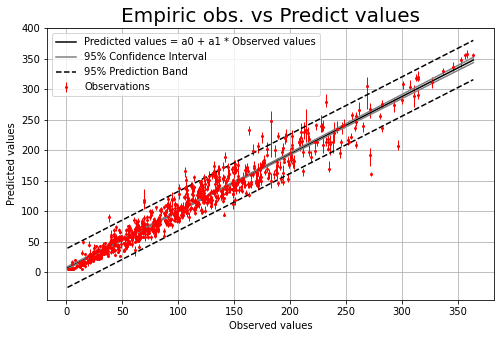

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 25.6, median - 25.649, CI - [25.013-26.223]

SHAP-values for: DBH_cm: mean - 3.589, median - 3.456, CI - [2.897-4.333]

SHAP-values for: H_m: mean - 33.922, median - 34.438, CI - [31.721-35.743]

SHAP-values for: Origin_ID: mean - 0.446, median - 0.402, CI - [0.172-0.756]

SHAP-values for: Species_ID: mean - 8.449, median - 8.493, CI - [7.992-8.937]



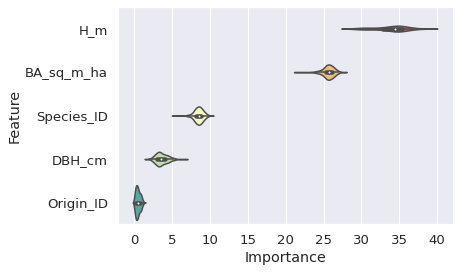

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['H_m', 'BA_sq_m_ha', 'Species_ID', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [27]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 93.735, median: 90.0,
 pred. interval (P(0.025)-P(0.975)): 27.85-191.05, 
 conf. interval (p-value=0.95): 57.658-128.603 
***
Aggregate bias statistic: 
 mean: 0.076, median: 0.033,
 pred. interval (P(0.025)-P(0.975)): -2.694-2.943, 
 conf. interval (p-value=0.95): -1.106-1.394 
***
Aggregate RMSE statistic: 
 mean: 16.88, median: 16.793, pred. interval (P(0.025)-P(0.975)): 14.219-20.324, 
 conf. interval (p-value=0.95): 15.357-18.423 
***
Aggregate MSE statistic: 
 mean: 287.736, median: 282.021, pred. interval (P(0.025)-P(0.975)): 202.17-413.068, 
 conf. interval (p-value=0.95): 236.073-339.707 
***
Aggregate R^2 statistic: 
 mean: 0.938, median: 0.94, pred. interval (P(0.025)-P(0.975)): 0.91-0.961, 
 conf. interval (p-value=0.95): 0.924-0.951 
***
Aggregate bias(%) statistic: 
 mean: 0.089, median: 0.033, pred. interval (P(0.025)-P(0.975)): -2.49-2.933, 
 conf. interval (p-value=0.95): -1.097-1.38 
***
Aggregate RMSE(%) stati

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'Distribution of predicted values')

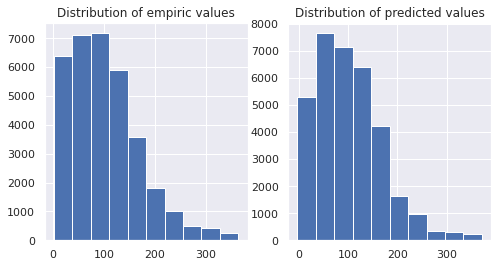

In [28]:
# Preprocessing

results_y['residuals'] = results_y[predictor] - results_y[0]

results_y['residuals_%'] =  results_y['residuals'] / results_y[predictor] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Distribution of empiric values')
axs[1].hist(results_y[0])
axs[1].set_title('Distribution of predicted values')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
intervals = pd.cut(results_y[predictor], [0, 50, 100, 200, 300, 400])

grouped = results_y.groupby(intervals)

max_obs_in_group = len(results_y)    
    
pre = pd.DataFrame()
pre_rel = pd.DataFrame()

pre = pre.assign(row_number=range(max_obs_in_group))
pre_rel = pre_rel.assign(row_number=range(max_obs_in_group))

for i in range(len(list(grouped))):
    pre[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals'])
    pre_rel[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals_%'])

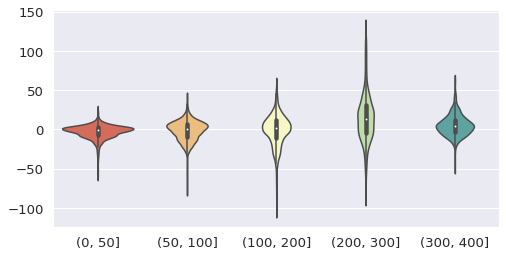

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre[list(pre.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

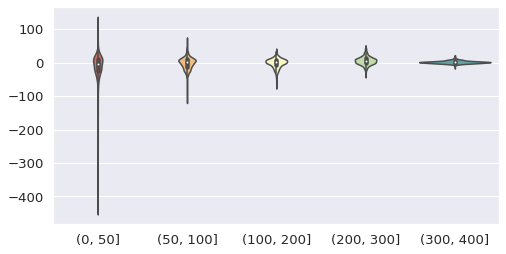

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel[(pre_rel.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [32]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [33]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [34]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:91.47957
[1]	validation_0-rmse:68.99065
[2]	validation_0-rmse:53.25968
[3]	validation_0-rmse:41.94202
[4]	validation_0-rmse:34.15165
[5]	validation_0-rmse:28.50616
[6]	validation_0-rmse:24.93936
[7]	validation_0-rmse:22.75687
[8]	validation_0-rmse:20.87945


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:19.86507
[10]	validation_0-rmse:18.98112
[11]	validation_0-rmse:18.46729
[12]	validation_0-rmse:17.95234
[13]	validation_0-rmse:17.54962
[14]	validation_0-rmse:17.31783
[15]	validation_0-rmse:16.89449
[16]	validation_0-rmse:16.63002
[17]	validation_0-rmse:16.51595
[18]	validation_0-rmse:16.32756
[19]	validation_0-rmse:16.23229
[20]	validation_0-rmse:16.12745
[21]	validation_0-rmse:15.95686
[22]	validation_0-rmse:15.89077
[23]	validation_0-rmse:15.79260
[24]	validation_0-rmse:15.66782
[25]	validation_0-rmse:15.54923
[26]	validation_0-rmse:15.42540
[27]	validation_0-rmse:15.29382
[28]	validation_0-rmse:15.11063
[29]	validation_0-rmse:15.03550
[30]	validation_0-rmse:14.99136
[31]	validation_0-rmse:14.95431
[32]	validation_0-rmse:14.84599
[33]	validation_0-rmse:14.73727
[34]	validation_0-rmse:14.66033
[35]	validation_0-rmse:14.60389
[36]	validation_0-rmse:14.45579
[37]	validation_0-rmse:14.26415
[38]	validation_0-rmse:14.21655
[39]	validation_0-rmse:14.14399
[40]	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [35]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 198


In [36]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

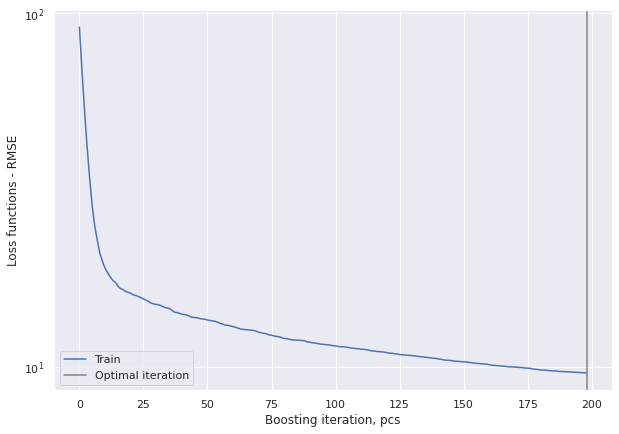

In [37]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [38]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.03
RMSE: 9.6
Relative RMSE(%):  9.344
MSE: 91.9
R square: 98.1%


In [39]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.981
Uncertainty
a0: 2.4+/-0.6
a1: 0.977+/-0.005


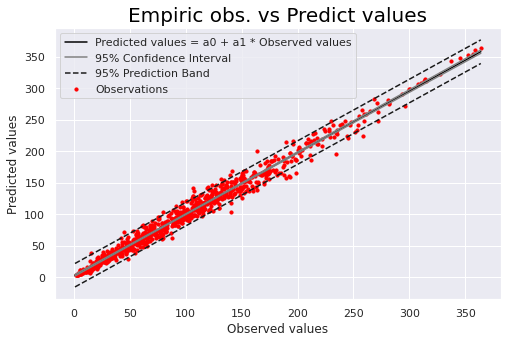

In [40]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.9, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

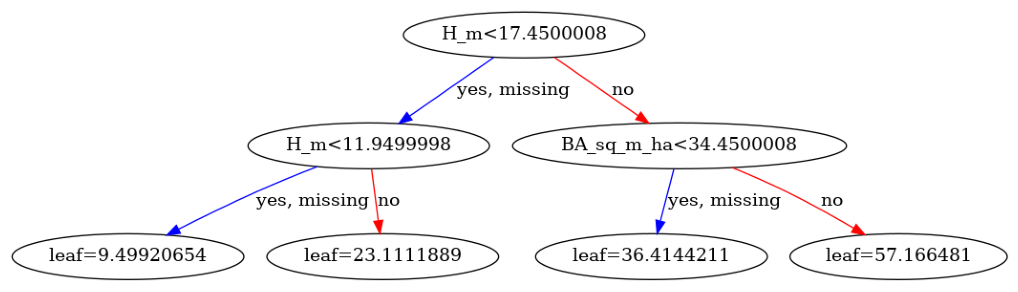

In [42]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [18, 45]
plt.show()

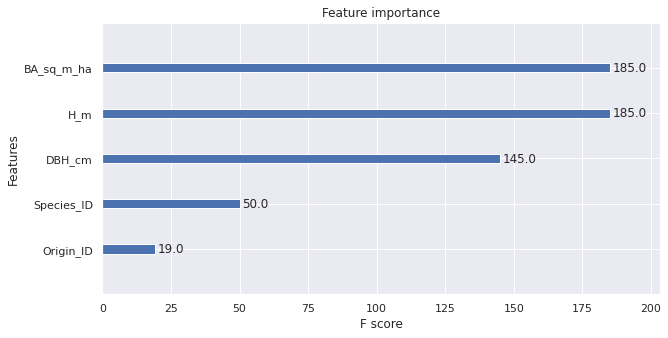

In [44]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

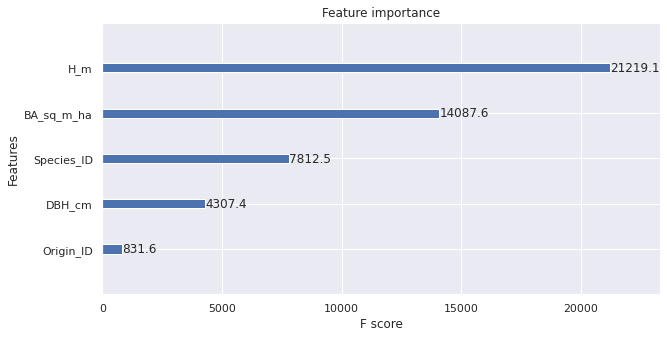

In [45]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

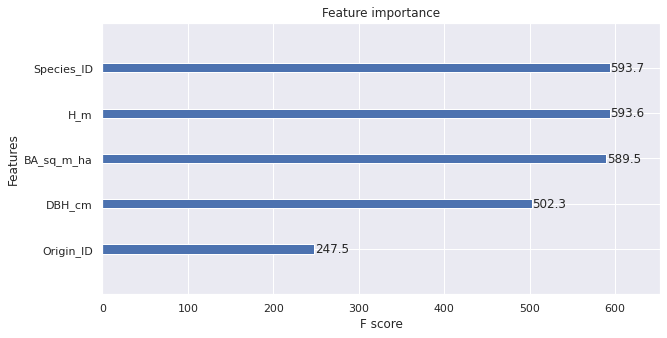

In [46]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [47]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


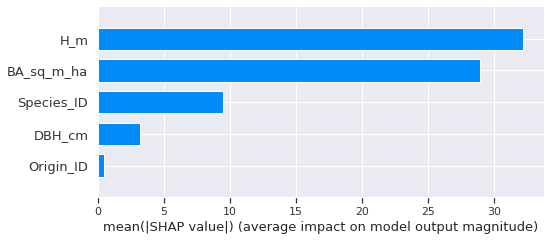

In [48]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

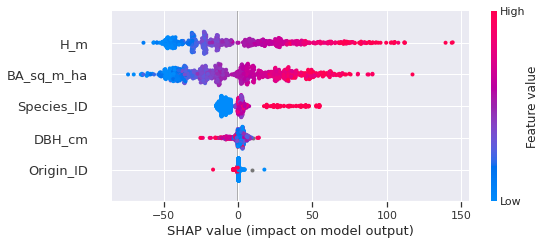

In [49]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

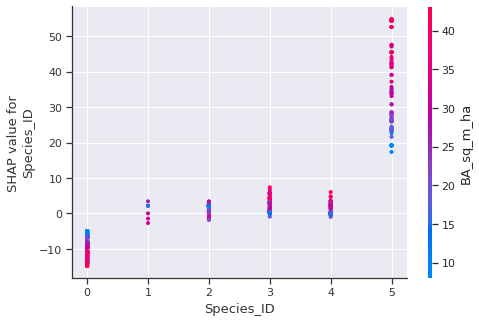

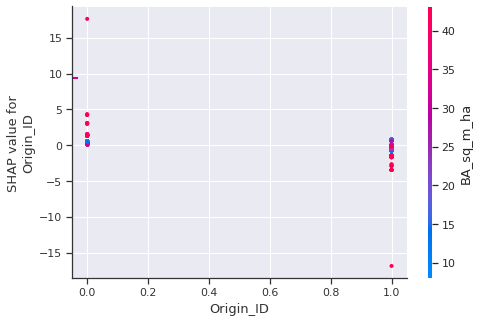

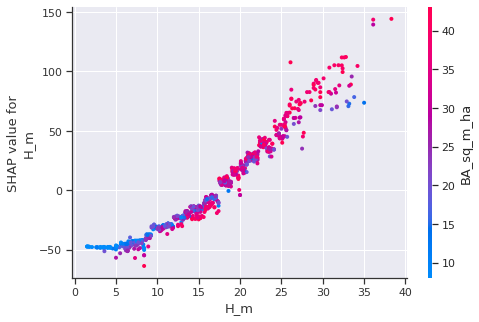

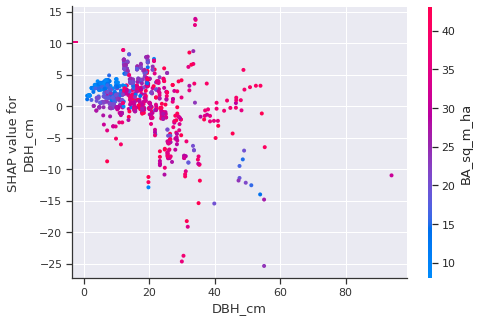

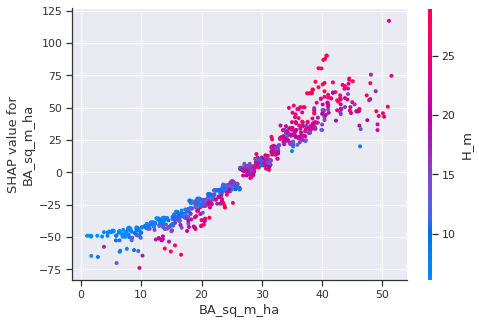

In [50]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [51]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/02_M_all_stem_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/02_M_all_stem_other_authors_XGB_model.txt")